In [1]:
def smape(A, F):
    return 100/len(A) * sum(2 * abs(F - A) / (abs(A) + abs(F)))

In [ ]:
from sklearn.utils import check_arrays
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



# begin

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
# dicplotsnpy='../../venv/MyBayesian/plots/'
# dicplotsnpy2='../../venv/MyBayesian/plots-2/'
# dicplotsnpy3='../../venv/MyBayesian/plots-3/'
# dicplotsnpy4='../../venv/MyBayesian/plots-4/'
dicplotsnpy='../../venv/MyBayesian/pplots/'
#dicplotsnpyBXY='../../venv/MyBayesian/BangXYBaetorch/plots/'

# from matplotlib.pyplot import cm
# color = cm.rainbow(np.linspace(0, 1, 20))
color=['tab:red','tab:blue','orange','tab:green','tab:purple','tab:brown','tab:pink','lawngreen','tab:olive','tab:cyan',
       'chocolate','magenta','tab:gray','blueviolet','steelblue','gold']

In [2]:
# UNSW
dicavgnpy='../../venv/MyBayesian/averageingfiles/' 
dicavgnpy_accu=dicavgnpy+'accuracy/'
dicavgnpy_fpr=dicavgnpy+'fpr/'
attack_types=['Normal','Shellcode','Exploits','Fuzzers','Reconnaissance','Generic','Worms','Analysis','DoS','Backdoors','AllAttacks']

In [2]:
# CIC2017
dicavgnpy='../../venv/MyBayesian/averageingfiles-cic/'

dicavgnpy_accu=dicavgnpy+'accuracy/'
dicavgnpy_fpr=dicavgnpy+'fpr/'
# for plot
attack_types2=["BENIGN","FTP-Patator", "SSH-Patator","DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris", "Heartbleed", 
                  "Brute Force","XSS", "Sql Injection", "Infiltration","Bot", "DDoS", "PortScan","AllAttacks"] # "Web Attack ?Brute Force"

 # dictionary 
#attack_types={0:"BENIGN",1:"FTP-Patator", 2:"SSH-Patator", 3:"DoS GoldenEye", 4:"DoS Hulk", 5:"DoS Slowhttptest", 6:"DoS slowloris", 7:"Heartbleed", 
#                  8:"Brute Force", 9:"XSS", 10:"Sql Injection", 11:"Infiltration",12:"Bot", 13:"DDoS", 14:"PortScan",15:"AllAttack"} # "Web Attack ?Brute Force"
 
attack_types={0:"BENIGN",1:"FTP-Patator", 2:"SSH-Patator", 3:"DoS GoldenEye", 4:"DoS Hulk", 5:"DoS Slowhttptest", 6:"DoS slowloris", 7:"Heartbleed", 
                 8:"Web Attack � Brute Force", 9:"Web Attack � XSS", 10:"Web Attack � Sql Injection", 11:"Infiltration",12:"Bot", 13:"DDoS", 14:"PortScan",15:"AllAttack"} # "Web Attack ?Brute Force"

# calculate average outcome

In [3]:
distribution_types=['G1','G2', 'Triang','GC', 'Uniform','Gamma','T','ECDF','ECOD', 'Poisson']

## average uncertainty function

In [4]:
''' 
averageing: savename+alluncer.csv
for plot dentist map. 
#cic
attackname_AS_alea
# unsw
attackname.npy_AS_alea
'''
def avgAllUncer(filenamelist,savename,savepath, dataset='unsw'):
    alluncertainty_dict_group={} 
    alluncertainty_dict_mean={} 
    alluncertainty_dict_std={}
    if dataset=='unsw':
        fix='.npy_'
    elif dataset=='cic2017':
        fix='_'
    for attackindex in range(1,len( attack_types)):            
            for eachdist in distribution_types:
                alluncertainty_dict_group[attack_types[attackindex]+fix+eachdist+'_alea']=[]
                alluncertainty_dict_group[attack_types[attackindex]+fix+eachdist+'_epis']=[]
    distgroup=[]
    for eachfile in filenamelist:
        pd_reader=pd.read_csv(dicplotsnpy+eachfile) #,header=0)# ,index_col=1)
        for attackindex in range(1,len( attack_types)):            
            for eachdist in distribution_types:
                if attack_types[attackindex]+fix+eachdist+'_alea' in pd_reader.keys():
                    distgroup.append(eachdist)
                    alluncertainty_dict_group[attack_types[attackindex]+fix+eachdist+'_alea'].append(pd_reader[attack_types[attackindex]+fix+eachdist+'_alea'].dropna()  )
                    alluncertainty_dict_group[attack_types[attackindex]+fix+eachdist+'_epis'].append(pd_reader[attack_types[attackindex]+fix+eachdist+'_epis'].dropna())

    for attackindex in range(1,len( attack_types)):            
        for eachdist in distgroup:
            #print(eachdist)
            alluncertainty_dict_mean[attack_types[attackindex]+fix+eachdist+'_alea']=np.mean(alluncertainty_dict_group[attack_types[attackindex]+fix+eachdist+'_alea'], axis=0)
            alluncertainty_dict_mean[attack_types[attackindex]+fix+eachdist+'_epis']=np.mean(alluncertainty_dict_group[attack_types[attackindex]+fix+eachdist+'_epis'],axis=0)
            alluncertainty_dict_std[attack_types[attackindex]+fix+eachdist+'_alea']=np.std(alluncertainty_dict_group[attack_types[attackindex]+fix+eachdist+'_alea'], axis=0)
            alluncertainty_dict_std[attack_types[attackindex]+fix+eachdist+'_epis']=np.std(alluncertainty_dict_group[attack_types[attackindex]+fix+eachdist+'_epis'],axis=0)
    
    save_path_mean = savepath+savename+'+uncer+mean.csv'   # to be saved path
    save_uncer = pd.DataFrame.from_dict(alluncertainty_dict_mean, orient='index')
    save_uncer = save_uncer.transpose()
    save_uncer.to_csv(save_path_mean, mode='a', header=True, index_label=savename,index=True)
    
    save_path_std = savepath+savename+'+uncer+std.csv'   # to be saved path
    save_uncer = pd.DataFrame.from_dict(alluncertainty_dict_std, orient='index')
    save_uncer = save_uncer.transpose()
    save_uncer.to_csv(save_path_std, mode='a', header=True, index_label=savename,index=True)


## average all metrics function

In [14]:
'''
averageing: savename+allmetricsSum.csv
all files need save in 'pplots'
'''
#distribution_types=['G1','G2', 'Triang','GC', 'Uniform','Gamma', 'Poisson','T','ECDF','ECOD']

def avgAllMetricsSum(filenamelist, savename,tosavepath):
    mean_savepath=tosavepath+savename+'+metricsSum+mean.csv'
    std_savepath=tosavepath+savename+'+metricsSum+std.csv'
    modelname='BDL'
    model_dict_total={}
    model_dict_alea={}
    model_dict_epis={}
    model_dict_total_std={}
    model_dict_alea_std={}
    model_dict_epis_std={}
    pd_reader=pd.read_csv(dicplotsnpy+filenamelist[0])
    model_dict_total["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_alea["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_epis["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_total_std["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_alea_std["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_epis_std["metricname"]=pd_reader.loc[0:17,'metricname']
    totalset={}
    aleaset={}
    episset={}
    for eachdist in distribution_types:
        totalset[eachdist]=[]
        aleaset[eachdist]=[]
        episset[eachdist]=[]

    for eachfile in filenamelist:
        pd_reader=pd.read_csv(dicplotsnpy+eachfile,header=0 )
        for eachdist in distribution_types:
            if eachdist in pd_reader.columns:
                totalset[eachdist].append(pd_reader.loc[0:17,eachdist].to_numpy(dtype=float).flatten())
                aleaset[eachdist].append(pd_reader.loc[19:19+17,eachdist].to_numpy(dtype=float).flatten())
                episset[eachdist].append(pd_reader.loc[19+17+2:19+17+2+17,eachdist].to_numpy(dtype=float).flatten())
    
    for eachdist in totalset.keys():
        
        totalset[eachdist]=np.where(totalset[eachdist],totalset[eachdist],1)
        aleaset[eachdist]=np.where(aleaset[eachdist],aleaset[eachdist],1)
        episset[eachdist]=np.where(episset[eachdist],episset[eachdist],1)
        
        model_dict_total[eachdist]=np.nan_to_num(np.mean(totalset[eachdist],axis=0))
        model_dict_alea[eachdist]=np.nan_to_num(np.mean(aleaset[eachdist],axis=0))
        model_dict_epis[eachdist]=np.nan_to_num(np.mean(episset[eachdist],axis=0))
        model_dict_total_std[eachdist]=np.nan_to_num(np.std(totalset[eachdist],axis=0))
        model_dict_alea_std[eachdist]=np.nan_to_num(np.std(aleaset[eachdist],axis=0))
        model_dict_epis_std[eachdist]=np.nan_to_num(np.std(episset[eachdist],axis=0))
        
        
    save_data=pd.DataFrame(model_dict_total)
    save_data.to_csv(mean_savepath, mode='a', header=True, index_label=modelname,index=True)
    save_data=pd.DataFrame(model_dict_alea)
    save_data.to_csv(mean_savepath, mode='a', header=True, index_label=modelname,index=True)
    save_data=pd.DataFrame(model_dict_epis)
    save_data.to_csv(mean_savepath, mode='a', header=True, index_label=modelname,index=True)
    
    save_data=pd.DataFrame(model_dict_total_std)
    save_data.to_csv(std_savepath, mode='a', header=True, index_label=modelname,index=True)
    save_data=pd.DataFrame(model_dict_alea_std)
    save_data.to_csv(std_savepath, mode='a', header=True, index_label=modelname,index=True)
    save_data=pd.DataFrame(model_dict_epis_std)
    save_data.to_csv(std_savepath, mode='a', header=True, index_label=modelname,index=True)

In [15]:
'''
averaging : savename+allmetrics.csv
need to change the condition depend on dataset
'''
def avgAllMetrics(filenamelist,savename,tosavepath,dataset='unsw'): 
    accu_list=[]
    accu2_list=[]  # from auc
    f1_list=[]
    macro_list=[]
    fpr_list=[]
    auc_list=[]
    un_list=[]
    weightauc=[]
    weightaccu=[]
    weightfpr=[]
    weightfactor=[]
    weightuncer=[]
    distgroup=[]
    
    AUCset={}
    Accu2set={}
    FPRset={}
    ACCUset={}
    Macroset={}
    F1set={}
    Uncerset={}
    bestset={}
    
    AUCset_a={}
    Accu2set_a={}
    FPRset_a={}
    ACCUset_a={}
    Macroset_a={}
    F1set_a={}
    Uncerset_a={}
    bestset_a={}
    
    AUCset_e={}
    Accu2set_e={}
    FPRset_e={}
    ACCUset_e={}
    Macroset_e={}
    F1set_e={}
    Uncerset_e={}
    bestset_e={}
    
    for attackindex in range(1,len( attack_types)):            
            for eachdist in distribution_types:
                AUCset[eachdist+attack_types[attackindex]]=[]
                Accu2set[eachdist+attack_types[attackindex]]=[]
                FPRset[eachdist+attack_types[attackindex]]=[]
                ACCUset[eachdist+attack_types[attackindex]]=[]
                Macroset[eachdist+attack_types[attackindex]]=[]
                F1set[eachdist+attack_types[attackindex]]=[]
                Uncerset[eachdist+attack_types[attackindex]]=[]
                bestset[eachdist+attack_types[attackindex]]=[]

                AUCset_a[eachdist+attack_types[attackindex]]=[]
                Accu2set_a[eachdist+attack_types[attackindex]]=[]
                FPRset_a[eachdist+attack_types[attackindex]]=[]
                ACCUset_a[eachdist+attack_types[attackindex]]=[]
                Macroset_a[eachdist+attack_types[attackindex]]=[]
                F1set_a[eachdist+attack_types[attackindex]]=[]
                Uncerset_a[eachdist+attack_types[attackindex]]=[]
                bestset_a[eachdist+attack_types[attackindex]]=[]

                AUCset_e[eachdist+attack_types[attackindex]]=[]
                Accu2set_e[eachdist+attack_types[attackindex]]=[]
                FPRset_e[eachdist+attack_types[attackindex]]=[]
                ACCUset_e[eachdist+attack_types[attackindex]]=[]
                Macroset_e[eachdist+attack_types[attackindex]]=[]
                F1set_e[eachdist+attack_types[attackindex]]=[]
                Uncerset_e[eachdist+attack_types[attackindex]]=[]
                bestset_e[eachdist+attack_types[attackindex]]=[]
    
    for eachfile in filenamelist:        
        pd_reader=pd.read_csv(dicplotsnpy+eachfile) #,header=0)# ,index_col=1)
        
        for attackindex in range(1,len( attack_types)):            
            for eachdist in distribution_types:
                i=0
                while i<len(pd_reader):
                    if '+' in pd_reader.iloc[i,0] :  
                        # # for unsw********************************************
                        if pd_reader.iloc[i,0].split('+')[1].split('.')[0]==attack_types[attackindex] and pd_reader.iloc[i,0].split('+')[0] ==eachdist :
                        ##for cic2017**********************************************
                        #if pd_reader.iloc[i,0].split('+')[1]==attack_types[attackindex] and pd_reader.iloc[i,0].split('+')[0] ==eachdist :
                            if eachdist not in distgroup:
                                distgroup.append(eachdist)
                            
                            AUCset[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+3,1:].to_numpy(dtype=float).flatten())
                            #print(pd_reader.iloc[i+3,:].to_numpy(dtype=float))
                            Accu2set[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+5,1:].to_numpy(dtype=float).flatten())
                            FPRset[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+7,1:].to_numpy(dtype=float).flatten())
                            ACCUset[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+9,1:].to_numpy(dtype=float).flatten())
                            Macroset[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+11,1:].to_numpy(dtype=float).flatten())
                            F1set[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+13,1:].to_numpy(dtype=float).flatten())
                            Uncerset[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+15,1:].to_numpy(dtype=float).flatten())
                            bestset[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+17,1:19].to_numpy(dtype=float).flatten())
                            
                            AUCset_a[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+3,1:].to_numpy(dtype=float).flatten())
                            Accu2set_a[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+5,1:].to_numpy(dtype=float).flatten())
                            FPRset_a[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+7,1:].to_numpy(dtype=float).flatten())
                            ACCUset_a[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+9,1:].to_numpy(dtype=float).flatten())
                            Macroset_a[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+11,1:].to_numpy(dtype=float).flatten())
                            F1set_a[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+13,1:].to_numpy(dtype=float).flatten())
                            Uncerset_a[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+15,1:].to_numpy(dtype=float).flatten())
                            bestset_a[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+17,1:19].to_numpy(dtype=float).flatten())
                            
                            AUCset_e[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+3,1:].to_numpy(dtype=float).flatten())
                            Accu2set_e[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+5,1:].to_numpy(dtype=float).flatten())
                            FPRset_e[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+7,1:].to_numpy(dtype=float).flatten())
                            ACCUset_e[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+9,1:].to_numpy(dtype=float).flatten())
                            Macroset_e[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+11,1:].to_numpy(dtype=float).flatten())
                            F1set_e[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+13,1:].to_numpy(dtype=float).flatten())
                            Uncerset_e[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+15,1:].to_numpy(dtype=float).flatten())
                            bestset_e[eachdist+attack_types[attackindex]].append(pd_reader.iloc[i+17,1:19].to_numpy(dtype=float).flatten())

                            i=i+18*3
                            continue
                    i+=1
                    
    for attackindex in range(1,len( attack_types)):            
            for eachdist in distgroup:
                #print(AUCset[eachdist+attack_types[attackindex]])
                
                AUCset[eachdist+attack_types[attackindex]]=np.where(AUCset[eachdist+attack_types[attackindex]],AUCset[eachdist+attack_types[attackindex]],1)
                Accu2set[eachdist+attack_types[attackindex]]=np.where(Accu2set[eachdist+attack_types[attackindex]],Accu2set[eachdist+attack_types[attackindex]],1)
                FPRset[eachdist+attack_types[attackindex]]=np.where(FPRset[eachdist+attack_types[attackindex]],FPRset[eachdist+attack_types[attackindex]],1)
                ACCUset[eachdist+attack_types[attackindex]]=np.where(ACCUset[eachdist+attack_types[attackindex]],ACCUset[eachdist+attack_types[attackindex]],1)
                Macroset[eachdist+attack_types[attackindex]]=np.where(Macroset[eachdist+attack_types[attackindex]],Macroset[eachdist+attack_types[attackindex]],1)
                F1set[eachdist+attack_types[attackindex]]=np.where(F1set[eachdist+attack_types[attackindex]],F1set[eachdist+attack_types[attackindex]],1)
                Uncerset[eachdist+attack_types[attackindex]]=np.where(Uncerset[eachdist+attack_types[attackindex]],Uncerset[eachdist+attack_types[attackindex]],1)
                bestset[eachdist+attack_types[attackindex]]=np.where(bestset[eachdist+attack_types[attackindex]],bestset[eachdist+attack_types[attackindex]],1)

                AUCset_a[eachdist+attack_types[attackindex]]=np.where(AUCset_a[eachdist+attack_types[attackindex]],AUCset_a[eachdist+attack_types[attackindex]],1)
                Accu2set_a[eachdist+attack_types[attackindex]]=np.where(Accu2set_a[eachdist+attack_types[attackindex]],Accu2set_a[eachdist+attack_types[attackindex]],1)
                FPRset_a[eachdist+attack_types[attackindex]]=np.where(FPRset_a[eachdist+attack_types[attackindex]],FPRset_a[eachdist+attack_types[attackindex]],1)
                ACCUset_a[eachdist+attack_types[attackindex]]=np.where(ACCUset_a[eachdist+attack_types[attackindex]],ACCUset_a[eachdist+attack_types[attackindex]],1)
                Macroset_a[eachdist+attack_types[attackindex]]=np.where(Macroset_a[eachdist+attack_types[attackindex]],Macroset_a[eachdist+attack_types[attackindex]],1)
                F1set_a[eachdist+attack_types[attackindex]]=np.where(F1set_a[eachdist+attack_types[attackindex]],F1set_a[eachdist+attack_types[attackindex]],1)
                Uncerset_a[eachdist+attack_types[attackindex]]=np.where(Uncerset_a[eachdist+attack_types[attackindex]],Uncerset_a[eachdist+attack_types[attackindex]],1)
                bestset_a[eachdist+attack_types[attackindex]]=np.where(bestset_a[eachdist+attack_types[attackindex]],bestset_a[eachdist+attack_types[attackindex]],1)

                AUCset_e[eachdist+attack_types[attackindex]]=np.where(AUCset_e[eachdist+attack_types[attackindex]],AUCset_e[eachdist+attack_types[attackindex]],1)
                Accu2set_e[eachdist+attack_types[attackindex]]=np.where(Accu2set_e[eachdist+attack_types[attackindex]],Accu2set_e[eachdist+attack_types[attackindex]],1)
                FPRset_e[eachdist+attack_types[attackindex]]=np.where(FPRset_e[eachdist+attack_types[attackindex]],FPRset_e[eachdist+attack_types[attackindex]],1)
                ACCUset_e[eachdist+attack_types[attackindex]]=np.where(ACCUset_e[eachdist+attack_types[attackindex]],ACCUset_e[eachdist+attack_types[attackindex]],1)
                Macroset_e[eachdist+attack_types[attackindex]]=np.where(Macroset_e[eachdist+attack_types[attackindex]],Macroset_e[eachdist+attack_types[attackindex]],1)
                F1set_e[eachdist+attack_types[attackindex]]=np.where(F1set_e[eachdist+attack_types[attackindex]],F1set_e[eachdist+attack_types[attackindex]],1)
                Uncerset_e[eachdist+attack_types[attackindex]]=np.where(Uncerset_e[eachdist+attack_types[attackindex]],Uncerset_e[eachdist+attack_types[attackindex]],1)
                bestset_e[eachdist+attack_types[attackindex]]=np.where(bestset_e[eachdist+attack_types[attackindex]],bestset_e[eachdist+attack_types[attackindex]],1)

                            
                auc_list_t=np.nan_to_num(np.mean(AUCset[eachdist+attack_types[attackindex]],axis=0))
                #accu2_list_t=np.mean(np.nan_to_num(Accu2set[eachdist+attack_types[attackindex]]),axis=0))
                accu2_list_t=np.nan_to_num(np.mean(Accu2set[eachdist+attack_types[attackindex]],axis=0))
                fpr_list_t=np.nan_to_num(np.mean(FPRset[eachdist+attack_types[attackindex]],axis=0))
                accu_list_t=np.nan_to_num(np.mean(ACCUset[eachdist+attack_types[attackindex]],axis=0))
                macro_list_t=np.nan_to_num(np.mean(Macroset[eachdist+attack_types[attackindex]],axis=0))
                f1_list_t=np.nan_to_num(np.mean(F1set[eachdist+attack_types[attackindex]],axis=0))
                un_list_t=np.nan_to_num(np.mean(Uncerset[eachdist+attack_types[attackindex]],axis=0))
                best_t=np.nan_to_num(np.mean(bestset[eachdist+attack_types[attackindex]],axis=0))
                return_dict_t= { "wfpr": best_t[0] ,"wauc":best_t[1] ,  "waccu":best_t[2] , "avgaccu2": best_t[3],"avgauc": best_t[4],  "wuncer": best_t[5],
                      "gainavgaccu": best_t[6], "gainavgauc": best_t[7],"gainaccu": best_t[8], "gainauc": best_t[9],"minfpr": best_t[10], "maxfpr":best_t[11],
                      "maxauc": best_t[12], "minauc": best_t[13],"maxaccu": best_t[14], "minaccu": best_t[15],"minuncer": best_t[16],  "maxuncer": best_t[17]
                    }
                saveinmetricsfile(eachdist+'+'+attack_types[attackindex],savename+'+metrics+mean',tosavepath,auc_list_t,accu2_list_t,fpr_list_t,accu_list_t,macro_list_t,f1_list_t,un_list_t,return_dict_t)
                
                auc_list_a=np.nan_to_num(np.mean(AUCset_a[eachdist+attack_types[attackindex]],axis=0))
                accu2_list_a=np.nan_to_num(np.mean(Accu2set_a[eachdist+attack_types[attackindex]],axis=0))
                fpr_list_a=np.nan_to_num(np.mean(FPRset_a[eachdist+attack_types[attackindex]],axis=0))
                accu_list_a=np.nan_to_num(np.mean(ACCUset_a[eachdist+attack_types[attackindex]],axis=0))
                macro_list_a=np.nan_to_num(np.mean(Macroset_a[eachdist+attack_types[attackindex]],axis=0))
                f1_list_a=np.nan_to_num(np.mean(F1set_a[eachdist+attack_types[attackindex]],axis=0))
                un_list_a=np.nan_to_num(np.mean(Uncerset_a[eachdist+attack_types[attackindex]],axis=0))
                best_a=np.nan_to_num(np.mean(bestset_a[eachdist+attack_types[attackindex]],axis=0))
                return_dict_a= { "wfpr": best_a[0] ,"wauc":best_a[1] ,  "waccu":best_a[2] , "avgaccu2": best_a[3],"avgauc": best_a[4],  "wuncer": best_a[5],
                      "gainavgaccu": best_a[6], "gainavgauc": best_a[7],"gainaccu": best_a[8], "gainauc": best_a[9],"minfpr": best_a[10], "maxfpr":best_a[11],
                      "maxauc": best_a[12], "minauc": best_a[13],"maxaccu": best_a[14], "minaccu": best_a[15],"minuncer": best_a[16],  "maxuncer": best_a[17]
                    }
                saveinmetricsfile(eachdist+'+'+attack_types[attackindex],savename+'+metrics+mean',tosavepath,auc_list_a,accu2_list_a,fpr_list_a,accu_list_a,macro_list_a,f1_list_a,un_list_a,return_dict_a)
                
                auc_list_e=np.nan_to_num(np.mean(AUCset_e[eachdist+attack_types[attackindex]],axis=0))
                accu2_list_e=np.nan_to_num(np.mean(Accu2set_e[eachdist+attack_types[attackindex]],axis=0))
                fpr_list_e=np.nan_to_num(np.mean(FPRset_e[eachdist+attack_types[attackindex]],axis=0))
                accu_list_e=np.nan_to_num(np.mean(ACCUset_e[eachdist+attack_types[attackindex]],axis=0))
                macro_list_e=np.nan_to_num(np.mean(Macroset_e[eachdist+attack_types[attackindex]],axis=0))
                f1_list_e=np.nan_to_num(np.mean(F1set_e[eachdist+attack_types[attackindex]],axis=0))
                un_list_e=np.nan_to_num(np.mean(Uncerset_e[eachdist+attack_types[attackindex]],axis=0))
                best_e=np.nan_to_num(np.mean(bestset_e[eachdist+attack_types[attackindex]],axis=0))
                return_dict_e= { "wfpr": best_e[0] ,"wauc":best_e[1] ,  "waccu":best_e[2] , "avgaccu2": best_e[3],"avgauc": best_e[4],  "wuncer": best_e[5],
                      "gainavgaccu": best_e[6], "gainavgauc": best_e[7],"gainaccu": best_e[8], "gainauc": best_e[9],"minfpr": best_e[10], "maxfpr":best_e[11],
                      "maxauc": best_e[12], "minauc": best_e[13],"maxaccu": best_e[14], "minaccu": best_e[15],"minuncer": best_e[16],  "maxuncer": best_e[17]
                    }
                saveinmetricsfile(eachdist+'+'+attack_types[attackindex],savename+'+metrics+mean',tosavepath,auc_list_e,accu2_list_e,fpr_list_e,accu_list_e,macro_list_e,f1_list_e,un_list_e,return_dict_e)
                
                
                #################################################  std  ########
                auc_list_t=np.nan_to_num(np.std(AUCset[eachdist+attack_types[attackindex]],axis=0))
                accu2_list_t=np.nan_to_num(np.std(Accu2set[eachdist+attack_types[attackindex]],axis=0))
                fpr_list_t=np.nan_to_num(np.std(FPRset[eachdist+attack_types[attackindex]],axis=0))
                accu_list_t=np.nan_to_num(np.std(ACCUset[eachdist+attack_types[attackindex]],axis=0))
                macro_list_t=np.nan_to_num(np.std(Macroset[eachdist+attack_types[attackindex]],axis=0))
                f1_list_t=np.nan_to_num(np.std(F1set[eachdist+attack_types[attackindex]],axis=0))
                un_list_t=np.nan_to_num(np.std(Uncerset[eachdist+attack_types[attackindex]],axis=0))
                best_t=np.nan_to_num(np.std(bestset[eachdist+attack_types[attackindex]],axis=0))
                return_dict_t= { "wfpr": best_t[0] ,"wauc":best_t[1] ,  "waccu":best_t[2] , "avgaccu2": best_t[3],"avgauc": best_t[4],  "wuncer": best_t[5],
                      "gainavgaccu": best_t[6], "gainavgauc": best_t[7],"gainaccu": best_t[8], "gainauc": best_t[9],"minfpr": best_t[10], "maxfpr":best_t[11],
                      "maxauc": best_t[12], "minauc": best_t[13],"maxaccu": best_t[14], "minaccu": best_t[15],"minuncer": best_t[16],  "maxuncer": best_t[17]
                    }
                saveinmetricsfile(eachdist+'+'+attack_types[attackindex],savename+'+metrics+std',tosavepath,auc_list_t,accu2_list_t,fpr_list_t,accu_list_t,macro_list_t,f1_list_t,un_list_t,return_dict_t)
                
                auc_list_a=np.nan_to_num(np.std(AUCset_a[eachdist+attack_types[attackindex]],axis=0))
                accu2_list_a=np.nan_to_num(np.std(Accu2set_a[eachdist+attack_types[attackindex]],axis=0))
                fpr_list_a=np.nan_to_num(np.std(FPRset_a[eachdist+attack_types[attackindex]],axis=0))
                accu_list_a=np.nan_to_num(np.std(ACCUset_a[eachdist+attack_types[attackindex]],axis=0))
                macro_list_a=np.nan_to_num(np.std(Macroset_a[eachdist+attack_types[attackindex]],axis=0))
                f1_list_a=np.nan_to_num(np.std(F1set_a[eachdist+attack_types[attackindex]],axis=0))
                un_list_a=np.nan_to_num(np.std(Uncerset_a[eachdist+attack_types[attackindex]],axis=0))
                best_a=np.nan_to_num(np.std(bestset_a[eachdist+attack_types[attackindex]],axis=0))
                return_dict_a= { "wfpr": best_a[0] ,"wauc":best_a[1] ,  "waccu":best_a[2] , "avgaccu2": best_a[3],"avgauc": best_a[4],  "wuncer": best_a[5],
                      "gainavgaccu": best_a[6], "gainavgauc": best_a[7],"gainaccu": best_a[8], "gainauc": best_a[9],"minfpr": best_a[10], "maxfpr":best_a[11],
                      "maxauc": best_a[12], "minauc": best_a[13],"maxaccu": best_a[14], "minaccu": best_a[15],"minuncer": best_a[16],  "maxuncer": best_a[17]
                    }
                saveinmetricsfile(eachdist+'+'+attack_types[attackindex],savename+'+metrics+std',tosavepath,auc_list_a,accu2_list_a,fpr_list_a,accu_list_a,macro_list_a,f1_list_a,un_list_a,return_dict_a)
                
                auc_list_e=np.nan_to_num(np.std(AUCset_e[eachdist+attack_types[attackindex]],axis=0))
                accu2_list_e=np.nan_to_num(np.std(Accu2set_e[eachdist+attack_types[attackindex]],axis=0))
                fpr_list_e=np.nan_to_num(np.std(FPRset_e[eachdist+attack_types[attackindex]],axis=0))
                accu_list_e=np.nan_to_num(np.std(ACCUset_e[eachdist+attack_types[attackindex]],axis=0))
                macro_list_e=np.nan_to_num(np.std(Macroset_e[eachdist+attack_types[attackindex]],axis=0))
                f1_list_e=np.nan_to_num(np.std(F1set_e[eachdist+attack_types[attackindex]],axis=0))
                un_list_e=np.nan_to_num(np.std(Uncerset_e[eachdist+attack_types[attackindex]],axis=0))
                best_e=np.nan_to_num(np.std(bestset_e[eachdist+attack_types[attackindex]],axis=0))
                return_dict_e= { "wfpr": best_e[0] ,"wauc":best_e[1] ,  "waccu":best_e[2] , "avgaccu2": best_e[3],"avgauc": best_e[4],  "wuncer": best_e[5],
                      "gainavgaccu": best_e[6], "gainavgauc": best_e[7],"gainaccu": best_e[8], "gainauc": best_e[9],"minfpr": best_e[10], "maxfpr":best_e[11],
                      "maxauc": best_e[12], "minauc": best_e[13],"maxaccu": best_e[14], "minaccu": best_e[15],"minuncer": best_e[16],  "maxuncer": best_e[17]
                    }
                saveinmetricsfile(eachdist+'+'+attack_types[attackindex],savename+'+metrics+std',tosavepath,auc_list_e,accu2_list_e,fpr_list_e,accu_list_e,macro_list_e,f1_list_e,un_list_e,return_dict_e)
                
    
               


In [16]:
def saveinmetricsfile(typename,savename,tosavepath,auc_list,accu2_list,fpr_list,accu_list,macro_list,f1_list,un_list,return_dict):   
    savepath=tosavepath+savename+'.csv'
    xx=np.arange(0,60,3)
    
    csv_exists = os.path.exists(savepath)
    csv_mode = 'a' if csv_exists else 'w'
    #header_mode = False if csv_exists else True
    if csv_mode=='w':
        save_data = pd.DataFrame.from_dict([xx])
        save_data.to_csv(savepath, mode=csv_mode, header=True , index_label='Avg',index=True)
        csv_mode='a'
    save_data = pd.DataFrame.from_dict([xx])
    save_data.to_csv(savepath, mode=csv_mode, header=True, index_label=typename,index=True)
    save_data = pd.DataFrame.from_dict([auc_list])
    save_data.to_csv(savepath, mode=csv_mode, header=xx, index_label='AUC',index=True)
    save_data = pd.DataFrame.from_dict([accu2_list])
    save_data.to_csv(savepath, mode=csv_mode, header=xx, index_label='Accu2',index=True)
    save_data = pd.DataFrame.from_dict([fpr_list])
    save_data.to_csv(savepath, mode=csv_mode, header=xx, index_label='FPR',index=True)
    save_data = pd.DataFrame.from_dict([accu_list])
    save_data.to_csv(savepath, mode=csv_mode, header=xx, index_label='ACCU',index=True)
    save_data = pd.DataFrame.from_dict([macro_list])
    save_data.to_csv(savepath, mode=csv_mode, header=xx, index_label='MacroF1',index=True)    
    save_data = pd.DataFrame.from_dict([f1_list])
    save_data.to_csv(savepath, mode=csv_mode, header=xx, index_label='F1',index=True)
    save_data = pd.DataFrame.from_dict([un_list])
    save_data.to_csv(savepath, mode=csv_mode, header=xx, index_label='Uncer',index=True)

    save_data = pd.DataFrame.from_dict([return_dict])
    save_data.to_csv(savepath, mode=csv_mode, header=True, index_label='best',index=True)


## average the best dist

In [7]:
'''
averaging all the best of each run experiment
1.find the best distname from the file of metricsSum.csv accroding 'wauc'.
2. collect the total, the alea, the epis data from metrics.csv of the best dist.
3. averageing

all the files need to in the dicplotsnpy(pplots). all files need end with: +allmetricsSum.csv
'''
def getBestDistsOfGroup(filenamelist, metric='AUC'): 
    distlist=[]
    metricsMean=[]
    if metric=='AUC':
        for eachfile in filenamelist:
            pd_reader1=pd.read_csv(dicplotsnpy+eachfile,header=0 )
            bestdist=pd.to_numeric( pd_reader1.iloc[1,3:]).idxmax(axis=0)
            distlist.append(bestdist)
    elif metric=='FPR':
        for eachfile in filenamelist:
            pd_reader1=pd.read_csv(dicplotsnpy+eachfile,header=0 )
            bestdist=pd.to_numeric( pd_reader1.iloc[0,3:]).idxmin(axis=0)
            distlist.append(bestdist)
    elif metric=='Accuracy':
        for eachfile in filenamelist:
            pd_reader1=pd.read_csv(dicplotsnpy+eachfile,header=0 )
            bestdist=pd.to_numeric( pd_reader1.iloc[2,3:]).idxmax(axis=0)
            distlist.append(bestdist)
        
        
    return distlist
        

In [8]:
'''
averageing: savename+allmetricsSum.csv
all files need save in 'pplots'
'''

def avgPartAllMetricsSum(filenamelist, savename,tosavepath, distlist):
    mean_savepath=tosavepath+savename+'+best+metricsSum+mean.csv'
    std_savepath=tosavepath+savename+'+best+metricsSum+std.csv'
    modelname='BDL'
    model_dict_total={}
    model_dict_alea={}
    model_dict_epis={}
    model_dict_total_std={}
    model_dict_alea_std={}
    model_dict_epis_std={}
    pd_reader=pd.read_csv(dicplotsnpy+filenamelist[0])
    model_dict_total["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_alea["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_epis["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_total_std["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_alea_std["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_epis_std["metricname"]=pd_reader.loc[0:17,'metricname']
    totalset=[]
    aleaset=[]
    episset=[]

    for ii in range(0,len( filenamelist)):
        pd_reader=pd.read_csv(dicplotsnpy+filenamelist[ii],header=0 )
        totalset.append(pd_reader.loc[0:17,distlist[ii]].to_numpy(dtype=float).flatten())
        aleaset.append(pd_reader.loc[19:19+17,distlist[ii]].to_numpy(dtype=float).flatten())
        episset.append(pd_reader.loc[19+17+2:19+17+2+17,distlist[ii]].to_numpy(dtype=float).flatten())
    
    
    totalset=np.where(totalset,totalset,1)
    aleaset=np.where(aleaset,aleaset,1)
    episset=np.where(episset,episset,1)

    model_dict_total=np.nan_to_num(np.mean(totalset,axis=0))
    model_dict_alea=np.nan_to_num(np.mean(aleaset,axis=0))
    model_dict_epis=np.nan_to_num(np.mean(episset,axis=0))
    model_dict_total_std=np.nan_to_num(np.std(totalset,axis=0))
    model_dict_alea_std=np.nan_to_num(np.std(aleaset,axis=0))
    model_dict_epis_std=np.nan_to_num(np.std(episset,axis=0))
        
        
    save_data=pd.DataFrame(model_dict_total)
    save_data.to_csv(mean_savepath, mode='a', header=True, index_label=modelname,index=True)
    save_data=pd.DataFrame(model_dict_alea)
    save_data.to_csv(mean_savepath, mode='a', header=True, index_label=modelname,index=True)
    save_data=pd.DataFrame(model_dict_epis)
    save_data.to_csv(mean_savepath, mode='a', header=True, index_label=modelname,index=True)
    
    save_data=pd.DataFrame(model_dict_total_std)
    save_data.to_csv(std_savepath, mode='a', header=True, index_label=modelname,index=True)
    save_data=pd.DataFrame(model_dict_alea_std)
    save_data.to_csv(std_savepath, mode='a', header=True, index_label=modelname,index=True)
    save_data=pd.DataFrame(model_dict_epis_std)
    save_data.to_csv(std_savepath, mode='a', header=True, index_label=modelname,index=True)

In [9]:
'''
averaging : savename+allmetrics.csv
'''
def avgPartAllMetrics(filenamelist,savename,tosavepath,distlist,dataset='unsw'): 
    accu_list=[]
    accu2_list=[]  # from auc
    f1_list=[]
    macro_list=[]  
    fpr_list=[]
    auc_list=[]
    un_list=[]
    weightauc=[]
    weightaccu=[]
    weightfpr=[]
    weightfactor=[]
    weightuncer=[]
    distgroup=[]
    
    AUCset={}
    Accu2set={}
    FPRset={}
    ACCUset={}
    Macroset={}
    F1set={}
    Uncerset={}
    bestset={}
    
    AUCset_a={}
    Accu2set_a={}
    FPRset_a={}
    ACCUset_a={}
    Macroset_a={}
    F1set_a={}
    Uncerset_a={}
    bestset_a={}
    
    AUCset_e={}
    Accu2set_e={}
    FPRset_e={}
    ACCUset_e={}
    Macroset_e={}
    F1set_e={}
    Uncerset_e={}
    bestset_e={}
    
    for attackindex in range(1,len( attack_types)):  
            AUCset[attack_types[attackindex]]=[]
            Accu2set[attack_types[attackindex]]=[]
            FPRset[attack_types[attackindex]]=[]
            ACCUset[attack_types[attackindex]]=[]
            Macroset[attack_types[attackindex]]=[]
            F1set[attack_types[attackindex]]=[]
            Uncerset[attack_types[attackindex]]=[]
            bestset[attack_types[attackindex]]=[]

            AUCset_a[attack_types[attackindex]]=[]
            Accu2set_a[attack_types[attackindex]]=[]
            FPRset_a[attack_types[attackindex]]=[]
            ACCUset_a[attack_types[attackindex]]=[]
            Macroset_a[attack_types[attackindex]]=[]
            F1set_a[attack_types[attackindex]]=[]
            Uncerset_a[attack_types[attackindex]]=[]
            bestset_a[attack_types[attackindex]]=[]

            AUCset_e[attack_types[attackindex]]=[]
            Accu2set_e[attack_types[attackindex]]=[]
            FPRset_e[attack_types[attackindex]]=[]
            ACCUset_e[attack_types[attackindex]]=[]
            Macroset_e[attack_types[attackindex]]=[]
            F1set_e[attack_types[attackindex]]=[]
            Uncerset_e[attack_types[attackindex]]=[]
            bestset_e[attack_types[attackindex]]=[]

    for ii in range(0,len( filenamelist)):        
        pd_reader=pd.read_csv(dicplotsnpy+filenamelist[ii]) #,header=0)# ,index_col=1)
        
        for attackindex in range(1,len( attack_types)): 
                i=0
                while i<len(pd_reader):
                    if '+' in pd_reader.iloc[i,0] :  
                        if dataset=='unsw':
                        # for unsw********************************************
                            attackname=pd_reader.iloc[i,0].split('+')[1].split('.')[0]
                            
                        elif dataset=='cic2017':
                        # for cic2017**********************************************
                            attackname=pd_reader.iloc[i,0].split('+')[1]
                        if attackname==attack_types[attackindex] and pd_reader.iloc[i,0].split('+')[0] ==distlist[ii]:
#                             if eachdist not in distgroup:
#                                 distgroup.append(eachdist)
                            
                            AUCset[attack_types[attackindex]].append(pd_reader.iloc[i+3,1:].to_numpy(dtype=float).flatten())
                            #print(pd_reader.iloc[i+3,:].to_numpy(dtype=float))
                            Accu2set[attack_types[attackindex]].append(pd_reader.iloc[i+5,1:].to_numpy(dtype=float).flatten())
                            FPRset[attack_types[attackindex]].append(pd_reader.iloc[i+7,1:].to_numpy(dtype=float).flatten())
                            ACCUset[attack_types[attackindex]].append(pd_reader.iloc[i+9,1:].to_numpy(dtype=float).flatten())
                            Macroset[attack_types[attackindex]].append(pd_reader.iloc[i+11,1:].to_numpy(dtype=float).flatten())
                            F1set[attack_types[attackindex]].append(pd_reader.iloc[i+13,1:].to_numpy(dtype=float).flatten())
                            Uncerset[attack_types[attackindex]].append(pd_reader.iloc[i+15,1:].to_numpy(dtype=float).flatten())
                            bestset[attack_types[attackindex]].append(pd_reader.iloc[i+17,1:19].to_numpy(dtype=float).flatten())

                            AUCset_a[attack_types[attackindex]].append(pd_reader.iloc[i+3,1:].to_numpy(dtype=float).flatten())
                            Accu2set_a[attack_types[attackindex]].append(pd_reader.iloc[i+5,1:].to_numpy(dtype=float).flatten())
                            FPRset_a[attack_types[attackindex]].append(pd_reader.iloc[i+7,1:].to_numpy(dtype=float).flatten())
                            ACCUset_a[attack_types[attackindex]].append(pd_reader.iloc[i+9,1:].to_numpy(dtype=float).flatten())
                            Macroset_a[attack_types[attackindex]].append(pd_reader.iloc[i+11,1:].to_numpy(dtype=float).flatten())
                            F1set_a[attack_types[attackindex]].append(pd_reader.iloc[i+13,1:].to_numpy(dtype=float).flatten())
                            Uncerset_a[attack_types[attackindex]].append(pd_reader.iloc[i+15,1:].to_numpy(dtype=float).flatten())
                            bestset_a[attack_types[attackindex]].append(pd_reader.iloc[i+17,1:19].to_numpy(dtype=float).flatten())

                            AUCset_e[attack_types[attackindex]].append(pd_reader.iloc[i+3,1:].to_numpy(dtype=float).flatten())
                            Accu2set_e[attack_types[attackindex]].append(pd_reader.iloc[i+5,1:].to_numpy(dtype=float).flatten())
                            FPRset_e[attack_types[attackindex]].append(pd_reader.iloc[i+7,1:].to_numpy(dtype=float).flatten())
                            ACCUset_e[attack_types[attackindex]].append(pd_reader.iloc[i+9,1:].to_numpy(dtype=float).flatten())
                            Macroset_e[attack_types[attackindex]].append(pd_reader.iloc[i+11,1:].to_numpy(dtype=float).flatten())
                            F1set_e[attack_types[attackindex]].append(pd_reader.iloc[i+13,1:].to_numpy(dtype=float).flatten())
                            Uncerset_e[attack_types[attackindex]].append(pd_reader.iloc[i+15,1:].to_numpy(dtype=float).flatten())
                            bestset_e[attack_types[attackindex]].append(pd_reader.iloc[i+17,1:19].to_numpy(dtype=float).flatten())

                            i=i+18*3
                            continue
                    i+=1
                    
    for attackindex in range(1,len( attack_types)):  
                #print(AUCset[eachdist+attack_types[attackindex]])
                
            AUCset[attack_types[attackindex]]=np.where(AUCset[attack_types[attackindex]],AUCset[attack_types[attackindex]],1)
            Accu2set[attack_types[attackindex]]=np.where(Accu2set[attack_types[attackindex]],Accu2set[attack_types[attackindex]],1)
            FPRset[attack_types[attackindex]]=np.where(FPRset[attack_types[attackindex]],FPRset[attack_types[attackindex]],1)
            ACCUset[attack_types[attackindex]]=np.where(ACCUset[attack_types[attackindex]],ACCUset[attack_types[attackindex]],1)
            Macroset[attack_types[attackindex]]=np.where(Macroset[attack_types[attackindex]],Macroset[attack_types[attackindex]],1)
            F1set[attack_types[attackindex]]=np.where(F1set[attack_types[attackindex]],F1set[attack_types[attackindex]],1)
            Uncerset[attack_types[attackindex]]=np.where(Uncerset[attack_types[attackindex]],Uncerset[attack_types[attackindex]],1)
            bestset[attack_types[attackindex]]=np.where(bestset[attack_types[attackindex]],bestset[attack_types[attackindex]],1)

            AUCset_a[attack_types[attackindex]]=np.where(AUCset_a[attack_types[attackindex]],AUCset_a[attack_types[attackindex]],1)
            Accu2set_a[attack_types[attackindex]]=np.where(Accu2set_a[attack_types[attackindex]],Accu2set_a[attack_types[attackindex]],1)
            FPRset_a[attack_types[attackindex]]=np.where(FPRset_a[attack_types[attackindex]],FPRset_a[attack_types[attackindex]],1)
            ACCUset_a[attack_types[attackindex]]=np.where(ACCUset_a[attack_types[attackindex]],ACCUset_a[attack_types[attackindex]],1)
            Macroset_a[attack_types[attackindex]]=np.where(Macroset_a[attack_types[attackindex]],Macroset_a[attack_types[attackindex]],1)
            F1set_a[attack_types[attackindex]]=np.where(F1set_a[attack_types[attackindex]],F1set_a[attack_types[attackindex]],1)
            Uncerset_a[attack_types[attackindex]]=np.where(Uncerset_a[attack_types[attackindex]],Uncerset_a[attack_types[attackindex]],1)
            bestset_a[attack_types[attackindex]]=np.where(bestset_a[attack_types[attackindex]],bestset_a[attack_types[attackindex]],1)

            AUCset_e[attack_types[attackindex]]=np.where(AUCset_e[attack_types[attackindex]],AUCset_e[attack_types[attackindex]],1)
            Accu2set_e[attack_types[attackindex]]=np.where(Accu2set_e[attack_types[attackindex]],Accu2set_e[attack_types[attackindex]],1)
            FPRset_e[attack_types[attackindex]]=np.where(FPRset_e[attack_types[attackindex]],FPRset_e[attack_types[attackindex]],1)
            ACCUset_e[attack_types[attackindex]]=np.where(ACCUset_e[attack_types[attackindex]],ACCUset_e[attack_types[attackindex]],1)
            Macroset_e[attack_types[attackindex]]=np.where(Macroset_e[attack_types[attackindex]],Macroset_e[attack_types[attackindex]],1)
            F1set_e[attack_types[attackindex]]=np.where(F1set_e[attack_types[attackindex]],F1set_e[attack_types[attackindex]],1)
            Uncerset_e[attack_types[attackindex]]=np.where(Uncerset_e[attack_types[attackindex]],Uncerset_e[attack_types[attackindex]],1)
            bestset_e[attack_types[attackindex]]=np.where(bestset_e[attack_types[attackindex]],bestset_e[attack_types[attackindex]],1)
            

            auc_list_t=np.nan_to_num(np.mean(AUCset[attack_types[attackindex]],axis=0))
            #accu2_list_t=np.mean(np.nan_to_num(Accu2set[eachdist+attack_types[attackindex]]),axis=0))
            accu2_list_t=np.nan_to_num(np.mean(Accu2set[attack_types[attackindex]],axis=0))
            fpr_list_t=np.nan_to_num(np.mean(FPRset[attack_types[attackindex]],axis=0))
            accu_list_t=np.nan_to_num(np.mean(ACCUset[attack_types[attackindex]],axis=0))
            macro_list_t=np.nan_to_num(np.mean(Macroset[attack_types[attackindex]],axis=0))
            f1_list_t=np.nan_to_num(np.mean(F1set[attack_types[attackindex]],axis=0))
            un_list_t=np.nan_to_num(np.mean(Uncerset[attack_types[attackindex]],axis=0))
            best_t=np.nan_to_num(np.mean(bestset[attack_types[attackindex]],axis=0))
            
            return_dict_t= { "wfpr": best_t[0] ,"wauc":best_t[1] ,  "waccu":best_t[2] , "avgaccu2": best_t[3],"avgauc": best_t[4],  "wuncer": best_t[5],
                  "gainavgaccu": best_t[6], "gainavgauc": best_t[7],"gainaccu": best_t[8], "gainauc": best_t[9],"minfpr": best_t[10], "maxfpr":best_t[11],
                  "maxauc": best_t[12], "minauc": best_t[13],"maxaccu": best_t[14], "minaccu": best_t[15],"minuncer": best_t[16],  "maxuncer": best_t[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+mean',tosavepath,auc_list_t,accu2_list_t,fpr_list_t,accu_list_t,macro_list_t,f1_list_t,un_list_t,return_dict_t)

            auc_list_a=np.nan_to_num(np.mean(AUCset_a[attack_types[attackindex]],axis=0))
            accu2_list_a=np.nan_to_num(np.mean(Accu2set_a[attack_types[attackindex]],axis=0))
            fpr_list_a=np.nan_to_num(np.mean(FPRset_a[attack_types[attackindex]],axis=0))
            accu_list_a=np.nan_to_num(np.mean(ACCUset_a[attack_types[attackindex]],axis=0))
            macro_list_a=np.nan_to_num(np.mean(Macroset_a[attack_types[attackindex]],axis=0))
            f1_list_a=np.nan_to_num(np.mean(F1set_a[attack_types[attackindex]],axis=0))
            un_list_a=np.nan_to_num(np.mean(Uncerset_a[attack_types[attackindex]],axis=0))
            best_a=np.nan_to_num(np.mean(bestset_a[attack_types[attackindex]],axis=0))
            return_dict_a= { "wfpr": best_a[0] ,"wauc":best_a[1] ,  "waccu":best_a[2] , "avgaccu2": best_a[3],"avgauc": best_a[4],  "wuncer": best_a[5],
                  "gainavgaccu": best_a[6], "gainavgauc": best_a[7],"gainaccu": best_a[8], "gainauc": best_a[9],"minfpr": best_a[10], "maxfpr":best_a[11],
                  "maxauc": best_a[12], "minauc": best_a[13],"maxaccu": best_a[14], "minaccu": best_a[15],"minuncer": best_a[16],  "maxuncer": best_a[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+mean',tosavepath,auc_list_a,accu2_list_a,fpr_list_a,accu_list_a,macro_list_a,f1_list_a,un_list_a,return_dict_a)

            auc_list_e=np.nan_to_num(np.mean(AUCset_e[attack_types[attackindex]],axis=0))
            accu2_list_e=np.nan_to_num(np.mean(Accu2set_e[attack_types[attackindex]],axis=0))
            fpr_list_e=np.nan_to_num(np.mean(FPRset_e[attack_types[attackindex]],axis=0))
            accu_list_e=np.nan_to_num(np.mean(ACCUset_e[attack_types[attackindex]],axis=0))
            macro_list_e=np.nan_to_num(np.mean(Macroset_e[attack_types[attackindex]],axis=0))
            f1_list_e=np.nan_to_num(np.mean(F1set_e[attack_types[attackindex]],axis=0))
            un_list_e=np.nan_to_num(np.mean(Uncerset_e[attack_types[attackindex]],axis=0))
            best_e=np.nan_to_num(np.mean(bestset_e[attack_types[attackindex]],axis=0))
            return_dict_e= { "wfpr": best_e[0] ,"wauc":best_e[1] ,  "waccu":best_e[2] , "avgaccu2": best_e[3],"avgauc": best_e[4],  "wuncer": best_e[5],
                  "gainavgaccu": best_e[6], "gainavgauc": best_e[7],"gainaccu": best_e[8], "gainauc": best_e[9],"minfpr": best_e[10], "maxfpr":best_e[11],
                  "maxauc": best_e[12], "minauc": best_e[13],"maxaccu": best_e[14], "minaccu": best_e[15],"minuncer": best_e[16],  "maxuncer": best_e[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+mean',tosavepath,auc_list_e,accu2_list_e,fpr_list_e,accu_list_e,macro_list_e,f1_list_e,un_list_e,return_dict_e)


            #################################################  std  ########
            auc_list_t=np.nan_to_num(np.std(AUCset[attack_types[attackindex]],axis=0))
            accu2_list_t=np.nan_to_num(np.std(Accu2set[attack_types[attackindex]],axis=0))
            fpr_list_t=np.nan_to_num(np.std(FPRset[attack_types[attackindex]],axis=0))
            accu_list_t=np.nan_to_num(np.std(ACCUset[attack_types[attackindex]],axis=0))
            macro_list_t=np.nan_to_num(np.std(Macroset[attack_types[attackindex]],axis=0))
            f1_list_t=np.nan_to_num(np.std(F1set[attack_types[attackindex]],axis=0))
            un_list_t=np.nan_to_num(np.std(Uncerset[attack_types[attackindex]],axis=0))
            best_t=np.nan_to_num(np.std(bestset[attack_types[attackindex]],axis=0))
            return_dict_t= { "wfpr": best_t[0] ,"wauc":best_t[1] ,  "waccu":best_t[2] , "avgaccu2": best_t[3],"avgauc": best_t[4],  "wuncer": best_t[5],
                  "gainavgaccu": best_t[6], "gainavgauc": best_t[7],"gainaccu": best_t[8], "gainauc": best_t[9],"minfpr": best_t[10], "maxfpr":best_t[11],
                  "maxauc": best_t[12], "minauc": best_t[13],"maxaccu": best_t[14], "minaccu": best_t[15],"minuncer": best_t[16],  "maxuncer": best_t[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+std',tosavepath,auc_list_t,accu2_list_t,fpr_list_t,accu_list_t,macro_list_t,f1_list_t,un_list_t,return_dict_t)

            auc_list_a=np.nan_to_num(np.std(AUCset_a[attack_types[attackindex]],axis=0))
            accu2_list_a=np.nan_to_num(np.std(Accu2set_a[attack_types[attackindex]],axis=0))
            fpr_list_a=np.nan_to_num(np.std(FPRset_a[attack_types[attackindex]],axis=0))
            accu_list_a=np.nan_to_num(np.std(ACCUset_a[attack_types[attackindex]],axis=0))
            macro_list_a=np.nan_to_num(np.std(Macroset_a[attack_types[attackindex]],axis=0))
            f1_list_a=np.nan_to_num(np.std(F1set_a[attack_types[attackindex]],axis=0))
            un_list_a=np.nan_to_num(np.std(Uncerset_a[attack_types[attackindex]],axis=0))
            best_a=np.nan_to_num(np.std(bestset_a[attack_types[attackindex]],axis=0))
            return_dict_a= { "wfpr": best_a[0] ,"wauc":best_a[1] ,  "waccu":best_a[2] , "avgaccu2": best_a[3],"avgauc": best_a[4],  "wuncer": best_a[5],
                  "gainavgaccu": best_a[6], "gainavgauc": best_a[7],"gainaccu": best_a[8], "gainauc": best_a[9],"minfpr": best_a[10], "maxfpr":best_a[11],
                  "maxauc": best_a[12], "minauc": best_a[13],"maxaccu": best_a[14], "minaccu": best_a[15],"minuncer": best_a[16],  "maxuncer": best_a[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+std',tosavepath,auc_list_a,accu2_list_a,fpr_list_a,accu_list_a,macro_list_a,f1_list_a,un_list_a,return_dict_a)

            auc_list_e=np.nan_to_num(np.std(AUCset_e[attack_types[attackindex]],axis=0))
            accu2_list_e=np.nan_to_num(np.std(Accu2set_e[attack_types[attackindex]],axis=0))
            fpr_list_e=np.nan_to_num(np.std(FPRset_e[attack_types[attackindex]],axis=0))
            accu_list_e=np.nan_to_num(np.std(ACCUset_e[attack_types[attackindex]],axis=0))
            macro_list_e=np.nan_to_num(np.std(Macroset_e[attack_types[attackindex]],axis=0))
            f1_list_e=np.nan_to_num(np.std(F1set_e[attack_types[attackindex]],axis=0))
            un_list_e=np.nan_to_num(np.std(Uncerset_e[attack_types[attackindex]],axis=0))
            best_e=np.nan_to_num(np.std(bestset_e[attack_types[attackindex]],axis=0))
            return_dict_e= { "wfpr": best_e[0] ,"wauc":best_e[1] ,  "waccu":best_e[2] , "avgaccu2": best_e[3],"avgauc": best_e[4],  "wuncer": best_e[5],
                  "gainavgaccu": best_e[6], "gainavgauc": best_e[7],"gainaccu": best_e[8], "gainauc": best_e[9],"minfpr": best_e[10], "maxfpr":best_e[11],
                  "maxauc": best_e[12], "minauc": best_e[13],"maxaccu": best_e[14], "minaccu": best_e[15],"minuncer": best_e[16],  "maxuncer": best_e[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+std',tosavepath,auc_list_e,accu2_list_e,fpr_list_e,accu_list_e,macro_list_e,f1_list_e,un_list_e,return_dict_e)

    
               


In [10]:
''' 
averageing: savename+alluncer.csv
for plot dentist map. 
#cic
attackname_AS_alea
# unsw
attackname.npy_AS_alea
'''
def avgPartAllUncer(filenamelist,savename,savepath,distlist, dataset='unsw'):
    alluncertainty_dict_group={} 
    alluncertainty_dict_mean={} 
    alluncertainty_dict_std={}
    if dataset=='unsw':
        fix='.npy_'
    elif dataset=='cic2017':
        fix='_'
    for attackindex in range(1,len( attack_types)):   
            alluncertainty_dict_group[attack_types[attackindex]+fix+'_alea']=[]
            alluncertainty_dict_group[attack_types[attackindex]+fix+'_epis']=[]
            
    for ii in range(0,len(filenamelist)):
        pd_reader=pd.read_csv(dicplotsnpy+filenamelist[ii]) #,header=0)# ,index_col=1)
        
        for attackindex in range(1,len( attack_types)): 
            if attack_types[attackindex]+fix+distlist[ii]+'_alea' in pd_reader.keys():
                alluncertainty_dict_group[attack_types[attackindex]+fix+'_alea'].append(pd_reader[attack_types[attackindex]+fix+distlist[ii]+'_alea'].dropna()  )
                alluncertainty_dict_group[attack_types[attackindex]+fix+'_epis'].append(pd_reader[attack_types[attackindex]+fix+distlist[ii]+'_epis'].dropna())

    for attackindex in range(1,len( attack_types)):    
        alluncertainty_dict_mean[attack_types[attackindex]+fix+'_alea']=np.mean(alluncertainty_dict_group[attack_types[attackindex]+fix+'_alea'], axis=0)
        alluncertainty_dict_mean[attack_types[attackindex]+fix+'_epis']=np.mean(alluncertainty_dict_group[attack_types[attackindex]+fix+'_epis'],axis=0)
        alluncertainty_dict_std[attack_types[attackindex]+fix+'_alea']=np.std(alluncertainty_dict_group[attack_types[attackindex]+fix+'_alea'], axis=0)
        alluncertainty_dict_std[attack_types[attackindex]+fix+'_epis']=np.std(alluncertainty_dict_group[attack_types[attackindex]+fix+'_epis'],axis=0)
    
    save_path_mean = savepath+savename+'+best+uncer+mean.csv'   # to be saved path
    save_uncer = pd.DataFrame.from_dict(alluncertainty_dict_mean, orient='index')
    save_uncer = save_uncer.transpose()
    save_uncer.to_csv(save_path_mean, mode='a', header=True, index_label=savename,index=True)
    
    save_path_std = savepath+savename+'+best+uncer+std.csv'   # to be saved path
    save_uncer = pd.DataFrame.from_dict(alluncertainty_dict_std, orient='index')
    save_uncer = save_uncer.transpose()
    save_uncer.to_csv(save_path_std, mode='a', header=True, index_label=savename,index=True)


## exec averageing

### unsw

In [17]:
###### UNSW
'''
# VI none
modelnamelist=[]
modelnamelist.append('BDLunsw-1-vi-ae-mae-mse')
modelnamelist.append('BDLunsw-1-vi-ae-mae-mae')
modelnamelist.append('BDLunsw-1-bae-diag-bce')
modelnamelist.append('BDLunsw-44-vi-1-none-mae-mae')
modelnamelist.append('BDLunsw-44-vi-11-none-mae-mae')
modelnamelist.append('BDLunsw-44-vi-111-none-mae-mae')
sn='unsw-VI-none-best-1'

# VI input
modelnamelist=[]
modelnamelist.append('BDLunsw-44-vi-1-input-seed-mae-mae')
modelnamelist.append('BDLunsw-44-vi-11-input-mae-mae')
modelnamelist.append('BDLunsw-44-vi-111-input-seed-mae-mae')
modelnamelist.append('BDLunsw-44-vi-1111-input-seed-mae-mae')
sn='unsw-VI-input-best-1'

# VI last
modelnamelist=[]
modelnamelist.append('BDLunsw-11-vi-last-model-norm-mae-mse')
modelnamelist.append('BDLunsw-111-vi-last-model-norm-mae-mse')
modelnamelist.append('BDLunsw-44-vi-1-last-dTril-seed-mae-mae')
modelnamelist.append('BDLunsw-44-vi-11-last-dTril-mae-mae')
modelnamelist.append('BDLunsw-44-vi-111-last-dTril-mae-mae')
modelnamelist.append('BDLunsw-44-vi-1111-last-dTril-mae-mae')
sn='unsw-VI-last-best-1'

#VI latent
modelnamelist=[]
modelnamelist.append('BDLunsw-21111-vi-latent-Tril-model-denseTril--mae-mse')
modelnamelist.append('BDLunsw-21111-vi-latent-normP-Tril-model-denseTril--mae-mse')
modelnamelist.append('BDLunsw-44-vi-1-latent-dTril-seed-mae-mae')
modelnamelist.append('BDLunsw-44-vi-latent-dTril-seed-mae-mae')
sn='unsw-VI-latent-best-1'
'''
# VI vae
modelnamelist=[]
modelnamelist.append('BDLunsw-44-vi-vae-1-mae-mae')
modelnamelist.append('BDLunsw-44-vi-vae-11-seed-mae-mae')
modelnamelist.append('BDLunsw-44-vi-vae-1111-seed-mae-mae')
modelnamelist.append('BDLunsw-44-vi-vae-11111-seed-mae-mae')
modelnamelist.append('BDLunsw-44-vi-vae-111111-seed-mae-mae')
modelnamelist.append('BDLunsw-44-vi-vae-diag-dTril-IndeNorm-seed0-mae-mae')
modelnamelist.append('BDLunsw-44-vi-vae-lamb-diag-seed3-diag-mae-mae')
sn='unsw-VI-vae-best-1-forDist'
'''
#MCD none
modelnamelist=[]
modelnamelist.append('BDLunsw-1-drop-ae-norm-mae-mse')
#modelnamelist.append('BDLunsw-1-drop-ae-norm-bce')
modelnamelist.append('BDLunsw-2-drop-ae-mae-mse')
modelnamelist.append('BDLunsw-3-drop-ae-mae-mse')
modelnamelist.append('BDLunsw-3-drop-1-ae-mae-mse')
modelnamelist.append('BDLunsw-3-drop-1-vae-Indep-mae-mse')
modelnamelist.append('BDLunsw-4-drop-1-ae-mae-mse')
modelnamelist.append('BDLunsw-44-drop-none-seed-mae-mae')
sn='unsw-MCD-none-best-1'

# MCD input
modelnamelist=[]
modelnamelist.append('BDLunsw-11-drop-input-mae-mae')
modelnamelist.append('BDLunsw-11-drop-input-mae-mse')
modelnamelist.append('BDLunsw-44-drop-input-seed-mae-mae')
sn='unsw-MCD-input-best-1'

# MCD last
modelnamelist=[]
modelnamelist.append('BDLunsw-2-drop-last-norm-mae-mse')
modelnamelist.append('BDLunsw-11-drop-last-norm-mae-mse')
modelnamelist.append('BDLunsw-111-drop-last-norm-mae-mse')
modelnamelist.append('BDLunsw-1111-drop-last-norm-mae-mse')
modelnamelist.append('BDLunsw-2-drop-last-dTril-mae-mse')
modelnamelist.append('BDLunsw-3-drop-last-1-sigmoidbefore-diag-mae-mse')
modelnamelist.append('BDLunsw-44-drop-last-dTril-mae-mae')
sn='unsw-MCD-last-best-1'

#MCD latent
modelnamelist=[]
modelnamelist.append('BDLunsw-1-drop-latent-Tril-mae-mse')
modelnamelist.append('BDLunsw-1-drop-latent-Tril-mae-mae')
modelnamelist.append('BDLunsw-11-drop-latent-diag-mae-mse')
modelnamelist.append('BDLunsw-111-drop-latent-diag-mae-mse')
modelnamelist.append('BDLunsw-111-drop-latent-seed-diag-mae-mse')
modelnamelist.append('BDLunsw-111-drop-latent-L2-diag-mae-mse')
modelnamelist.append('BDLunsw-4-drop-1-latent-diag-mae-mse')
modelnamelist.append('BDLunsw-44-drop-latent-dTril-mae-mae')
sn='unsw-MCD-latent-best-1'

#MCD vae
modelnamelist=[]
modelnamelist.append('BDLunsw-44-drop-vae-dTril-norm-mae-mae')
modelnamelist.append('BDLunsw-441-drop-vae-dTril-norm-mae-mae')
modelnamelist.append('BDLunsw-4411-drop-vae-dTril-seed-norm-mae-mae')
modelnamelist.append('BDLunsw-44111-drop-vae-dTril-seed-norm-mae-mae')
modelnamelist.append('BDLunsw-44-mcd-vae-dTril-seed0-norm-44111-mae-mae')

BDLunsw-44-drop-vae-lamb-diag-seed3-diag-mae-mae+allmetricsSum
sn='unsw-MCD-vae-best-1'

# AE
modelnamelist=[]
modelnamelist.append('BDLunsw-4-AE-mae-mae')
modelnamelist.append('BDLunsw-4-AE-1-mae-mae')
modelnamelist.append('BDLunsw-4-AE-111-mae-mae')
modelnamelist.append('BDLunsw-4-AE-1111-seed0-mae-mae')
modelnamelist.append('BDLunsw-4-AE-1111-seed1-mae-mae')
sn='unsw-AE-best-1'

#  VAE
modelnamelist=[]
modelnamelist.append('BDLunsw-4-VAE-seed1-mae-mae')
#modelnamelist.append('BDLunsw-4-VAE-seed2-MVNTril-mae-mae')
modelnamelist.append('BDLunsw-4-VAE-seed6-MVNTril-mae-mae')
modelnamelist.append('BDLunsw-4-VAE-seed5-MVNTril-mae-mae')
modelnamelist.append('BDLunsw-4-VAE-seed7-Norm-mae-mae')
modelnamelist.append('BDLunsw-4-VAE-seed0-mae-mae')
sn='unsw-VAE-best-1'
'''

"\n#MCD none\nmodelnamelist=[]\nmodelnamelist.append('BDLunsw-1-drop-ae-norm-mae-mse')\n#modelnamelist.append('BDLunsw-1-drop-ae-norm-bce')\nmodelnamelist.append('BDLunsw-2-drop-ae-mae-mse')\nmodelnamelist.append('BDLunsw-3-drop-ae-mae-mse')\nmodelnamelist.append('BDLunsw-3-drop-1-ae-mae-mse')\nmodelnamelist.append('BDLunsw-3-drop-1-vae-Indep-mae-mse')\nmodelnamelist.append('BDLunsw-4-drop-1-ae-mae-mse')\nmodelnamelist.append('BDLunsw-44-drop-none-seed-mae-mae')\nsn='unsw-MCD-none-best-1'\n\n# MCD input\nmodelnamelist=[]\nmodelnamelist.append('BDLunsw-11-drop-input-mae-mae')\nmodelnamelist.append('BDLunsw-11-drop-input-mae-mse')\nmodelnamelist.append('BDLunsw-44-drop-input-seed-mae-mae')\nsn='unsw-MCD-input-best-1'\n\n# MCD last\nmodelnamelist=[]\nmodelnamelist.append('BDLunsw-2-drop-last-norm-mae-mse')\nmodelnamelist.append('BDLunsw-11-drop-last-norm-mae-mse')\nmodelnamelist.append('BDLunsw-111-drop-last-norm-mae-mse')\nmodelnamelist.append('BDLunsw-1111-drop-last-norm-mae-mse')\nmode

In [18]:

filenamesAllMetricsSum=[]
filenamesAllMetrics=[]
filenamesUncer=[]
for eachname in modelnamelist:
    filenamesAllMetricsSum.append(eachname+'+allmetricsSum.csv')
    filenamesAllMetrics.append(eachname+'+allmetrics.csv')
    filenamesUncer.append(eachname+'+alluncer.csv')
    

In [21]:
'''
option1
avg all  each values in files
'''
print(sn)
# avgAllMetricsSum(filenamesAllMetricsSum,sn,dicavgnpy)
avgAllMetrics(filenamesAllMetrics,sn,dicavgnpy,dataset='unsw')    # need change code in differ dataset
# avgAllUncer(filenamesUncer,sn,dicavgnpy, dataset='unsw')

unsw-VI-vae-best-1-forDist


#### AUC-ROC avg of best 

In [13]:
'''
option 2
only avg the best valus in files accroding auc-roc    during multiple anoamly prability distributons.
choose one from multiple distinct distributons
'''
print(sn)
bestdists=getBestDistsOfGroup(filenamesAllMetricsSum,metric='AUC')
avgPartAllMetricsSum(filenamesAllMetricsSum,sn,dicavgnpy,bestdists)
avgPartAllMetrics(filenamesAllMetrics,sn,dicavgnpy,bestdists,dataset='unsw')

avgPartAllUncer(filenamesUncer,sn,dicavgnpy, bestdists, dataset='unsw')

unsw-VI-vae-best-1-forDist


#### Accuracy avg of best

In [60]:
'''
only avg best valus in files accroding accuracy
'''
print(sn)
bestdists=getBestDistsOfGroup(filenamesAllMetricsSum,metric='Accuracy')
avgPartAllMetricsSum(filenamesAllMetricsSum,sn,dicavgnpy_accu,bestdists)
avgPartAllMetrics(filenamesAllMetrics,sn,dicavgnpy_accu,bestdists,dataset='unsw')

#avgPartAllUncer(filenamesUncer,sn,dicavgnpy_accu, bestdists, dataset='unsw')

unsw-VAE-best-1


#### FPR avg of best

In [6]:
'''
averageing: savename+allmetricsSum.csv
all files need save in 'pplots'
'''

def avgPartAllMetricsSumFPR(filenamelist, savename,tosavepath, distlist):
    mean_savepath=tosavepath+savename+'+best+metricsSum+mean.csv'
    std_savepath=tosavepath+savename+'+best+metricsSum+std.csv'
    modelname='BDL'
    model_dict_total={}
    model_dict_alea={}
    model_dict_epis={}
    model_dict_total_std={}
    model_dict_alea_std={}
    model_dict_epis_std={}
    pd_reader=pd.read_csv(dicplotsnpy+filenamelist[0])
    model_dict_total["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_alea["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_epis["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_total_std["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_alea_std["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_epis_std["metricname"]=pd_reader.loc[0:17,'metricname']
    totalset=[]
    aleaset=[]
    episset=[]

    for ii in range(0,len( filenamelist)):
        pd_reader=pd.read_csv(dicplotsnpy+filenamelist[ii],header=0 )
        totalset.append(pd_reader.loc[0:17,distlist[ii]].to_numpy(dtype=float).flatten())
        aleaset.append(pd_reader.loc[19:19+17,distlist[ii]].to_numpy(dtype=float).flatten())
        episset.append(pd_reader.loc[19+17+2:19+17+2+17,distlist[ii]].to_numpy(dtype=float).flatten())
    
    
    totalset=np.where(totalset,totalset,0)
    aleaset=np.where(aleaset,aleaset,0)
    episset=np.where(episset,episset,0)

    model_dict_total=np.nan_to_num(np.mean(totalset,axis=0))
    model_dict_alea=np.nan_to_num(np.mean(aleaset,axis=0))
    model_dict_epis=np.nan_to_num(np.mean(episset,axis=0))
    model_dict_total_std=np.nan_to_num(np.std(totalset,axis=0))
    model_dict_alea_std=np.nan_to_num(np.std(aleaset,axis=0))
    model_dict_epis_std=np.nan_to_num(np.std(episset,axis=0))
        
        
    save_data=pd.DataFrame(model_dict_total)
    save_data.to_csv(mean_savepath, mode='a', header=True, index_label=modelname,index=True)
    save_data=pd.DataFrame(model_dict_alea)
    save_data.to_csv(mean_savepath, mode='a', header=True, index_label=modelname,index=True)
    save_data=pd.DataFrame(model_dict_epis)
    save_data.to_csv(mean_savepath, mode='a', header=True, index_label=modelname,index=True)
    
    save_data=pd.DataFrame(model_dict_total_std)
    save_data.to_csv(std_savepath, mode='a', header=True, index_label=modelname,index=True)
    save_data=pd.DataFrame(model_dict_alea_std)
    save_data.to_csv(std_savepath, mode='a', header=True, index_label=modelname,index=True)
    save_data=pd.DataFrame(model_dict_epis_std)
    save_data.to_csv(std_savepath, mode='a', header=True, index_label=modelname,index=True)

In [7]:
'''
averaging : savename+allmetrics.csv
'''
def avgPartAllMetricsFPR(filenamelist,savename,tosavepath,distlist,dataset='unsw'): 
    accu_list=[]
    accu2_list=[]  # from auc
    f1_list=[]
    macro_list=[]  
    fpr_list=[]
    auc_list=[]
    un_list=[]
    weightauc=[]
    weightaccu=[]
    weightfpr=[]
    weightfactor=[]
    weightuncer=[]
    distgroup=[]
    
    AUCset={}
    Accu2set={}
    FPRset={}
    ACCUset={}
    Macroset={}
    F1set={}
    Uncerset={}
    bestset={}
    
    AUCset_a={}
    Accu2set_a={}
    FPRset_a={}
    ACCUset_a={}
    Macroset_a={}
    F1set_a={}
    Uncerset_a={}
    bestset_a={}
    
    AUCset_e={}
    Accu2set_e={}
    FPRset_e={}
    ACCUset_e={}
    Macroset_e={}
    F1set_e={}
    Uncerset_e={}
    bestset_e={}
    
    for attackindex in range(1,len( attack_types)):  
            AUCset[attack_types[attackindex]]=[]
            Accu2set[attack_types[attackindex]]=[]
            FPRset[attack_types[attackindex]]=[]
            ACCUset[attack_types[attackindex]]=[]
            Macroset[attack_types[attackindex]]=[]
            F1set[attack_types[attackindex]]=[]
            Uncerset[attack_types[attackindex]]=[]
            bestset[attack_types[attackindex]]=[]

            AUCset_a[attack_types[attackindex]]=[]
            Accu2set_a[attack_types[attackindex]]=[]
            FPRset_a[attack_types[attackindex]]=[]
            ACCUset_a[attack_types[attackindex]]=[]
            Macroset_a[attack_types[attackindex]]=[]
            F1set_a[attack_types[attackindex]]=[]
            Uncerset_a[attack_types[attackindex]]=[]
            bestset_a[attack_types[attackindex]]=[]

            AUCset_e[attack_types[attackindex]]=[]
            Accu2set_e[attack_types[attackindex]]=[]
            FPRset_e[attack_types[attackindex]]=[]
            ACCUset_e[attack_types[attackindex]]=[]
            Macroset_e[attack_types[attackindex]]=[]
            F1set_e[attack_types[attackindex]]=[]
            Uncerset_e[attack_types[attackindex]]=[]
            bestset_e[attack_types[attackindex]]=[]

    for ii in range(0,len( filenamelist)):        
        pd_reader=pd.read_csv(dicplotsnpy+filenamelist[ii]) #,header=0)# ,index_col=1)
        
        for attackindex in range(1,len( attack_types)): 
                i=0
                while i<len(pd_reader):
                    if '+' in pd_reader.iloc[i,0] :  
                        if dataset=='unsw':
                        # for unsw********************************************
                            attackname=pd_reader.iloc[i,0].split('+')[1].split('.')[0]
                            
                        elif dataset=='cic2017':
                        # for cic2017**********************************************
                            attackname=pd_reader.iloc[i,0].split('+')[1]
                        if attackname==attack_types[attackindex] and pd_reader.iloc[i,0].split('+')[0] ==distlist[ii]:
#                             if eachdist not in distgroup:
#                                 distgroup.append(eachdist)
                            
                            AUCset[attack_types[attackindex]].append(pd_reader.iloc[i+3,1:].to_numpy(dtype=float).flatten())
                            #print(pd_reader.iloc[i+3,:].to_numpy(dtype=float))
                            Accu2set[attack_types[attackindex]].append(pd_reader.iloc[i+5,1:].to_numpy(dtype=float).flatten())
                            FPRset[attack_types[attackindex]].append(pd_reader.iloc[i+7,1:].to_numpy(dtype=float).flatten())
                            ACCUset[attack_types[attackindex]].append(pd_reader.iloc[i+9,1:].to_numpy(dtype=float).flatten())
                            Macroset[attack_types[attackindex]].append(pd_reader.iloc[i+11,1:].to_numpy(dtype=float).flatten())
                            F1set[attack_types[attackindex]].append(pd_reader.iloc[i+13,1:].to_numpy(dtype=float).flatten())
                            Uncerset[attack_types[attackindex]].append(pd_reader.iloc[i+15,1:].to_numpy(dtype=float).flatten())
                            bestset[attack_types[attackindex]].append(pd_reader.iloc[i+17,1:19].to_numpy(dtype=float).flatten())

                            AUCset_a[attack_types[attackindex]].append(pd_reader.iloc[i+3,1:].to_numpy(dtype=float).flatten())
                            Accu2set_a[attack_types[attackindex]].append(pd_reader.iloc[i+5,1:].to_numpy(dtype=float).flatten())
                            FPRset_a[attack_types[attackindex]].append(pd_reader.iloc[i+7,1:].to_numpy(dtype=float).flatten())
                            ACCUset_a[attack_types[attackindex]].append(pd_reader.iloc[i+9,1:].to_numpy(dtype=float).flatten())
                            Macroset_a[attack_types[attackindex]].append(pd_reader.iloc[i+11,1:].to_numpy(dtype=float).flatten())
                            F1set_a[attack_types[attackindex]].append(pd_reader.iloc[i+13,1:].to_numpy(dtype=float).flatten())
                            Uncerset_a[attack_types[attackindex]].append(pd_reader.iloc[i+15,1:].to_numpy(dtype=float).flatten())
                            bestset_a[attack_types[attackindex]].append(pd_reader.iloc[i+17,1:19].to_numpy(dtype=float).flatten())

                            AUCset_e[attack_types[attackindex]].append(pd_reader.iloc[i+3,1:].to_numpy(dtype=float).flatten())
                            Accu2set_e[attack_types[attackindex]].append(pd_reader.iloc[i+5,1:].to_numpy(dtype=float).flatten())
                            FPRset_e[attack_types[attackindex]].append(pd_reader.iloc[i+7,1:].to_numpy(dtype=float).flatten())
                            ACCUset_e[attack_types[attackindex]].append(pd_reader.iloc[i+9,1:].to_numpy(dtype=float).flatten())
                            Macroset_e[attack_types[attackindex]].append(pd_reader.iloc[i+11,1:].to_numpy(dtype=float).flatten())
                            F1set_e[attack_types[attackindex]].append(pd_reader.iloc[i+13,1:].to_numpy(dtype=float).flatten())
                            Uncerset_e[attack_types[attackindex]].append(pd_reader.iloc[i+15,1:].to_numpy(dtype=float).flatten())
                            bestset_e[attack_types[attackindex]].append(pd_reader.iloc[i+17,1:19].to_numpy(dtype=float).flatten())

                            i=i+18*3
                            continue
                    i+=1
                    
    for attackindex in range(1,len( attack_types)):  
                #print(AUCset[eachdist+attack_types[attackindex]])
                
            AUCset[attack_types[attackindex]]=np.where(AUCset[attack_types[attackindex]],AUCset[attack_types[attackindex]],0)
            Accu2set[attack_types[attackindex]]=np.where(Accu2set[attack_types[attackindex]],Accu2set[attack_types[attackindex]],0)
            FPRset[attack_types[attackindex]]=np.where(FPRset[attack_types[attackindex]],FPRset[attack_types[attackindex]],0)
            ACCUset[attack_types[attackindex]]=np.where(ACCUset[attack_types[attackindex]],ACCUset[attack_types[attackindex]],0)
            Macroset[attack_types[attackindex]]=np.where(Macroset[attack_types[attackindex]],Macroset[attack_types[attackindex]],0)
            F1set[attack_types[attackindex]]=np.where(F1set[attack_types[attackindex]],F1set[attack_types[attackindex]],0)
            Uncerset[attack_types[attackindex]]=np.where(Uncerset[attack_types[attackindex]],Uncerset[attack_types[attackindex]],0)
            bestset[attack_types[attackindex]]=np.where(bestset[attack_types[attackindex]],bestset[attack_types[attackindex]],0)

            AUCset_a[attack_types[attackindex]]=np.where(AUCset_a[attack_types[attackindex]],AUCset_a[attack_types[attackindex]],0)
            Accu2set_a[attack_types[attackindex]]=np.where(Accu2set_a[attack_types[attackindex]],Accu2set_a[attack_types[attackindex]],0)
            FPRset_a[attack_types[attackindex]]=np.where(FPRset_a[attack_types[attackindex]],FPRset_a[attack_types[attackindex]],0)
            ACCUset_a[attack_types[attackindex]]=np.where(ACCUset_a[attack_types[attackindex]],ACCUset_a[attack_types[attackindex]],0)
            Macroset_a[attack_types[attackindex]]=np.where(Macroset_a[attack_types[attackindex]],Macroset_a[attack_types[attackindex]],0)
            F1set_a[attack_types[attackindex]]=np.where(F1set_a[attack_types[attackindex]],F1set_a[attack_types[attackindex]],0)
            Uncerset_a[attack_types[attackindex]]=np.where(Uncerset_a[attack_types[attackindex]],Uncerset_a[attack_types[attackindex]],0)
            bestset_a[attack_types[attackindex]]=np.where(bestset_a[attack_types[attackindex]],bestset_a[attack_types[attackindex]],0)

            AUCset_e[attack_types[attackindex]]=np.where(AUCset_e[attack_types[attackindex]],AUCset_e[attack_types[attackindex]],0)
            Accu2set_e[attack_types[attackindex]]=np.where(Accu2set_e[attack_types[attackindex]],Accu2set_e[attack_types[attackindex]],0)
            FPRset_e[attack_types[attackindex]]=np.where(FPRset_e[attack_types[attackindex]],FPRset_e[attack_types[attackindex]],0)
            ACCUset_e[attack_types[attackindex]]=np.where(ACCUset_e[attack_types[attackindex]],ACCUset_e[attack_types[attackindex]],0)
            Macroset_e[attack_types[attackindex]]=np.where(Macroset_e[attack_types[attackindex]],Macroset_e[attack_types[attackindex]],0)
            F1set_e[attack_types[attackindex]]=np.where(F1set_e[attack_types[attackindex]],F1set_e[attack_types[attackindex]],0)
            Uncerset_e[attack_types[attackindex]]=np.where(Uncerset_e[attack_types[attackindex]],Uncerset_e[attack_types[attackindex]],0)
            bestset_e[attack_types[attackindex]]=np.where(bestset_e[attack_types[attackindex]],bestset_e[attack_types[attackindex]],0)
            

            auc_list_t=np.nan_to_num(np.mean(AUCset[attack_types[attackindex]],axis=0))
            #accu2_list_t=np.mean(np.nan_to_num(Accu2set[eachdist+attack_types[attackindex]]),axis=0))
            accu2_list_t=np.nan_to_num(np.mean(Accu2set[attack_types[attackindex]],axis=0))
            fpr_list_t=np.nan_to_num(np.mean(FPRset[attack_types[attackindex]],axis=0))
            accu_list_t=np.nan_to_num(np.mean(ACCUset[attack_types[attackindex]],axis=0))
            macro_list_t=np.nan_to_num(np.mean(Macroset[attack_types[attackindex]],axis=0))
            f1_list_t=np.nan_to_num(np.mean(F1set[attack_types[attackindex]],axis=0))
            un_list_t=np.nan_to_num(np.mean(Uncerset[attack_types[attackindex]],axis=0))
            best_t=np.nan_to_num(np.mean(bestset[attack_types[attackindex]],axis=0))
            
            return_dict_t= { "wfpr": best_t[0] ,"wauc":best_t[1] ,  "waccu":best_t[2] , "avgaccu2": best_t[3],"avgauc": best_t[4],  "wuncer": best_t[5],
                  "gainavgaccu": best_t[6], "gainavgauc": best_t[7],"gainaccu": best_t[8], "gainauc": best_t[9],"minfpr": best_t[10], "maxfpr":best_t[11],
                  "maxauc": best_t[12], "minauc": best_t[13],"maxaccu": best_t[14], "minaccu": best_t[15],"minuncer": best_t[16],  "maxuncer": best_t[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+mean',tosavepath,auc_list_t,accu2_list_t,fpr_list_t,accu_list_t,macro_list_t,f1_list_t,un_list_t,return_dict_t)

            auc_list_a=np.nan_to_num(np.mean(AUCset_a[attack_types[attackindex]],axis=0))
            accu2_list_a=np.nan_to_num(np.mean(Accu2set_a[attack_types[attackindex]],axis=0))
            fpr_list_a=np.nan_to_num(np.mean(FPRset_a[attack_types[attackindex]],axis=0))
            accu_list_a=np.nan_to_num(np.mean(ACCUset_a[attack_types[attackindex]],axis=0))
            macro_list_a=np.nan_to_num(np.mean(Macroset_a[attack_types[attackindex]],axis=0))
            f1_list_a=np.nan_to_num(np.mean(F1set_a[attack_types[attackindex]],axis=0))
            un_list_a=np.nan_to_num(np.mean(Uncerset_a[attack_types[attackindex]],axis=0))
            best_a=np.nan_to_num(np.mean(bestset_a[attack_types[attackindex]],axis=0))
            return_dict_a= { "wfpr": best_a[0] ,"wauc":best_a[1] ,  "waccu":best_a[2] , "avgaccu2": best_a[3],"avgauc": best_a[4],  "wuncer": best_a[5],
                  "gainavgaccu": best_a[6], "gainavgauc": best_a[7],"gainaccu": best_a[8], "gainauc": best_a[9],"minfpr": best_a[10], "maxfpr":best_a[11],
                  "maxauc": best_a[12], "minauc": best_a[13],"maxaccu": best_a[14], "minaccu": best_a[15],"minuncer": best_a[16],  "maxuncer": best_a[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+mean',tosavepath,auc_list_a,accu2_list_a,fpr_list_a,accu_list_a,macro_list_a,f1_list_a,un_list_a,return_dict_a)

            auc_list_e=np.nan_to_num(np.mean(AUCset_e[attack_types[attackindex]],axis=0))
            accu2_list_e=np.nan_to_num(np.mean(Accu2set_e[attack_types[attackindex]],axis=0))
            fpr_list_e=np.nan_to_num(np.mean(FPRset_e[attack_types[attackindex]],axis=0))
            accu_list_e=np.nan_to_num(np.mean(ACCUset_e[attack_types[attackindex]],axis=0))
            macro_list_e=np.nan_to_num(np.mean(Macroset_e[attack_types[attackindex]],axis=0))
            f1_list_e=np.nan_to_num(np.mean(F1set_e[attack_types[attackindex]],axis=0))
            un_list_e=np.nan_to_num(np.mean(Uncerset_e[attack_types[attackindex]],axis=0))
            best_e=np.nan_to_num(np.mean(bestset_e[attack_types[attackindex]],axis=0))
            return_dict_e= { "wfpr": best_e[0] ,"wauc":best_e[1] ,  "waccu":best_e[2] , "avgaccu2": best_e[3],"avgauc": best_e[4],  "wuncer": best_e[5],
                  "gainavgaccu": best_e[6], "gainavgauc": best_e[7],"gainaccu": best_e[8], "gainauc": best_e[9],"minfpr": best_e[10], "maxfpr":best_e[11],
                  "maxauc": best_e[12], "minauc": best_e[13],"maxaccu": best_e[14], "minaccu": best_e[15],"minuncer": best_e[16],  "maxuncer": best_e[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+mean',tosavepath,auc_list_e,accu2_list_e,fpr_list_e,accu_list_e,macro_list_e,f1_list_e,un_list_e,return_dict_e)


            #################################################  std  ########
            auc_list_t=np.nan_to_num(np.std(AUCset[attack_types[attackindex]],axis=0))
            accu2_list_t=np.nan_to_num(np.std(Accu2set[attack_types[attackindex]],axis=0))
            fpr_list_t=np.nan_to_num(np.std(FPRset[attack_types[attackindex]],axis=0))
            accu_list_t=np.nan_to_num(np.std(ACCUset[attack_types[attackindex]],axis=0))
            macro_list_t=np.nan_to_num(np.std(Macroset[attack_types[attackindex]],axis=0))
            f1_list_t=np.nan_to_num(np.std(F1set[attack_types[attackindex]],axis=0))
            un_list_t=np.nan_to_num(np.std(Uncerset[attack_types[attackindex]],axis=0))
            best_t=np.nan_to_num(np.std(bestset[attack_types[attackindex]],axis=0))
            return_dict_t= { "wfpr": best_t[0] ,"wauc":best_t[1] ,  "waccu":best_t[2] , "avgaccu2": best_t[3],"avgauc": best_t[4],  "wuncer": best_t[5],
                  "gainavgaccu": best_t[6], "gainavgauc": best_t[7],"gainaccu": best_t[8], "gainauc": best_t[9],"minfpr": best_t[10], "maxfpr":best_t[11],
                  "maxauc": best_t[12], "minauc": best_t[13],"maxaccu": best_t[14], "minaccu": best_t[15],"minuncer": best_t[16],  "maxuncer": best_t[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+std',tosavepath,auc_list_t,accu2_list_t,fpr_list_t,accu_list_t,macro_list_t,f1_list_t,un_list_t,return_dict_t)

            auc_list_a=np.nan_to_num(np.std(AUCset_a[attack_types[attackindex]],axis=0))
            accu2_list_a=np.nan_to_num(np.std(Accu2set_a[attack_types[attackindex]],axis=0))
            fpr_list_a=np.nan_to_num(np.std(FPRset_a[attack_types[attackindex]],axis=0))
            accu_list_a=np.nan_to_num(np.std(ACCUset_a[attack_types[attackindex]],axis=0))
            macro_list_a=np.nan_to_num(np.std(Macroset_a[attack_types[attackindex]],axis=0))
            f1_list_a=np.nan_to_num(np.std(F1set_a[attack_types[attackindex]],axis=0))
            un_list_a=np.nan_to_num(np.std(Uncerset_a[attack_types[attackindex]],axis=0))
            best_a=np.nan_to_num(np.std(bestset_a[attack_types[attackindex]],axis=0))
            return_dict_a= { "wfpr": best_a[0] ,"wauc":best_a[1] ,  "waccu":best_a[2] , "avgaccu2": best_a[3],"avgauc": best_a[4],  "wuncer": best_a[5],
                  "gainavgaccu": best_a[6], "gainavgauc": best_a[7],"gainaccu": best_a[8], "gainauc": best_a[9],"minfpr": best_a[10], "maxfpr":best_a[11],
                  "maxauc": best_a[12], "minauc": best_a[13],"maxaccu": best_a[14], "minaccu": best_a[15],"minuncer": best_a[16],  "maxuncer": best_a[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+std',tosavepath,auc_list_a,accu2_list_a,fpr_list_a,accu_list_a,macro_list_a,f1_list_a,un_list_a,return_dict_a)

            auc_list_e=np.nan_to_num(np.std(AUCset_e[attack_types[attackindex]],axis=0))
            accu2_list_e=np.nan_to_num(np.std(Accu2set_e[attack_types[attackindex]],axis=0))
            fpr_list_e=np.nan_to_num(np.std(FPRset_e[attack_types[attackindex]],axis=0))
            accu_list_e=np.nan_to_num(np.std(ACCUset_e[attack_types[attackindex]],axis=0))
            macro_list_e=np.nan_to_num(np.std(Macroset_e[attack_types[attackindex]],axis=0))
            f1_list_e=np.nan_to_num(np.std(F1set_e[attack_types[attackindex]],axis=0))
            un_list_e=np.nan_to_num(np.std(Uncerset_e[attack_types[attackindex]],axis=0))
            best_e=np.nan_to_num(np.std(bestset_e[attack_types[attackindex]],axis=0))
            return_dict_e= { "wfpr": best_e[0] ,"wauc":best_e[1] ,  "waccu":best_e[2] , "avgaccu2": best_e[3],"avgauc": best_e[4],  "wuncer": best_e[5],
                  "gainavgaccu": best_e[6], "gainavgauc": best_e[7],"gainaccu": best_e[8], "gainauc": best_e[9],"minfpr": best_e[10], "maxfpr":best_e[11],
                  "maxauc": best_e[12], "minauc": best_e[13],"maxaccu": best_e[14], "minaccu": best_e[15],"minuncer": best_e[16],  "maxuncer": best_e[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+std',tosavepath,auc_list_e,accu2_list_e,fpr_list_e,accu_list_e,macro_list_e,f1_list_e,un_list_e,return_dict_e)

    
               


In [47]:
'''
only avg best valus in files according fpr
'''
print(sn)
bestdists=getBestDistsOfGroup(filenamesAllMetricsSum,metric='FPR')
avgPartAllMetricsSumFPR(filenamesAllMetricsSum,sn,dicavgnpy_fpr,bestdists)
avgPartAllMetricsFPR(filenamesAllMetrics,sn,dicavgnpy_fpr,bestdists,dataset='unsw')

#avgPartAllUncer(filenamesUncer,sn,dicavgnpy_fpr, bestdists, dataset='unsw')

unsw-VAE-best-1


### cic2017

In [66]:
# cic2017
'''
# VI none
modelnamelist=[]
modelnamelist.append('BDLcic2017-1-vi-ae-Tril-mae-mae')
modelnamelist.append('BDLcic2017-1-vi-ae-Tril-mae-mse')
modelnamelist.append('BDLcic2017-44-vi-none-seed1-mvnTril-mae-mae')
modelnamelist.append('BDLcic2017-44-vi-none-seed0-mvnTril-mae-mae')
modelnamelist.append('BDLcic2017-44-vi-none-seed2-mvnTril-mae-mse')
modelnamelist.append('BDLcic2017-44-vi-none-seed2-mvnTril-mae-mae')
modelnamelist.append('BDLcic2017-44-vi-none-seed3-mvnTril-mae-mae')
modelnamelist.append('BDLcic2017-44-vi-none-seed4-mvnTril-mae-mae')
sn='cic-VI-none-best-1'

# VI input
modelnamelist=[]
modelnamelist.append('BDLcic2017-1-vi-seed-input-bce-mae11')
modelnamelist.append('BDLcic2017-33-vi-input-bce')  ###
modelnamelist.append('BDLcic2017-44-vi-input-seed0-mvnTril-mae-mae')
modelnamelist.append('BDLcic2017-44-vi-input-seed1-mvnTril-mae-mae')
modelnamelist.append('BDLcic2017-44-vi-input-seed1-mvnTril-mae-mse')
modelnamelist.append('BDLcic2017-44-vi-input-seed2-mvnTril-mae-mae')
modelnamelist.append('BDLcic2017-44-vi-input-seed3-mvnTril-mae-mae')
sn='cic-VI-input-best-1'

#VI last
modelnamelist=[]
modelnamelist.append('BDLcic2017-1111-vi-last-norm-mae-mae')
modelnamelist.append('BDLcic2017-1111-vi-last-norm-mae-mse')
modelnamelist.append('BDLcic2017-44-vi-last-dTrtil-seed0-relu-mae-mse')   
modelnamelist.append('BDLcic2017-44-vi-last-dTrtil-seed0-sigmoid-mae-mae')
modelnamelist.append('BDLcic2017-44-vi-last-dTrtil-seed1-sigmoid-mae-mae')
modelnamelist.append('BDLcic2017-44-vi-last-dTrtil-seed2-sigmoid-mae-mae')
modelnamelist.append('BDLcic2017-44-vi-last-dTrtil-seed3-sigmoid-mae-mae')
sn='cic-VI-last-best-1'

#VI latent
modelnamelist=[]
modelnamelist.append('BDLcic2017-1111-vi-latent-model-seed-Tril-mae-mse')
modelnamelist.append('BDLcic2017-1111-vi-latent-model-seed-Tril-mae-mae')
modelnamelist.append('BDLcic2017-1-vi-latent-Tril-norm-rp-RP-RP2-RP2')    ######
#modelnamelist.append('BDLcic2017-11111-vi-latent-model-denseTril-mae-mae')
#modelnamelist.append('BDLcic2017-2-vi-latent-model-dTril-mae-mse') 
modelnamelist.append('BDLcic2017-44-vi-latent-seed0-mae-mse')
modelnamelist.append('BDLcic2017-44-vi-latent-seed1-mae-mae')
modelnamelist.append('BDLcic2017-44-vi-latent-seed2-mvnTril-mae-mae') 
modelnamelist.append('BDLcic2017-44-vi-latent-seed-dTril-diag-bce-mae')
sn='cic-VI-latent-best-1'

#VI vae
## uncer.csv produce error: series
modelnamelist=[]
modelnamelist.append('BDLcic2017-44-vi-vae-dTrtil-he-seed0-mae-mae')
modelnamelist.append('BDLcic2017-44-vi-vae-dTrtil-he-seed1-mae-mae')
modelnamelist.append('BDLcic2017-44-vi-vae-dTrtil-he-seed1-mae-mse')
modelnamelist.append('BDLcic2017-44-vi-vae-denseVar-dTril-dTril-normalisa-mae-mae')
#modelnamelist.append('BDLcic2017-44-vi-vae-diag-normalisa-mae-mae')
#modelnamelist.append('BDLcic2017-44-vi-vae-diag-dTril-n-normalisa-mae-mae')
modelnamelist.append('BDLcic2017-44-vi-vae-seed-dTril-diag-bce-2-mae')
modelnamelist.append('BDLcic2017-44-vi-vae-seed-dTril-diag-bce-2-mse')
#modelnamelist.append('BDLcic2017-44-vi-vae-seed-dTril-diag-bce-mae') # series

modelnamelist.append('BDLcic2017-44-vi-vae-seed-dTril-diag-bce-mse')
#modelnamelist.append('BDLcic2017-44-vi-vae-seed3-dTril-diag-bce-mae') #series
modelnamelist.append('BDLcic2017-44-vi-vae-seed4-dTril-diag-bce-mae')
modelnamelist.append('BDLcic2017-44-vi-vae-seed5-normLambda+dTril-diag-bce-mse')
sn='cic-VI-vae-best-1'#################################3

# MCD none
modelnamelist=[]
modelnamelist.append('BDLcic2017-1-dropout-ae-mae-mae')
modelnamelist.append('BDLcic2017-1-dropout-ae-mae-mse')
modelnamelist.append('BDLcic2017-3-dropout-ae-mae-mse')
modelnamelist.append('BDLcic2017-44-dropout-none-seed0-mae-mae')
modelnamelist.append('BDLcic2017-44-dropout-none-seed1-mae-mae') 
sn='cic-MCD-none-best-1'

# MCD input
modelnamelist=[]
modelnamelist.append('BDLcic2017-1-dropout-input-mae-mae')
modelnamelist.append('BDLcic2017-1-dropout-input-mae-mse')
modelnamelist.append('BDLcic2017-44-dropout-input-seed0-mae-mse')
modelnamelist.append('BDLcic2017-44-dropout-input-seed0-mae-mae')
modelnamelist.append('BDLcic2017-44-dropout-input-seed1-mae-mae') 
modelnamelist.append('BDLcic2017-44-dropout-input-seed2-mae-mae')
sn='cic-MCD-input-best-1'

#MCD last
modelnamelist=[]
modelnamelist.append('BDLcic2017-1-dropout-last-norm-mae-mae')
modelnamelist.append('BDLcic2017-1-dropout-last-norm-mae-mse')
modelnamelist.append('BDLcic2017-dropout-last-1-model-seed-norm-mae-mae')
modelnamelist.append('BDLcic2017-dropout-last-1-model-seed-norm-mae-mse')
modelnamelist.append('BDLcic2017-2-dropout-last-model-norm-mae-mse') 
modelnamelist.append('BDLcic2017-2-dropout-last-dTril-mae-mse')
modelnamelist.append('BDLcic2017-44-dropout-last-seed0-mae-mae')
#modelnamelist.append('BDLcic2017-44-dropout-last-seed1-mae-mae')     
sn='cic-MCD-last-best-1'

#MCD latent
modelnamelist=[]
modelnamelist.append('BDLcic2017-1-dropout-latent-norm-RP-mae-mae')
modelnamelist.append('BDLcic2017-1-dropout-latent-1-model-denseTril-mae-mse')
modelnamelist.append('BDLcic2017-1-dropout-latent-1-model-denseTril-mae-mae')
modelnamelist.append('BDLcic2017-2-dropout-latent-diag-mae-mse')
modelnamelist.append('BDLcic2017-44-dropout-latent-mae-mae') 
modelnamelist.append('BDLcic2017-44-dropout-1-latent-mae-mse')
#modelnamelist.append('BDLcic2017-44-dropout-11-latent-seed-mae-mse')
#modelnamelist.append('BDLcic2017-44-dropout-latent-1-seed1-mae-mae') 
modelnamelist.append('BDLcic2017-44-dropout-latent-seed-dTril-diag-bce-mae')  
modelnamelist.append('BDLcic2017-44-dropout-latent-seed1-dTril-bce-mae')  
sn='cic-MCD-latent-best-1'######################################

#MCD vae
modelnamelist=[]
## only these below two has uncer.csv
modelnamelist.append('BDLcic2017-44-dropout-vae-seed-dTril-diag-dp-he-mae-mae')
modelnamelist.append('BDLcic2017-44-dropout-vae-seed-dTril-diag-dp-he-2-mae-mae')

#modelnamelist.append('BDLcic2017-44-dropout-vae-seed-dTril-diag-dp-he-2-mae-mse') # no uncer
modelnamelist.append('BDLcic2017-44-dropout-vae-seed-dTril-diag-3-bce-mae') 
modelnamelist.append('BDLcic2017-44-dropout-vae-seed8-dTril-diag-bce-mae')
#modelnamelist.append('BDLcic2017-44-dropout-vae-seed9-dTril-diag-bce-mae')
#modelnamelist.append('BDLcic2017-44-dropout-vae-seed1-dTril-diag-bce-mae') 
modelnamelist.append('BDLcic2017-44-dropout-vae-seed2-dTril-diag-bce-mae')  
modelnamelist.append('BDLcic2017-44-dropout-vae-seed3-dTril-diag-bce-mae') 
sn='cic-MCD-vae-best-1'###################################################

#AE
modelnamelist=[]
modelnamelist.append('BDLcic2017-4-AE-1-mae-mse')
modelnamelist.append('BDLcic2017-4-AE-2-mae-mse')
modelnamelist.append('BDLcic2017-4-AE-mae-mse')
modelnamelist.append('BDLcic2017-4-AE-seed-mae-mae')
modelnamelist.append('BDLcic2017-4-AE-seed-mae-mse')    
sn='cic-AE-best-1'

# VAE
modelnamelist=[]
modelnamelist.append('BDLcic2017-4-VAE-seed0-mvnTril-mae-mse')
modelnamelist.append('BDLcic2017-4-VAE-seed1-mvnTril-mae-mse')
modelnamelist.append('BDLcic2017-4-VAE-seed2-mvnTril-mae-mse')
modelnamelist.append('BDLcic2017-4-VAE-seed3-mvnTril-mae-mse')
modelnamelist.append('BDLcic2017-4-VAE-seed4-mvnTril-mae-mse') 
modelnamelist.append('BDLcic2017-4-VAE-seed5-mvnTril-mae-mse')    
sn='cic-VAE-best-1'
'''

In [67]:

filenamesAllMetricsSum=[]
filenamesAllMetrics=[]
filenamesUncer=[]
for eachname in modelnamelist:
    filenamesAllMetricsSum.append(eachname+'+allmetricsSum.csv')
    filenamesAllMetrics.append(eachname+'+allmetrics.csv')
    filenamesUncer.append(eachname+'+alluncer.csv')
    

In [ ]:

avgAllMetricsSum(filenamesAllMetricsSum,sn,dicavgnpy)
avgAllMetrics(filenamesAllMetrics,sn,dicavgnpy,dataset='cic2017')
avgAllUncer(filenamesUncer,sn,dicavgnpy, dataset='cic2017')

#### AUC-ROC avg of best

In [30]:
'''
only avg best valus in files
'''
bestdists=getBestDistsOfGroup(filenamesAllMetricsSum)
avgPartAllMetricsSum(filenamesAllMetricsSum,sn,dicavgnpy,bestdists)
avgPartAllMetrics(filenamesAllMetrics,sn,dicavgnpy,bestdists,dataset='cic2017')

avgPartAllUncer(filenamesUncer,sn,dicavgnpy, bestdists, dataset='cic2017')

#### Accuracy avg of best

In [68]:
'''
only avg best valus in files accroding accuracy
'''
print(sn)
bestdists=getBestDistsOfGroup(filenamesAllMetricsSum,metric='Accuracy')
avgPartAllMetricsSum(filenamesAllMetricsSum,sn,dicavgnpy_accu,bestdists)
avgPartAllMetrics(filenamesAllMetrics,sn,dicavgnpy_accu,bestdists,dataset='cic2017')

#avgPartAllUncer(filenamesUncer,sn,dicavgnpy_accu, bestdists, dataset='unsw')

cic-VAE-best-1


#### FPR avg of best

In [32]:
'''
averageing: savename+allmetricsSum.csv
all files need save in 'pplots'
'''

def avgPartAllMetricsSumFPR(filenamelist, savename,tosavepath, distlist):
    mean_savepath=tosavepath+savename+'+best+metricsSum+mean.csv'
    std_savepath=tosavepath+savename+'+best+metricsSum+std.csv'
    modelname='BDL'
    model_dict_total={}
    model_dict_alea={}
    model_dict_epis={}
    model_dict_total_std={}
    model_dict_alea_std={}
    model_dict_epis_std={}
    pd_reader=pd.read_csv(dicplotsnpy+filenamelist[0])
    model_dict_total["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_alea["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_epis["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_total_std["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_alea_std["metricname"]=pd_reader.loc[0:17,'metricname']
    model_dict_epis_std["metricname"]=pd_reader.loc[0:17,'metricname']
    totalset=[]
    aleaset=[]
    episset=[]

    for ii in range(0,len( filenamelist)):
        pd_reader=pd.read_csv(dicplotsnpy+filenamelist[ii],header=0 )
        totalset.append(pd_reader.loc[0:17,distlist[ii]].to_numpy(dtype=float).flatten())
        aleaset.append(pd_reader.loc[19:19+17,distlist[ii]].to_numpy(dtype=float).flatten())
        episset.append(pd_reader.loc[19+17+2:19+17+2+17,distlist[ii]].to_numpy(dtype=float).flatten())
    
    
    totalset=np.where(totalset,totalset,0)
    aleaset=np.where(aleaset,aleaset,0)
    episset=np.where(episset,episset,0)

    model_dict_total=np.nan_to_num(np.mean(totalset,axis=0))
    model_dict_alea=np.nan_to_num(np.mean(aleaset,axis=0))
    model_dict_epis=np.nan_to_num(np.mean(episset,axis=0))
    model_dict_total_std=np.nan_to_num(np.std(totalset,axis=0))
    model_dict_alea_std=np.nan_to_num(np.std(aleaset,axis=0))
    model_dict_epis_std=np.nan_to_num(np.std(episset,axis=0))
        
        
    save_data=pd.DataFrame(model_dict_total)
    save_data.to_csv(mean_savepath, mode='a', header=True, index_label=modelname,index=True)
    save_data=pd.DataFrame(model_dict_alea)
    save_data.to_csv(mean_savepath, mode='a', header=True, index_label=modelname,index=True)
    save_data=pd.DataFrame(model_dict_epis)
    save_data.to_csv(mean_savepath, mode='a', header=True, index_label=modelname,index=True)
    
    save_data=pd.DataFrame(model_dict_total_std)
    save_data.to_csv(std_savepath, mode='a', header=True, index_label=modelname,index=True)
    save_data=pd.DataFrame(model_dict_alea_std)
    save_data.to_csv(std_savepath, mode='a', header=True, index_label=modelname,index=True)
    save_data=pd.DataFrame(model_dict_epis_std)
    save_data.to_csv(std_savepath, mode='a', header=True, index_label=modelname,index=True)

In [24]:
'''
averaging : savename+allmetrics.csv
'''
def avgPartAllMetricsFPR(filenamelist,savename,tosavepath,distlist,dataset='unsw'): 
    accu_list=[]
    accu2_list=[]  # from auc
    f1_list=[]
    macro_list=[]  
    fpr_list=[]
    auc_list=[]
    un_list=[]
    weightauc=[]
    weightaccu=[]
    weightfpr=[]
    weightfactor=[]
    weightuncer=[]
    distgroup=[]
    
    AUCset={}
    Accu2set={}
    FPRset={}
    ACCUset={}
    Macroset={}
    F1set={}
    Uncerset={}
    bestset={}
    
    AUCset_a={}
    Accu2set_a={}
    FPRset_a={}
    ACCUset_a={}
    Macroset_a={}
    F1set_a={}
    Uncerset_a={}
    bestset_a={}
    
    AUCset_e={}
    Accu2set_e={}
    FPRset_e={}
    ACCUset_e={}
    Macroset_e={}
    F1set_e={}
    Uncerset_e={}
    bestset_e={}
    
    for attackindex in range(1,len( attack_types)):  
            AUCset[attack_types[attackindex]]=[]
            Accu2set[attack_types[attackindex]]=[]
            FPRset[attack_types[attackindex]]=[]
            ACCUset[attack_types[attackindex]]=[]
            Macroset[attack_types[attackindex]]=[]
            F1set[attack_types[attackindex]]=[]
            Uncerset[attack_types[attackindex]]=[]
            bestset[attack_types[attackindex]]=[]

            AUCset_a[attack_types[attackindex]]=[]
            Accu2set_a[attack_types[attackindex]]=[]
            FPRset_a[attack_types[attackindex]]=[]
            ACCUset_a[attack_types[attackindex]]=[]
            Macroset_a[attack_types[attackindex]]=[]
            F1set_a[attack_types[attackindex]]=[]
            Uncerset_a[attack_types[attackindex]]=[]
            bestset_a[attack_types[attackindex]]=[]

            AUCset_e[attack_types[attackindex]]=[]
            Accu2set_e[attack_types[attackindex]]=[]
            FPRset_e[attack_types[attackindex]]=[]
            ACCUset_e[attack_types[attackindex]]=[]
            Macroset_e[attack_types[attackindex]]=[]
            F1set_e[attack_types[attackindex]]=[]
            Uncerset_e[attack_types[attackindex]]=[]
            bestset_e[attack_types[attackindex]]=[]

    for ii in range(0,len( filenamelist)):        
        pd_reader=pd.read_csv(dicplotsnpy+filenamelist[ii]) #,header=0)# ,index_col=1)
        
        for attackindex in range(1,len( attack_types)): 
                i=0
                while i<len(pd_reader):
                    if '+' in pd_reader.iloc[i,0] :  
                        if dataset=='unsw':
                        # for unsw********************************************
                            attackname=pd_reader.iloc[i,0].split('+')[1].split('.')[0]
                            
                        elif dataset=='cic2017':
                        # for cic2017**********************************************
                            attackname=pd_reader.iloc[i,0].split('+')[1]
                        if attackname==attack_types[attackindex] and pd_reader.iloc[i,0].split('+')[0] ==distlist[ii]:
#                             if eachdist not in distgroup:
#                                 distgroup.append(eachdist)
                            
                            AUCset[attack_types[attackindex]].append(pd_reader.iloc[i+3,1:].to_numpy(dtype=float).flatten())
                            #print(pd_reader.iloc[i+3,:].to_numpy(dtype=float))
                            Accu2set[attack_types[attackindex]].append(pd_reader.iloc[i+5,1:].to_numpy(dtype=float).flatten())
                            FPRset[attack_types[attackindex]].append(pd_reader.iloc[i+7,1:].to_numpy(dtype=float).flatten())
                            ACCUset[attack_types[attackindex]].append(pd_reader.iloc[i+9,1:].to_numpy(dtype=float).flatten())
                            Macroset[attack_types[attackindex]].append(pd_reader.iloc[i+11,1:].to_numpy(dtype=float).flatten())
                            F1set[attack_types[attackindex]].append(pd_reader.iloc[i+13,1:].to_numpy(dtype=float).flatten())
                            Uncerset[attack_types[attackindex]].append(pd_reader.iloc[i+15,1:].to_numpy(dtype=float).flatten())
                            bestset[attack_types[attackindex]].append(pd_reader.iloc[i+17,1:19].to_numpy(dtype=float).flatten())

                            AUCset_a[attack_types[attackindex]].append(pd_reader.iloc[i+3,1:].to_numpy(dtype=float).flatten())
                            Accu2set_a[attack_types[attackindex]].append(pd_reader.iloc[i+5,1:].to_numpy(dtype=float).flatten())
                            FPRset_a[attack_types[attackindex]].append(pd_reader.iloc[i+7,1:].to_numpy(dtype=float).flatten())
                            ACCUset_a[attack_types[attackindex]].append(pd_reader.iloc[i+9,1:].to_numpy(dtype=float).flatten())
                            Macroset_a[attack_types[attackindex]].append(pd_reader.iloc[i+11,1:].to_numpy(dtype=float).flatten())
                            F1set_a[attack_types[attackindex]].append(pd_reader.iloc[i+13,1:].to_numpy(dtype=float).flatten())
                            Uncerset_a[attack_types[attackindex]].append(pd_reader.iloc[i+15,1:].to_numpy(dtype=float).flatten())
                            bestset_a[attack_types[attackindex]].append(pd_reader.iloc[i+17,1:19].to_numpy(dtype=float).flatten())

                            AUCset_e[attack_types[attackindex]].append(pd_reader.iloc[i+3,1:].to_numpy(dtype=float).flatten())
                            Accu2set_e[attack_types[attackindex]].append(pd_reader.iloc[i+5,1:].to_numpy(dtype=float).flatten())
                            FPRset_e[attack_types[attackindex]].append(pd_reader.iloc[i+7,1:].to_numpy(dtype=float).flatten())
                            ACCUset_e[attack_types[attackindex]].append(pd_reader.iloc[i+9,1:].to_numpy(dtype=float).flatten())
                            Macroset_e[attack_types[attackindex]].append(pd_reader.iloc[i+11,1:].to_numpy(dtype=float).flatten())
                            F1set_e[attack_types[attackindex]].append(pd_reader.iloc[i+13,1:].to_numpy(dtype=float).flatten())
                            Uncerset_e[attack_types[attackindex]].append(pd_reader.iloc[i+15,1:].to_numpy(dtype=float).flatten())
                            bestset_e[attack_types[attackindex]].append(pd_reader.iloc[i+17,1:19].to_numpy(dtype=float).flatten())

                            i=i+18*3
                            continue
                    i+=1
                    
    for attackindex in range(1,len( attack_types)):  
                #print(AUCset[eachdist+attack_types[attackindex]])
                
            AUCset[attack_types[attackindex]]=np.where(AUCset[attack_types[attackindex]],AUCset[attack_types[attackindex]],0)
            Accu2set[attack_types[attackindex]]=np.where(Accu2set[attack_types[attackindex]],Accu2set[attack_types[attackindex]],0)
            FPRset[attack_types[attackindex]]=np.where(FPRset[attack_types[attackindex]],FPRset[attack_types[attackindex]],0)
            ACCUset[attack_types[attackindex]]=np.where(ACCUset[attack_types[attackindex]],ACCUset[attack_types[attackindex]],0)
            Macroset[attack_types[attackindex]]=np.where(Macroset[attack_types[attackindex]],Macroset[attack_types[attackindex]],0)
            F1set[attack_types[attackindex]]=np.where(F1set[attack_types[attackindex]],F1set[attack_types[attackindex]],0)
            Uncerset[attack_types[attackindex]]=np.where(Uncerset[attack_types[attackindex]],Uncerset[attack_types[attackindex]],0)
            bestset[attack_types[attackindex]]=np.where(bestset[attack_types[attackindex]],bestset[attack_types[attackindex]],0)

            AUCset_a[attack_types[attackindex]]=np.where(AUCset_a[attack_types[attackindex]],AUCset_a[attack_types[attackindex]],0)
            Accu2set_a[attack_types[attackindex]]=np.where(Accu2set_a[attack_types[attackindex]],Accu2set_a[attack_types[attackindex]],0)
            FPRset_a[attack_types[attackindex]]=np.where(FPRset_a[attack_types[attackindex]],FPRset_a[attack_types[attackindex]],0)
            ACCUset_a[attack_types[attackindex]]=np.where(ACCUset_a[attack_types[attackindex]],ACCUset_a[attack_types[attackindex]],0)
            Macroset_a[attack_types[attackindex]]=np.where(Macroset_a[attack_types[attackindex]],Macroset_a[attack_types[attackindex]],0)
            F1set_a[attack_types[attackindex]]=np.where(F1set_a[attack_types[attackindex]],F1set_a[attack_types[attackindex]],0)
            Uncerset_a[attack_types[attackindex]]=np.where(Uncerset_a[attack_types[attackindex]],Uncerset_a[attack_types[attackindex]],0)
            bestset_a[attack_types[attackindex]]=np.where(bestset_a[attack_types[attackindex]],bestset_a[attack_types[attackindex]],0)

            AUCset_e[attack_types[attackindex]]=np.where(AUCset_e[attack_types[attackindex]],AUCset_e[attack_types[attackindex]],0)
            Accu2set_e[attack_types[attackindex]]=np.where(Accu2set_e[attack_types[attackindex]],Accu2set_e[attack_types[attackindex]],0)
            FPRset_e[attack_types[attackindex]]=np.where(FPRset_e[attack_types[attackindex]],FPRset_e[attack_types[attackindex]],0)
            ACCUset_e[attack_types[attackindex]]=np.where(ACCUset_e[attack_types[attackindex]],ACCUset_e[attack_types[attackindex]],0)
            Macroset_e[attack_types[attackindex]]=np.where(Macroset_e[attack_types[attackindex]],Macroset_e[attack_types[attackindex]],0)
            F1set_e[attack_types[attackindex]]=np.where(F1set_e[attack_types[attackindex]],F1set_e[attack_types[attackindex]],0)
            Uncerset_e[attack_types[attackindex]]=np.where(Uncerset_e[attack_types[attackindex]],Uncerset_e[attack_types[attackindex]],0)
            bestset_e[attack_types[attackindex]]=np.where(bestset_e[attack_types[attackindex]],bestset_e[attack_types[attackindex]],0)
            

            auc_list_t=np.nan_to_num(np.mean(AUCset[attack_types[attackindex]],axis=0))
            #accu2_list_t=np.mean(np.nan_to_num(Accu2set[eachdist+attack_types[attackindex]]),axis=0))
            accu2_list_t=np.nan_to_num(np.mean(Accu2set[attack_types[attackindex]],axis=0))
            fpr_list_t=np.nan_to_num(np.mean(FPRset[attack_types[attackindex]],axis=0))
            accu_list_t=np.nan_to_num(np.mean(ACCUset[attack_types[attackindex]],axis=0))
            macro_list_t=np.nan_to_num(np.mean(Macroset[attack_types[attackindex]],axis=0))
            f1_list_t=np.nan_to_num(np.mean(F1set[attack_types[attackindex]],axis=0))
            un_list_t=np.nan_to_num(np.mean(Uncerset[attack_types[attackindex]],axis=0))
            best_t=np.nan_to_num(np.mean(bestset[attack_types[attackindex]],axis=0))
            
            return_dict_t= { "wfpr": best_t[0] ,"wauc":best_t[1] ,  "waccu":best_t[2] , "avgaccu2": best_t[3],"avgauc": best_t[4],  "wuncer": best_t[5],
                  "gainavgaccu": best_t[6], "gainavgauc": best_t[7],"gainaccu": best_t[8], "gainauc": best_t[9],"minfpr": best_t[10], "maxfpr":best_t[11],
                  "maxauc": best_t[12], "minauc": best_t[13],"maxaccu": best_t[14], "minaccu": best_t[15],"minuncer": best_t[16],  "maxuncer": best_t[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+mean',tosavepath,auc_list_t,accu2_list_t,fpr_list_t,accu_list_t,macro_list_t,f1_list_t,un_list_t,return_dict_t)

            auc_list_a=np.nan_to_num(np.mean(AUCset_a[attack_types[attackindex]],axis=0))
            accu2_list_a=np.nan_to_num(np.mean(Accu2set_a[attack_types[attackindex]],axis=0))
            fpr_list_a=np.nan_to_num(np.mean(FPRset_a[attack_types[attackindex]],axis=0))
            accu_list_a=np.nan_to_num(np.mean(ACCUset_a[attack_types[attackindex]],axis=0))
            macro_list_a=np.nan_to_num(np.mean(Macroset_a[attack_types[attackindex]],axis=0))
            f1_list_a=np.nan_to_num(np.mean(F1set_a[attack_types[attackindex]],axis=0))
            un_list_a=np.nan_to_num(np.mean(Uncerset_a[attack_types[attackindex]],axis=0))
            best_a=np.nan_to_num(np.mean(bestset_a[attack_types[attackindex]],axis=0))
            return_dict_a= { "wfpr": best_a[0] ,"wauc":best_a[1] ,  "waccu":best_a[2] , "avgaccu2": best_a[3],"avgauc": best_a[4],  "wuncer": best_a[5],
                  "gainavgaccu": best_a[6], "gainavgauc": best_a[7],"gainaccu": best_a[8], "gainauc": best_a[9],"minfpr": best_a[10], "maxfpr":best_a[11],
                  "maxauc": best_a[12], "minauc": best_a[13],"maxaccu": best_a[14], "minaccu": best_a[15],"minuncer": best_a[16],  "maxuncer": best_a[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+mean',tosavepath,auc_list_a,accu2_list_a,fpr_list_a,accu_list_a,macro_list_a,f1_list_a,un_list_a,return_dict_a)

            auc_list_e=np.nan_to_num(np.mean(AUCset_e[attack_types[attackindex]],axis=0))
            accu2_list_e=np.nan_to_num(np.mean(Accu2set_e[attack_types[attackindex]],axis=0))
            fpr_list_e=np.nan_to_num(np.mean(FPRset_e[attack_types[attackindex]],axis=0))
            accu_list_e=np.nan_to_num(np.mean(ACCUset_e[attack_types[attackindex]],axis=0))
            macro_list_e=np.nan_to_num(np.mean(Macroset_e[attack_types[attackindex]],axis=0))
            f1_list_e=np.nan_to_num(np.mean(F1set_e[attack_types[attackindex]],axis=0))
            un_list_e=np.nan_to_num(np.mean(Uncerset_e[attack_types[attackindex]],axis=0))
            best_e=np.nan_to_num(np.mean(bestset_e[attack_types[attackindex]],axis=0))
            return_dict_e= { "wfpr": best_e[0] ,"wauc":best_e[1] ,  "waccu":best_e[2] , "avgaccu2": best_e[3],"avgauc": best_e[4],  "wuncer": best_e[5],
                  "gainavgaccu": best_e[6], "gainavgauc": best_e[7],"gainaccu": best_e[8], "gainauc": best_e[9],"minfpr": best_e[10], "maxfpr":best_e[11],
                  "maxauc": best_e[12], "minauc": best_e[13],"maxaccu": best_e[14], "minaccu": best_e[15],"minuncer": best_e[16],  "maxuncer": best_e[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+mean',tosavepath,auc_list_e,accu2_list_e,fpr_list_e,accu_list_e,macro_list_e,f1_list_e,un_list_e,return_dict_e)


            #################################################  std  ########
            auc_list_t=np.nan_to_num(np.std(AUCset[attack_types[attackindex]],axis=0))
            accu2_list_t=np.nan_to_num(np.std(Accu2set[attack_types[attackindex]],axis=0))
            fpr_list_t=np.nan_to_num(np.std(FPRset[attack_types[attackindex]],axis=0))
            accu_list_t=np.nan_to_num(np.std(ACCUset[attack_types[attackindex]],axis=0))
            macro_list_t=np.nan_to_num(np.std(Macroset[attack_types[attackindex]],axis=0))
            f1_list_t=np.nan_to_num(np.std(F1set[attack_types[attackindex]],axis=0))
            un_list_t=np.nan_to_num(np.std(Uncerset[attack_types[attackindex]],axis=0))
            best_t=np.nan_to_num(np.std(bestset[attack_types[attackindex]],axis=0))
            return_dict_t= { "wfpr": best_t[0] ,"wauc":best_t[1] ,  "waccu":best_t[2] , "avgaccu2": best_t[3],"avgauc": best_t[4],  "wuncer": best_t[5],
                  "gainavgaccu": best_t[6], "gainavgauc": best_t[7],"gainaccu": best_t[8], "gainauc": best_t[9],"minfpr": best_t[10], "maxfpr":best_t[11],
                  "maxauc": best_t[12], "minauc": best_t[13],"maxaccu": best_t[14], "minaccu": best_t[15],"minuncer": best_t[16],  "maxuncer": best_t[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+std',tosavepath,auc_list_t,accu2_list_t,fpr_list_t,accu_list_t,macro_list_t,f1_list_t,un_list_t,return_dict_t)

            auc_list_a=np.nan_to_num(np.std(AUCset_a[attack_types[attackindex]],axis=0))
            accu2_list_a=np.nan_to_num(np.std(Accu2set_a[attack_types[attackindex]],axis=0))
            fpr_list_a=np.nan_to_num(np.std(FPRset_a[attack_types[attackindex]],axis=0))
            accu_list_a=np.nan_to_num(np.std(ACCUset_a[attack_types[attackindex]],axis=0))
            macro_list_a=np.nan_to_num(np.std(Macroset_a[attack_types[attackindex]],axis=0))
            f1_list_a=np.nan_to_num(np.std(F1set_a[attack_types[attackindex]],axis=0))
            un_list_a=np.nan_to_num(np.std(Uncerset_a[attack_types[attackindex]],axis=0))
            best_a=np.nan_to_num(np.std(bestset_a[attack_types[attackindex]],axis=0))
            return_dict_a= { "wfpr": best_a[0] ,"wauc":best_a[1] ,  "waccu":best_a[2] , "avgaccu2": best_a[3],"avgauc": best_a[4],  "wuncer": best_a[5],
                  "gainavgaccu": best_a[6], "gainavgauc": best_a[7],"gainaccu": best_a[8], "gainauc": best_a[9],"minfpr": best_a[10], "maxfpr":best_a[11],
                  "maxauc": best_a[12], "minauc": best_a[13],"maxaccu": best_a[14], "minaccu": best_a[15],"minuncer": best_a[16],  "maxuncer": best_a[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+std',tosavepath,auc_list_a,accu2_list_a,fpr_list_a,accu_list_a,macro_list_a,f1_list_a,un_list_a,return_dict_a)

            auc_list_e=np.nan_to_num(np.std(AUCset_e[attack_types[attackindex]],axis=0))
            accu2_list_e=np.nan_to_num(np.std(Accu2set_e[attack_types[attackindex]],axis=0))
            fpr_list_e=np.nan_to_num(np.std(FPRset_e[attack_types[attackindex]],axis=0))
            accu_list_e=np.nan_to_num(np.std(ACCUset_e[attack_types[attackindex]],axis=0))
            macro_list_e=np.nan_to_num(np.std(Macroset_e[attack_types[attackindex]],axis=0))
            f1_list_e=np.nan_to_num(np.std(F1set_e[attack_types[attackindex]],axis=0))
            un_list_e=np.nan_to_num(np.std(Uncerset_e[attack_types[attackindex]],axis=0))
            best_e=np.nan_to_num(np.std(bestset_e[attack_types[attackindex]],axis=0))
            return_dict_e= { "wfpr": best_e[0] ,"wauc":best_e[1] ,  "waccu":best_e[2] , "avgaccu2": best_e[3],"avgauc": best_e[4],  "wuncer": best_e[5],
                  "gainavgaccu": best_e[6], "gainavgauc": best_e[7],"gainaccu": best_e[8], "gainauc": best_e[9],"minfpr": best_e[10], "maxfpr":best_e[11],
                  "maxauc": best_e[12], "minauc": best_e[13],"maxaccu": best_e[14], "minaccu": best_e[15],"minuncer": best_e[16],  "maxuncer": best_e[17]
                }
            saveinmetricsfile(attack_types[attackindex],savename+'+best+metrics+std',tosavepath,auc_list_e,accu2_list_e,fpr_list_e,accu_list_e,macro_list_e,f1_list_e,un_list_e,return_dict_e)

    
               


In [69]:
'''
only avg best valus in files according fpr
'''
print(sn)
bestdists=getBestDistsOfGroup(filenamesAllMetricsSum,metric='FPR')
avgPartAllMetricsSumFPR(filenamesAllMetricsSum,sn,dicavgnpy_fpr,bestdists)
avgPartAllMetricsFPR(filenamesAllMetrics,sn,dicavgnpy_fpr,bestdists,dataset='cic2017')

#avgPartAllUncer(filenamesUncer,sn,dicavgnpy_fpr, bestdists, dataset='unsw')

cic-VAE-best-1


# calculate part metrics

In [ ]:
pd_reader=pd.read_csv('../../venv/MyBayesian/plots-2/BAE+allmetrics-unsw-drop-latent-(5).csv' )  #,skiprows=251)
#print(pd_reader.head())

# plot comparision in different phase of each type
total_auc=0 # average of the largest AUC of each types
modelname='BAE MCdropout'
tw_auc,tw_accu=0,0
avg_auc,avg_accu,avg_macro=0,0,0
model_part={}
model_part['label']=["avgAUC","avgAccu","avgMacro"]
model_dict_total={}
model_dict_total["metricname"]=pd_reader.iloc[17,1:19]
for each in range(1,len( attack_types)):
    fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(1,4,figsize=(14,2.5),sharey=True) 
    fig.suptitle(attack_types[each] ,x=-0.05,y=0.5) # {typename} {modelname}')
    best_auc=0
    w_auc=0  #average
    w_accu=0  # average
    for i in range(1,len(pd_reader)):#,18*3
        if '+' in pd_reader.iloc[i,0] :
            
            if pd_reader.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each]:
                legendd=pd_reader.iloc[i,0].split('+')[0]                   
                    
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_reader.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_reader.iloc[i+15,1:].astype(np.float16)

                plot_title=pd_reader.iloc[i+2,0]            
                y_values=pd_reader.iloc[i+3,1:].astype(np.float16)  # AUC
                y_accu=pd_reader.iloc[i+9,1:].astype(np.float16) 
                y_macro=pd_reader.iloc[i+11,1:].astype(np.float16)
                ''' 
                if best_auc<  np.max(y_values):
                    best_auc=np.max(y_values)
                if w_auc<float(pd_reader.iloc[i+17,2]):
                    w_auc=float( pd_reader.iloc[i+17,2])
                    # print(f'the better weight_auc {w_auc}is belongs: {attack_types[each]}{legendd}')
                if w_accu<float(pd_reader.iloc[i+17,3]):
                    w_accu=float(pd_reader.iloc[i+17,3])
                    #print(f'the better weight_accu {w_accu}is belongs: {attack_types[each]}{legendd}')
                    '''
                y_uncer=np.absolute(y_uncer)
                party_auc=y_values
                party_accu=y_accu
                party_macro=y_macro
                partx_auc, partx_accu, partx_macro=xx,xx,xx
                partuncer_auc, partuncer_accu, partuncer_macro=y_uncer,y_uncer, y_uncer
                   # for remove angles
                for ind in range(2,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        party_auc=y_values[:(ind-1)]                        
                        partx_auc=xx[:(ind-1)]
                        partuncer_auc=y_uncer[:(ind-1)]
                        break
                for ind in range(2,len(y_accu)):
                    if np.abs((y_accu[ind-1]-y_accu[ind]))>0.6:
                        party_accu=y_accu[:(ind-1)]                        
                        partx_accu=xx[:(ind-1)]
                        partuncer_accu=y_uncer[:(ind-1)]
                        break
                for ind in range(2,len(y_macro)):
                    if np.abs((y_macro[ind-1]-y_macro[ind]))>0.6:
                        party_macro=y_macro[:,(ind-1)]                        
                        partx_macro=xx[:,(ind-1)]
                        partuncer_macro=y_uncer[:,(ind-1)]
                        break
                        
                # AUC
                ax1.plot(partx_auc,party_auc,label=legendd)                
                ax1.fill_between(partx_auc,party_auc-partuncer_auc, party_auc+partuncer_auc,alpha=0.3,facecolor='grey')
                ax1.set(ylabel='Percent')              
                # ACCU
                ax2.plot(partx_accu,party_accu)
                ax2.fill_between(partx_accu, party_accu-partuncer_accu, party_accu+partuncer_accu, alpha=0.3, facecolor='grey' ) # , 'tab:green')                
                # FPR
                ax3.plot(xx, pd_reader.iloc[i+7,1:].astype(np.float16) ) #, 'tab:orange')          
                
                # Macro F1
                ax4.plot(partx_macro,party_macro)
                ax4.fill_between(partx_macro, party_macro-partuncer_macro, party_macro+partuncer_macro, alpha=0.3,facecolor='grey' ) # , 'tab:red') 
                
                #ax4.plot(xx,pd_reader.iloc[i+5,1:].astype(np.float16),label=legendd)  #GSS for test
                
                if each==1:
                    ax1.set_title(plot_title)
                    ax2.set_title(pd_reader.iloc[i+8,0]) 
                    ax3.set_title(pd_reader.iloc[i+6,0])
                    ax4.set_title(pd_reader.iloc[i+10,0]) 
                if each==len(attack_types)-1:
                    ax1.set(xlabel='Rejection')
                    ax2.set(xlabel='Rejection')
                    ax3.set(xlabel='Rejection')
                    ax4.set(xlabel='Rejection')
                '''
                # F1
                ax6.plot(xx,pd_reader.iloc[i+13,1:].astype(np.float16) ) # , 'tab:purple')
                ax6.set_title(pd_reader.iloc[i+12,0])
                #ax6.set(xlabel='Rejection')
                 #GSS
                ax2.plot(xx,pd_reader.iloc[i+5,1:].astype(np.float16),label=legendd)  #
                ax2.set_title(pd_reader.iloc[i+4,0])
                #ax2.fill_between(xx,gsslist-unlist,gsslist+unlist,alpha=0.3,facecolor='grey')
                '''
                
                if legendd in model_dict_total.keys():
                    model_dict_total[legendd]=(model_dict_total[legendd]+pd_reader.iloc[i+17,1:19].astype(np.float16))/2.0      
                    
                    model_part[legendd+"part"]=np.average([model_part[legendd+"part"], [np.mean(party_auc),np.mean(party_accu),np.mean(party_macro)]],axis=0)
                    #print(model_part["part"])
                else: 
                    model_dict_total[legendd]=pd_reader.iloc[i+17,1:19].astype(np.float16) 
                    model_part[legendd+"part"]=[np.mean(party_auc),np.mean(party_accu),np.mean(party_macro)]
                
                #i=i+18 
                i=i+18*3
   
    
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1.03,0.4))
           
    for ax in fig.get_axes():
        ax.label_outer()
        ax.set_xlim(0,60)
        ax.set_ylim(0,1)
    '''    
    total_auc=(total_auc+best_auc  ) /2
    tw_auc=(tw_auc+w_auc)/2
    tw_accu=(tw_accu+w_accu)/2
    
    nowtime=datetime.datetime.now()
    nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)  
    
    pyplot.savefig('plots/'+savename+"+allmetrics.png")
    '''
    pyplot.show()
    
         
#print(f'the AUC of this model is {total_auc}')
save_path = "plots-2/"+'allmetrics'+".csv"
#final_AUC={'total_AUC':total_auc, 'weight_AUC:':tw_auc,'weight_Accu:':tw_accu}
#save_data = pd.DataFrame.from_dict([final_AUC])
#save_data.to_csv(save_path, mode='a', header=True, index_label=modelname,index=True)

save_data=pd.DataFrame(model_dict_total)
save_data.to_csv(save_path, mode='a', header=True, index_label=modelname,index=True)
save_data=pd.DataFrame(model_part)
save_data.to_csv(save_path, mode='a', header=True, index_label=modelname,index=True)

# scatter map-gain value

### gain of VI and Drop

In [89]:
gainsvifiles=[]
gainsdropfiles=[]
gainsdrop=[]
gainsvi=[]
for root,dirs,files in os.walk(dicplotsnpy):
    for each in files:
        if (dicplotsnpy+each).endswith('.csv') and 'checkpoint' not in each:        
            #if !each.contains('+') and each.split('-')[1]=='unsw':
            if '+' not in each and  'unsw' in each: 
                if 'vi' in each:
                    pd_reader=pd.read_csv(dicplotsnpy+each,header=0 ,index_col=1)
                    #pd_reader.GaussianGustom.loc['gainaccu']
                    #gains.append(
                    aa=pd_reader.loc['gainaccu','GaussianCustom']
                    try:
                        if len(aa)>1 :
                            for vv in aa.values:
                                if not vv is None:
                                    gainsvi.append(float(vv))
                                    gainsvifiles.append(each) 

                    except:
                        if not aa is None:
                            gainsvi.append(float(aa))
                            gainsvifiles.append(each)  
                elif 'drop' in each:
                    pd_reader=pd.read_csv(dicplotsnpy+each,header=0 ,index_col=1)
                    #pd_reader.GaussianGustom.loc['gainaccu']
                    #gains.append(
                    aa=pd_reader.loc['gainaccu','GaussianCustom']
                    try:
                        if len(aa)>1 :
                            for vv in aa.values:
                                if not vv is None:
                                    gainsdrop.append(float(vv))
                                    gainsdropfiles.append(each) 

                    except:
                        if not aa is None:
                            gainsdrop.append(float(aa))
                            gainsdropfiles.append(each)  


/home/tengfei/venv/tensorflow/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


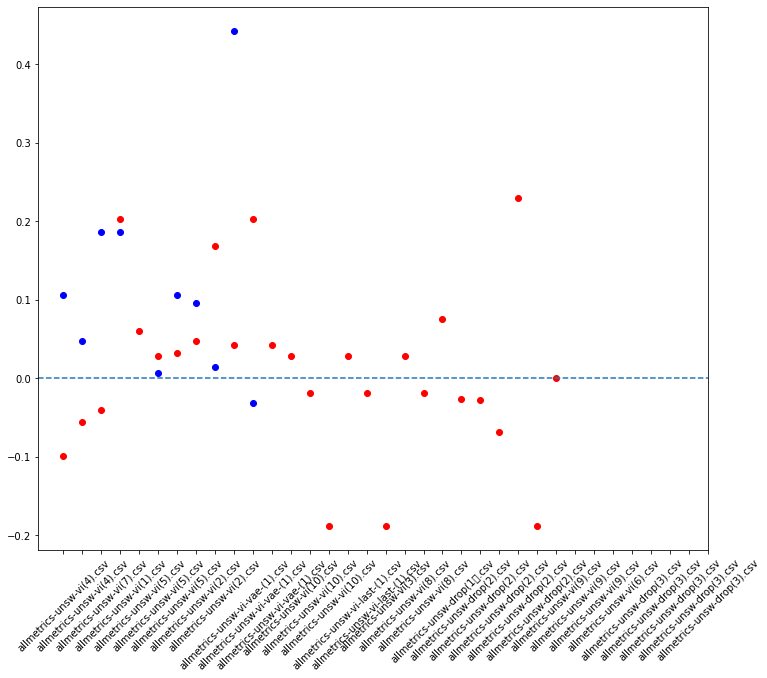

In [90]:
# plot map
xvi = range(len(gainsvifiles))
xdrop=range(len(gainsdropfiles))
vi=np.array(gainsvi)
drop=np.array(gainsdrop)

pyplot.figure(figsize=(12,10))
#pyplot.errbar(x,gains,yerr=0.2,fmt='ob',linestype='None',capsize=3)
pyplot.scatter(xvi,vi,color='r',label='BAE-VI') 
pyplot.scatter(xdrop,drop, color='b',label='BAE-Dropout')
pyplot.axhline(y=0,linestyle='--') 
pyplot.xticks(x, gainfiles, rotation=45)

pyplot.show()

In [ ]:
'''
to extract data about CIC-IDS-2017. but there is not 'gainaccu' in csv records.
'''
gainsvifiles=[]
gainsdropfiles=[]
gainsdrop=[]
gainsvi=[]
for root,dirs,files in os.walk(dicplotsnpy):
    for each in files:
        if (dicplotsnpy+each).endswith('.csv') and 'checkpoint' not in each:        
            #if !each.contains('+') and each.split('-')[1]=='unsw':
            if '+' not in each and  'unsw' not in each: 
                print(each)
                pd_reader=pd.read_csv(dicplotsnpy+each,header=0 ,index_col=1)
                    #pd_reader.GaussianGustom.loc['gainaccu']
                    #gains.append(
                aa=pd_reader.loc['gainaccu','GaussianCustom']
                try:
                    if len(aa)>1 :
                        for vv in aa.values:
                            if not vv is None:
                                gainsvi.append(float(vv))
                                gainsvifiles.append(each) 

                except:
                    if not aa is None:
                        gainsvi.append(float(aa))
                        gainsvifiles.append(each)  

### gain of last,latent,homo

#### UNSW

In [24]:
def plotscatter4(datalist):
    num=len(datalist)
    
    titles=['Homo','Hetero-Last','Hetero-Latent','Hetero-Latent-VLB']
    fig, axes = pyplot.subplots(nrows=1, ncols=num, figsize=(24, 4),sharey=True)
    for ind in range(0,num):
        
        xx=range(1,len(datalist[ind][0])+1 )
        axes[ind].scatter(xx,datalist[ind][0],color='g',marker='^',s=100,label='Total')  
        axes[ind].scatter(xx,datalist[ind][1],color='b',marker='*',s=100,label='Aleatoric') 
        axes[ind].scatter(xx,datalist[ind][2], color='y',marker='o',label='Epistemic')             
        #axes[ind].axhline(y=datalist[ind][3],linestyle='--') 
        #axes[ind].scatter(xx,datalist[ind][3])
        if len(datalist[ind])>3:
            axes[ind].plot(xx,datalist[ind][3])              
        axes[ind].set_title(titles[ind])
    # adding horizontal grid lines
    for ax in axes:
        #ax.yaxis.grid(True)
        ax.set_xticks(range(1,len(attack_types)))
        ax.set_xticklabels(ax.get_xticks(),rotation=55)
        ax.set_xlabel('Attack Types')
        ax.set_ylabel('AUC-ROC')   #  Accuracy') # 
        ax.set_xlim(0,len(attack_types))
        #ax.set_ylim(0,0.3)
        ax.label_outer()
        #ax.axhline(y=0,linestyle='--') 
        ax.grid(axis='x',linestyle='--')

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right" , bbox_to_anchor=(0.9,1.1))
    # add x-tick labels
    pyplot.setp(axes, xticks=range(1,len(attack_types)),  xticklabels=attack_types[1:])
    pyplot.show()


In [3]:
def plotscatter1(datalist):
    num=len(datalist)
    
    titles=['Homo','Hetero-Last','Hetero-Latent','Hetero-Latent-VLB']
    fig, axes = pyplot.subplots(nrows=1, ncols=num, figsize=(24, 4),sharey=True)
    for ind in range(0,num):
        
        xx=range(1,len(datalist[ind][0])+1 )
        axes[ind].scatter(xx,datalist[ind][0],color='g',marker='^',s=90,label='Total UQ')  
        # axes[ind].scatter(xx,datalist[ind][1],color='b',marker='*',s=100,label='Aleatoric') 
        # axes[ind].scatter(xx,datalist[ind][2], color='y',marker='o',label='Epistemic')             
        #axes[ind].axhline(y=datalist[ind][3],linestyle='--') 
        #axes[ind].scatter(xx,datalist[ind][3])
        axes[ind].plot(xx,datalist[ind][3], linewidth=0.7)    
        axes[ind].scatter(xx,datalist[ind][3],marker='x', s=50,label='Non-UQ') 
        axes[ind].set_title(titles[ind])
    # adding horizontal grid lines
    for ax in axes:
        #ax.yaxis.grid(True)
        ax.set_xticks(range(1,len(attack_types)))
        ax.set_xticklabels(ax.get_xticks(),rotation=55)
        ax.set_xlabel('Attack Types')
        ax.set_ylabel('AUC-ROC')   #  Accuracy') # 
        ax.set_xlim(0,len(attack_types))
        #ax.set_ylim(0,0.3)
        ax.label_outer()
        #ax.axhline(y=0,linestyle='--') 
        ax.grid(axis='x',linestyle='--')

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right" , bbox_to_anchor=(0.9,1.1))
    # add x-tick labels
    pyplot.setp(axes, xticks=range(1,len(attack_types)),  xticklabels=attack_types[1:])
    
    pyplot.savefig(dicavgnpy+'aa.pdf')
    pyplot.show()


In [5]:
# only capture gain values of total,alea,epis without ini value
def getGainOf3Alea(filenamelist,metric='AS',gain=7):   #  ECODLinear   GaussianCustom  # Gamma # Gaussian1        
    allfilegain=[]
    for filename in filenamelist:
        filegain=[]
        gainstotal=[]
        gainsalea=[]
        gainsepis=[]
        gainindex=gain  # 6 ,7,8,9   # 6:gainavgaccu of avgaccu2    7:gainavgauc of avgauc    8:gainaccu of waccu    9:gainauc of wauc
        pd_reader=pd.read_csv(filename,header=0 ,index_col=1)
        for each in range(1,len( attack_types)):
            i=1
            while i<len(pd_reader):
                if '+' in pd_reader.iloc[i,0] :  
                    if pd_reader.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each] and pd_reader.iloc[i,0].split('+')[0] ==metric :
                        gainstotal.append(float( pd_reader.iloc[17+i,gainindex]) )                 
                        gainsalea.append( float(pd_reader.iloc[17+i+18,gainindex]) ) 
                        gainsepis.append(float( pd_reader.iloc[17+i+18+18,gainindex]) )                                       
                        i=i+18*3
                        continue
                i+=1
        filegain.append(gainstotal)
        filegain.append(gainsalea)
        filegain.append(gainsepis)
        allfilegain.append(filegain)
        
    return allfilegain
        

In [10]:
#def getGainOf3AleaWithIni(filenamelist,metric='ECODLinear',gain=1):   #  ECODLinear   GaussianCustom  # Gamma # Gaussian1        
def getGainOf3AleaWithIni(filenamelist,metrics=['G2'],gain=1):   #  mix metrics   # AS,G1,G2, Triang
    metricindex=-1
    allfilegain=[]    
    for filename in filenamelist:
        metricindex=metricindex+1
        filegain=[]
        gainstotal=[]
        gainsalea=[]
        gainsepis=[]
        gainini=[]
        gainindex=gain+1  # 6 ,7,8,9   # 6:gainavgaccu of avgaccu2    7:gainavgauc of avgauc    8:gainaccu of waccu    9:gainauc of wauc
        #  2: waccu2   1: wauc  3:avgaccu2   4:avgauc
        pd_reader=pd.read_csv(filename,header=0)# ,index_col=1)
        for each in range(1,len( attack_types)):
            i=1
            while i<len(pd_reader):
                if metrics!=[]:
                    if '+' in pd_reader.iloc[i,0] :  
                        if pd_reader.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each] and pd_reader.iloc[i,0].split('+')[0] ==metrics[metricindex] :
                            gainstotal.append(float( pd_reader.iloc[17+i,gainindex]) )                 
                            gainsalea.append( float(pd_reader.iloc[17+i+18,gainindex]) ) 
                            gainsepis.append(float( pd_reader.iloc[17+i+18+18,gainindex]) )
                            gainini.append(float(pd_reader.iloc[3+i,1])) #  the first auc value    -0.015 

                            i=i+18*3
                            continue
                else:
                    if pd_reader.iloc[i,0]==attack_types[each] :
                        gainstotal.append(float( pd_reader.iloc[17+i,gainindex]) )                 
                        gainsalea.append( float(pd_reader.iloc[17+i+18,gainindex]) ) 
                        gainsepis.append(float( pd_reader.iloc[17+i+18+18,gainindex]) )
                        gainini.append(float(pd_reader.iloc[3+i,1])-0.015 ) #   ) # the first auc value    #  

                        i=i+18*3
                        continue
                i+=1
        filegain.append(gainstotal)
        filegain.append(gainsalea)
        filegain.append(gainsepis)
        filegain.append(gainini)
        allfilegain.append(filegain)
        
    return allfilegain
        

##### plot gain for avg each value

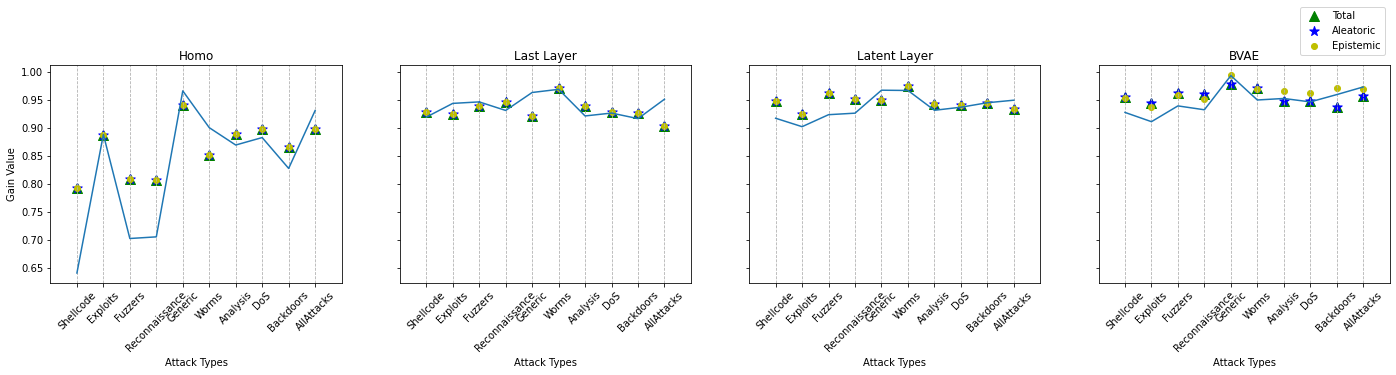

In [8]:
# Unsw dropout
# modellist must notice the adding sequence.
# 1   VI
modellist=[]
metricsbest=[]
# input
modellist.append(dicavgnpy+'unsw-VI-input-1+metrics+mean.csv')  # G1
#modellist.append(dicavgnpy+'unsw-VI-input-1+metrics+std.csv')  # G1
metricsbest.append('G1')

# last
modellist.append(dicavgnpy+'unsw-VI-last-1+metrics+mean.csv') #G2
#modellist.append(dicavgnpy+'unsw-VI-last-1+metrics+std.csv') #G2
metricsbest.append('G2')

#latent
modellist.append(dicavgnpy+'unsw-VI-latent-1+metrics+mean.csv')  # G2
#modellist.append(dicavgnpy+'unsw-VI-latent-1+metrics+std.csv')  # G2
metricsbest.append('G2')

# vae
modellist.append(dicplotsnpy+'BDLunsw-44-vi-vae-1-mae-mae+allmetrics.csv')  #G1 
#modellist.append(dicavgnpy+'unsw-VI-vae-1+metrics+mean.csv')  #G2 
#modellist.append(dicavgnpy+'unsw-VI-vae-1+metrics+std.csv')  #G2 
metricsbest.append('G1')


#allgains=getGainOf3Alea(modellist, metric='G1', gain=9)      #    
allgains=getGainOf3AleaWithIni(modellist, metrics=metricsbest, gain=1)
plotscatter4(allgains)

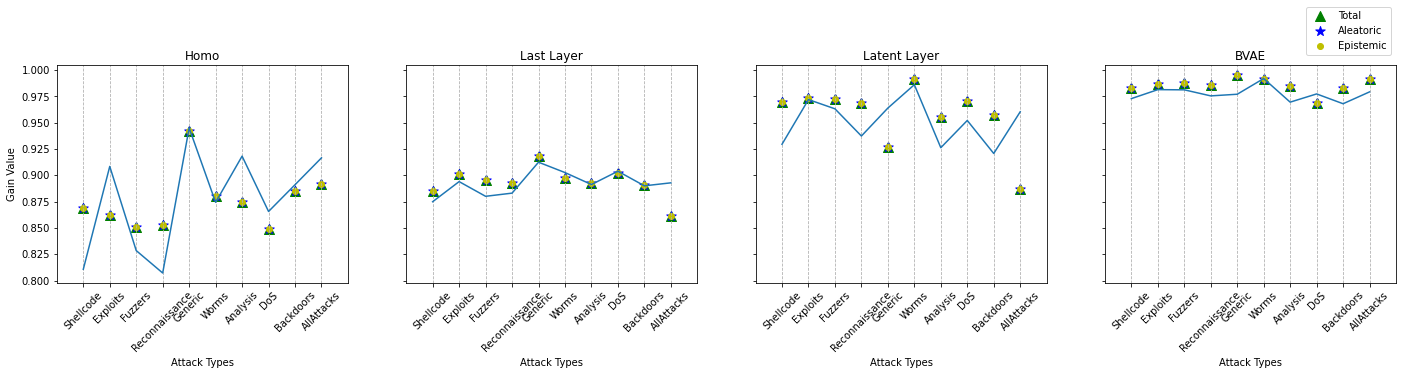

In [9]:
# Unsw dropout
# modellist must notice the adding sequence.
# 1  MCD
modellist=[]
metricsbest=[]
# input
modellist.append(dicavgnpy+'unsw-MCD-input-1+metrics+mean.csv')  # G1
#modellist.append(dicavgnpy+'unsw-MCD-input-1+metrics+std.csv')  # G1
metricsbest.append('G1')

# last
modellist.append(dicavgnpy+'unsw-MCD-last-1+metrics+mean.csv') #G2
#modellist.append(dicavgnpy+'unsw-MCD-last-1+metrics+std.csv') #G2
metricsbest.append('Triang')

#latent
modellist.append(dicavgnpy+'unsw-MCD-latent-1+metrics+mean.csv')  # G2
#modellist.append(dicavgnpy+'unsw-MCD-latent-1+metrics+std.csv')  # G2
metricsbest.append('G2')

# vae
modellist.append(dicavgnpy+'unsw-MCD-vae-1+metrics+mean.csv')  #G2 
#modellist.append(dicavgnpy+'unsw-MCD-vae-1+metrics+std.csv')  #G2 
metricsbest.append('G1')


#allgains=getGainOf3Alea(modellist, metric='G1', gain=9)      #    
allgains=getGainOf3AleaWithIni(modellist, metrics=metricsbest, gain=1)
plotscatter4(allgains)

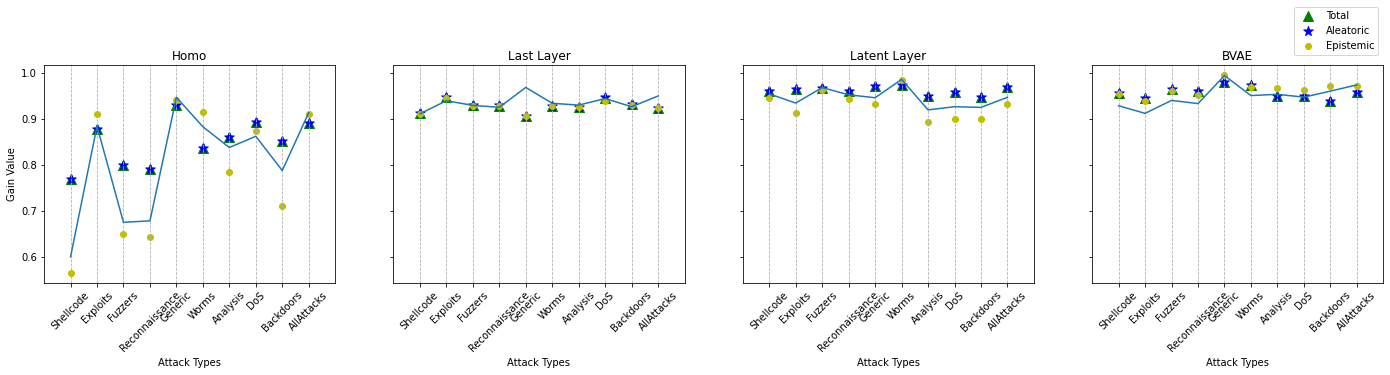

In [44]:
# Unsw vi for one case

# 1    
modellist=[]
metricsbest=[]
modellist.append(dicplotsnpy+'BDLunsw-44-vi-111-input-seed-mae-mae+allmetrics.csv')
metricsbest.append('G1')

modellist.append(dicplotsnpy+'BDLunsw-44-vi-111-last-dTril-mae-mae+allmetrics.csv')
metricsbest.append('Triang')
modellist.append(dicplotsnpy+'BDLunsw-21111-vi-latent-Tril-model-denseTril--mae-mse+allmetrics.csv')
metricsbest.append('G1')
modellist.append(dicplotsnpy+'BDLunsw-44-vi-vae-1-mae-mae+allmetrics.csv')
metricsbest.append('G1')
allgains=getGainOf3AleaWithIni(modellist, metrics=metricsbest, gain=1)
#
#allgains=getGainOf3Alea(modellist)
plotscatter4(allgains)
#plotscatter4(allgains2)
#plotscatter4(allgains3)
#plotscatter4(allgains4)

##### plot gain for avg best value

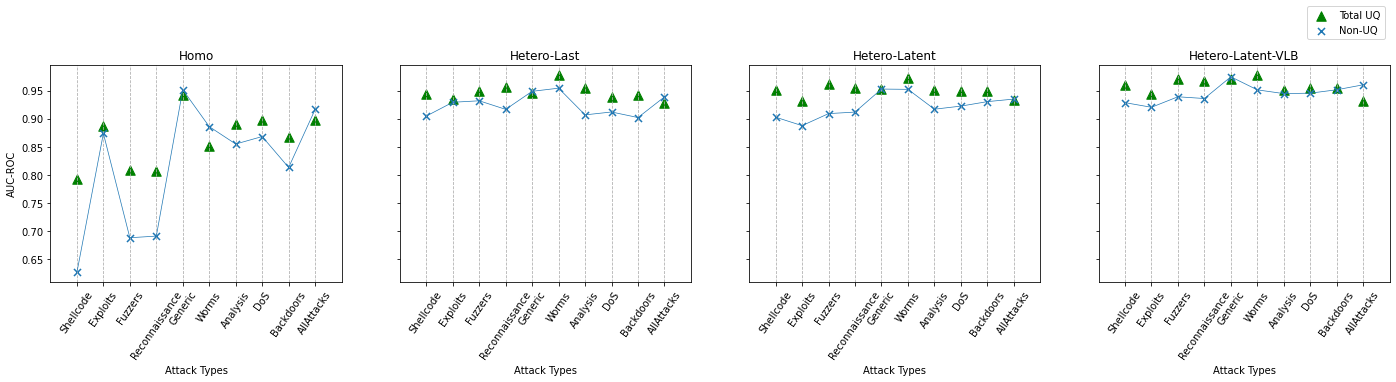

In [11]:
# Unsw dropout
# modellist must notice the adding sequence.
# 1   VI
modellist=[]
metricsbest=[]
# input
modellist.append(dicavgnpy+'unsw-VI-input-best-1+best+metrics+mean.csv')  

# last
modellist.append(dicavgnpy+'unsw-VI-last-best-1+best+metrics+mean.csv') 

#latent
modellist.append(dicavgnpy+'unsw-VI-latent-best-1+best+metrics+mean.csv') 

# vae
modellist.append(dicavgnpy+'unsw-VI-vae-best-1+best+metrics+mean.csv')  

#allgains=getGainOf3Alea(modellist, metric='G1', gain=9)      #    
allgains=getGainOf3AleaWithIni(modellist, metrics=metricsbest, gain=1)
#plotscatter4(allgains)
plotscatter1(allgains)

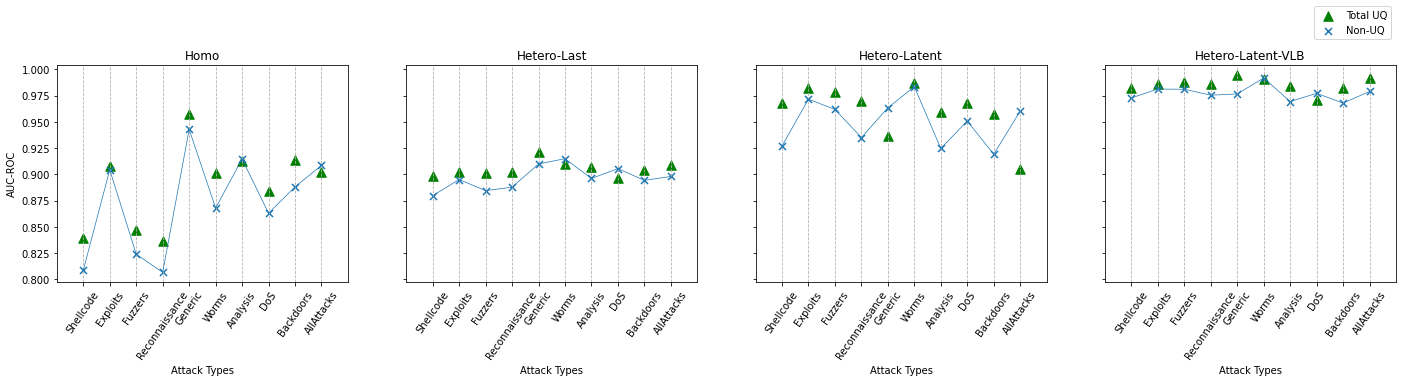

In [9]:
# Unsw dropout
# modellist must notice the adding sequence.
# 1  MCD
modellist=[]
metricsbest=[]
# input
modellist.append(dicavgnpy+'unsw-MCD-input-best-1+best+metrics+mean.csv') 

# last
modellist.append(dicavgnpy+'unsw-MCD-last-best-1+best+metrics+mean.csv') 

#latent
modellist.append(dicavgnpy+'unsw-MCD-latent-best-1+best+metrics+mean.csv') 

# vae
modellist.append(dicavgnpy+'unsw-MCD-vae-best-1+best+metrics+mean.csv') 


#allgains=getGainOf3Alea(modellist, metric='G1', gain=9)      #    
allgains=getGainOf3AleaWithIni(modellist, metrics=metricsbest, gain=1)
#plotscatter4(allgains)
plotscatter1(allgains)

#### CIC2017

In [8]:
def plotscatter4(datalist):
    num=len(datalist)
    xx=range(1,len(datalist[0][0])  +1)
    titles=['Homo','Hetero-Last','Hetero-Latent','Hetero-Latent-VLB']
    fig, axes = pyplot.subplots(nrows=1, ncols=num, figsize=(24, 4),sharey=True)
    for ind in range(0,num):
        axes[ind].scatter(xx,datalist[ind][0],color='g',marker='^',s=90,label='Total')  
        #axes[ind].scatter(xx,datalist[ind][1],color='b',marker='*',s=100,label='Aleatoric') 
        #axes[ind].scatter(xx,datalist[ind][2], color='y',marker='o',label='Epistemic')   
        if len(datalist[ind])>3:
            axes[ind].plot(xx,datalist[ind][3], linewidth=0.7)  
            axes[ind].scatter(xx,datalist[ind][3], marker='x',s=50, label='Non-UQ') # color='y',
        axes[ind].set_title(titles[ind])
    # adding horizontal grid lines
    for ax in axes:
        #ax.yaxis.grid(True)
        ax.set_xticks(range(1,len(attack_types2)))
        ax.set_xticklabels(ax.get_xticks(),rotation=65)
        ax.set_xlabel('Attack Types')
        ax.set_ylabel('AUC-ROC')   #  Accuracy') # 
        ax.set_xlim(0,len(attack_types2))
        #ax.set_ylim(0,0.3)
        ax.label_outer()
        #ax.axhline(y=0,linestyle='--') 
        ax.grid(axis='x',linestyle='--')

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right" , bbox_to_anchor=(0.9,1.1))
    # add x-tick labels
    pyplot.setp(axes, xticks=range(1,len(attack_types2)),  xticklabels=attack_types2[1:])
    
    pyplot.savefig(dicavgnpy+'bb.pdf')
    pyplot.show()


In [5]:
def getGainOf3Alea(filenamelist,metric='ECODLinear',gain=7):   #  ECODLinear   GaussianCustom  # Gamma # Gaussian1        
    allfilegain=[]
    for filename in filenamelist:
        filegain=[]
        gainstotal=[]
        gainsalea=[]
        gainsepis=[]
        gainindex=gain  # 6 ,7,8,9   # 6:gainavgaccu of avgaccu2    7:gainavgauc of avgauc    8:gainaccu of waccu    9:gainauc of wauc
        pd_reader=pd.read_csv(filename,header=0 ,index_col=1)
        for each in range(1,len( attack_types)):
            i=1
            while i<len(pd_reader):
                if '+' in pd_reader.iloc[i,0] :  
                    if pd_reader.iloc[i,0].split('+')[1]==attack_types[each] and pd_reader.iloc[i,0].split('+')[0] ==metric :
                        gainstotal.append(float( pd_reader.iloc[17+i,gainindex] ))                  
                        gainsalea.append( float(pd_reader.iloc[17+i+18,gainindex] )) 
                        gainsepis.append(float(pd_reader.iloc[17+i+18+18,gainindex]) )
                        i=i+18*3
                        continue
                i+=1
        filegain.append(gainstotal)
        filegain.append(gainsalea)
        filegain.append(gainsepis)
        allfilegain.append(filegain)
        
    return allfilegain
        

In [5]:
#def getGainOf3AleaWithIni(filenamelist,metric='ECODLinear',gain=1):   #  ECODLinear   GaussianCustom  # Gamma # Gaussian1 
def getGainOf3AleaWithIni(filenamelist,metrics=['ECODLinear'],gain=1):    
    # same to the function in UNSW
    metricsindex=-1
    allfilegain=[]
    for filename in filenamelist:
        metricsindex=metricsindex+1
        filegain=[]
        gainstotal=[]
        gainsalea=[]
        gainsepis=[]
        gainini=[]
        gainindex=gain+1  # 6 ,7,8,9   # 6:gainavgaccu of avgaccu2    7:gainavgauc of avgauc    8:gainaccu of waccu    9:gainauc of wauc
        #  2: waccu2   1: wauc  3:avgaccu2   4:avgauc
        pd_reader=pd.read_csv(filename,header=0)# ,index_col=1)
        for each in range(1,len( attack_types)):
            i=1
            while i<len(pd_reader):
                if metrics!=[]:
                    if '+' in pd_reader.iloc[i,0] :  
                        if pd_reader.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each] and pd_reader.iloc[i,0].split('+')[0] ==metrics[metricsindex] :
                            gainstotal.append(float( pd_reader.iloc[17+i,gainindex]) )                 
                            gainsalea.append( float(pd_reader.iloc[17+i+18,gainindex]) ) 
                            gainsepis.append(float( pd_reader.iloc[17+i+18+18,gainindex]) )
                            gainini.append(float(pd_reader.iloc[3+i,1]))  #  the first auc value

                            i=i+18*3
                            continue
                    i+=1
                else:
                    if pd_reader.iloc[i,0]==attack_types[each] :
                        gainstotal.append(float( pd_reader.iloc[17+i,gainindex]) )                 
                        gainsalea.append( float(pd_reader.iloc[17+i+18,gainindex]) ) 
                        gainsepis.append(float( pd_reader.iloc[17+i+18+18,gainindex]) )
                        gainini.append(float(pd_reader.iloc[3+i,1]) ) #  the first auc value    #   -0.015 

                        i=i+18*3
                        continue
                    i+=1
        filegain.append(gainstotal)
        filegain.append(gainsalea)
        filegain.append(gainsepis)
        filegain.append(gainini)
        allfilegain.append(filegain)
        
    return allfilegain
        

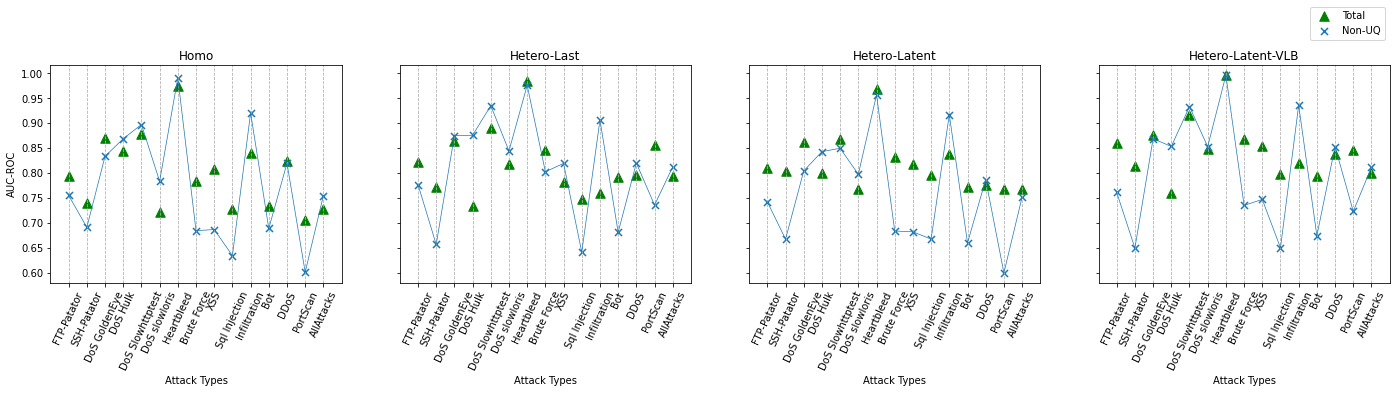

In [9]:
# cic2017 dropout
# modellist must notice the adding sequence.
# 1   MCD
modellist=[]
metricsbest=[]
# input
modellist.append(dicavgnpy+'cic-MCD-input-best-1+best+metrics+mean.csv')  

# last
modellist.append(dicavgnpy+'cic-MCD-last-best-1+best+metrics+mean.csv') 

#latent
modellist.append(dicavgnpy+'cic-MCD-latent-best-1+best+metrics+mean.csv') 

# vae
modellist.append(dicavgnpy+'cic-MCD-vae-best-1+best+metrics+mean.csv')  

#allgains=getGainOf3Alea(modellist, metric='G1', gain=9)      #    
allgains=getGainOf3AleaWithIni(modellist, metrics=metricsbest, gain=1)
#plotscatter4(allgains)
plotscatter4(allgains)

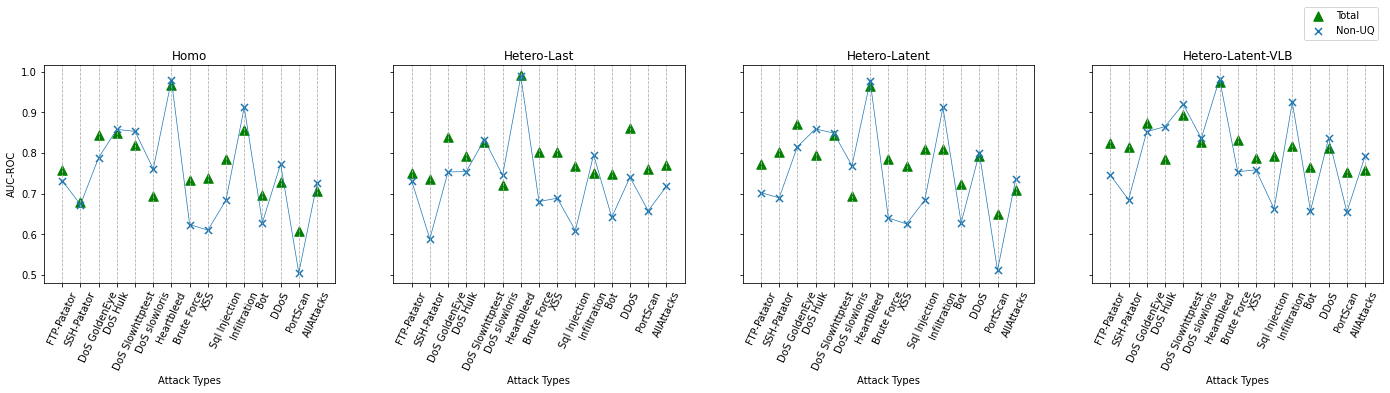

In [10]:
# cic2017 dropout
# modellist must notice the adding sequence.
# 1   VI
modellist=[]
metricsbest=[]
# input
modellist.append(dicavgnpy+'cic-VI-input-best-1+best+metrics+mean.csv')  

# last
modellist.append(dicavgnpy+'cic-VI-last-best-1+best+metrics+mean.csv') 

#latent
modellist.append(dicavgnpy+'cic-VI-latent-best-1+best+metrics+mean.csv') 

# vae
modellist.append(dicavgnpy+'cic-VI-vae-best-1+best+metrics+mean.csv')  

#allgains=getGainOf3Alea(modellist, metric='G1', gain=9)      #    
allgains=getGainOf3AleaWithIni(modellist, metrics=metricsbest, gain=1)
#plotscatter4(allgains)
plotscatter4(allgains)

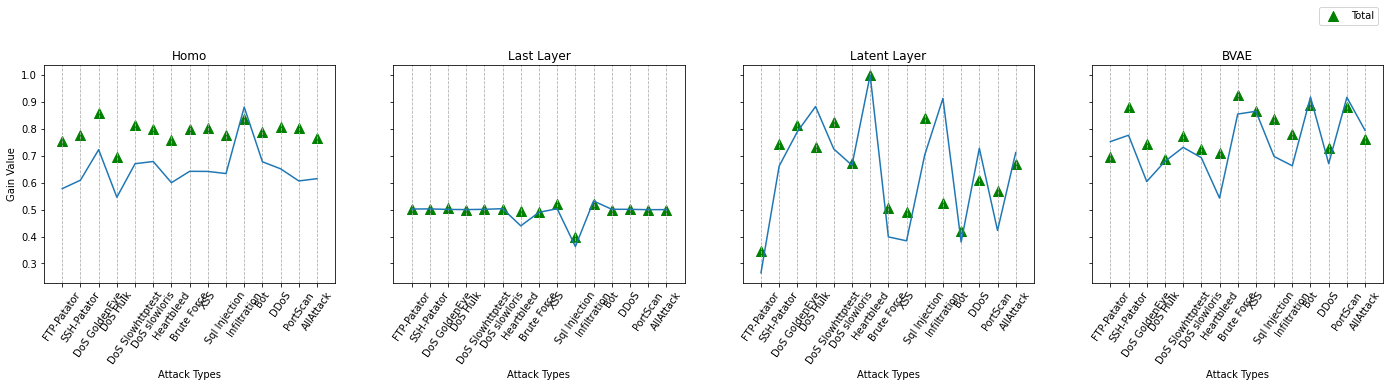

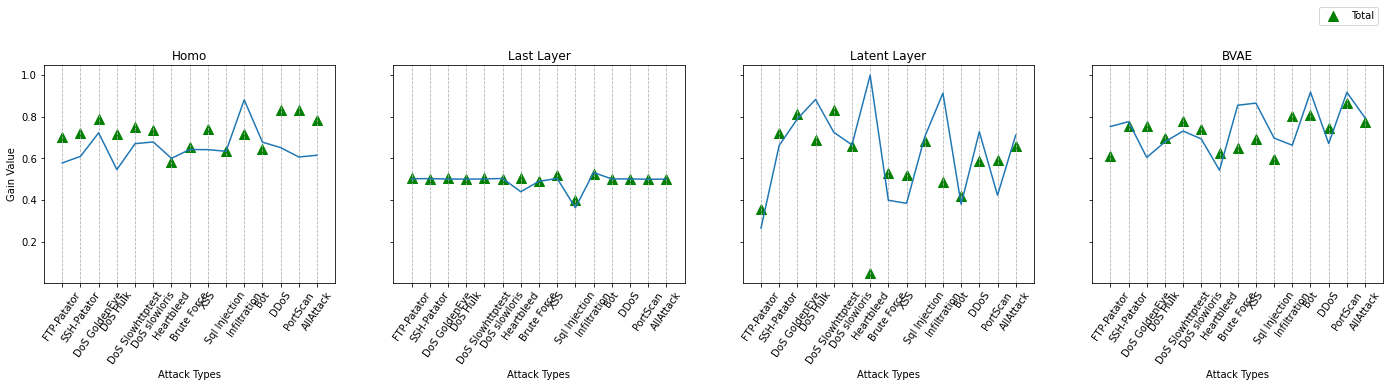

In [11]:
# CIC2017 dropout
'''
# 1
modellist=[]
modellist.append(dicplotsnpy3+'BAEcic2017-drop-input-bce+allmetrics.csv')
modellist.append(dicplotsnpy3+'BAEcic2017-drop-last-bce+allmetrics.csv')
modellist.append(dicplotsnpy3+'BAEcic2017-drop-latent-mae+allmetrics.csv')
modellist.append(dicplotsnpy3+'BAEcic2017-drop-vae-bce+allmetrics.csv')
allgains=getGainOf3Alea(modellist)
'''
'''
# mix for best
modellist=[]
metricsbest=[]
modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-input-bce+allmetrics.csv')   # G1:0.789 
metricsbest.append('Gaussian1')
modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-last-mvn-bce+allmetrics.csv')  # GC:0.6943
metricsbest.append('GaussianCustom')
modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-latent-Tril-bce+allmetrics.csv')  # ECOD:0.65
metricsbest.append('ECODLinear')
#modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-vae-Tril-bce+allmetrics.csv')   # ECOD:0.78
#modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-vae-Tril-bce+allmetrics444.csv')   # ECOD:0.786
#modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-vae-Tril-bce+allmetrics555.csv')  # ECOD:0.791
modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-vae-Tril-bce+allmetrics666.csv')    # ECOD:0.792
metricsbest.append('ECODLinear')
#modellist.append(dicplotsnpy+'BAEcic2017-5-drop-vae-norm-Tril-KLregu-mae+allmetrics.csv')    # G1:0.794
# modellist.append(dicplotsnpy+'BAEcic2017-5-drop-vae-norm-Tril-KLregu-mae+allmetrics111.csv')    # G1:0.794
# metricsbest.append('Gaussian1')
############################################################################################################################
'''
allgains1=getGainOf3Alea(modellist, metric='ECODLinear', gain=8)   # waccu   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains2=getGainOf3Alea(modellist, metric='ECODLinear', gain=9)   # wauc   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains3=getGainOf3Alea(modellist, metric='ECODLinear', gain=6)   # wavgaccu2   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains4=getGainOf3Alea(modellist, metric='ECODLinear', gain=7)   # wavgauc   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
'''
allgains1=getGainOf3AleaWithIni(modellist, metrics=metricsbest, gain=1)     
#allgains2=getGainOf3AleaWithIni(modellist,metrics=metricsbest, gain=2)  
allgains3=getGainOf3AleaWithIni(modellist, metrics=metricsbest, gain=4)     
#allgains4=getGainOf3AleaWithIni(modellist, metrics=metricsbest, gain=3) 
'''
allgains1=getGainOf3AleaWithIni(modellist, metric='ECODLinear', gain=1)     
allgains2=getGainOf3AleaWithIni(modellist, metric='ECODLinear', gain=2)  
allgains3=getGainOf3AleaWithIni(modellist, metric='ECODLinear', gain=4)     
allgains4=getGainOf3AleaWithIni(modellist, metric='ECODLinear', gain=3)    

allgains1=getGainOf3AleaWithIni(modellist, metric='Gaussian1', gain=1)   # auc  
allgains2=getGainOf3AleaWithIni(modellist, metric='Gaussian1', gain=2)   # accu
allgains3=getGainOf3AleaWithIni(modellist, metric='Gaussian1', gain=4)   # avgauc   
allgains4=getGainOf3AleaWithIni(modellist, metric='Gaussian1', gain=3)   # avgaccu

allgains1=getGainOf3AleaWithIni(modellist, metric='GaussianCustom', gain=1)   # auc  
allgains2=getGainOf3AleaWithIni(modellist, metric='GaussianCustom', gain=2)   # accu
allgains3=getGainOf3AleaWithIni(modellist, metric='GaussianCustom', gain=4)   # avgauc   
allgains4=getGainOf3AleaWithIni(modellist, metric='GaussianCustom', gain=3)   # avgaccu

allgains1=getGainOf3AleaWithIni(modellist, metric='Gamma', gain=1)   #  
allgains2=getGainOf3AleaWithIni(modellist, metric='Gamma', gain=2)   #  
allgains3=getGainOf3AleaWithIni(modellist, metric='Gamma', gain=4)   #  
allgains4=getGainOf3AleaWithIni(modellist, metric='Gamma', gain=3)   # 

allgains1=getGainOf3AleaWithIni(modellist, metric='Poisson', gain=1)   #  
allgains2=getGainOf3AleaWithIni(modellist, metric='Poisson', gain=2)   #  
allgains3=getGainOf3AleaWithIni(modellist, metric='Poisson', gain=4)   #  
allgains4=getGainOf3AleaWithIni(modellist, metric='Poisson', gain=3)   # 

allgains1=getGainOf3AleaWithIni(modellist, metric='Uniform', gain=1)   #  
allgains2=getGainOf3AleaWithIni(modellist, metric='Uniform', gain=2)   #  
allgains3=getGainOf3AleaWithIni(modellist, metric='Uniform', gain=4)   #  
allgains4=getGainOf3AleaWithIni(modellist, metric='Uniform', gain=3)   # 

allgains1=getGainOf3AleaWithIni(modellist, metric='Triang', gain=1)   #  
allgains2=getGainOf3AleaWithIni(modellist, metric='Triang', gain=2)   #  
allgains3=getGainOf3AleaWithIni(modellist, metric='Triang', gain=4)   #  
allgains4=getGainOf3AleaWithIni(modellist, metric='Triang', gain=3)   # 

allgains1=getGainOf3AleaWithIni(modellist, metric='T', gain=1)   #  
allgains2=getGainOf3AleaWithIni(modellist, metric='T', gain=2)   #  
allgains3=getGainOf3AleaWithIni(modellist, metric='T', gain=4)   #  
allgains4=getGainOf3AleaWithIni(modellist, metric='T', gain=3)   # 
'''
plotscatter4(allgains1)
#plotscatter4(allgains2)
plotscatter4(allgains3)
#plotscatter4(allgains4)

In [ ]:
# CIC2017 vi
'''
# 1
modellist=[]
modellist.append(dicplotsnpy+'BAEcic2017-vi-input-mae+allmetrics.csv')
modellist.append(dicplotsnpy+'BAEcic2017-vi-last-bce+allmetrics.csv')
modellist.append(dicplotsnpy+'BAEcic2017-vi-latent-mae+allmetrics.csv')
modellist.append(dicplotsnpy+'BAEcic2017-vi-vae-bce+allmetrics.csv')
allgains=getGainOf3Alea(modellist)
'''
# mix for best
inidata=get3uncer(dicplotsnpy,'BAEcic2017-5-vi-iniput-Tril-bce+alluncer.csv',datasetname='cic2017')    # G1:0.6455
last=get3uncer(dicplotsnpy,'BAEcic2017-5-vi-last-bce+alluncer.csv',datasetname='cic2017')    # G1:0.589
latent=get3uncer(dicplotsnpy,'BAEcic2017-5-vi-latent-mae+alluncer111.csv',datasetname='cic2017')    # G1:0.638
vae=get3uncer(dicplotsnpy,'BAEcic2017-5-vi-vae-norm-Tril-bce+alluncer.csv',datasetname='cic2017')    # G1:0.6455
vae=get3uncer(dicplotsnpy,'BAEcic2017-3-vi-vae-mvnTril-bce+alluncer555.csv',datasetname='cic2017')    # G1:0.597
##################################################################################################
'''
allgains1=getGainOf3Alea(modellist, metric='ECODLinear', gain=8)   # waccu   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains2=getGainOf3Alea(modellist, metric='ECODLinear', gain=9)   # wauc   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains3=getGainOf3Alea(modellist, metric='ECODLinear', gain=6)   # wavgaccu2   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9
allgains4=getGainOf3Alea(modellist, metric='ECODLinear', gain=7)   # wavgauc   ECODLinear   GaussianCustom  # Gamma # Gaussian1    6-9

# for sort , # 5
allgains1=getGainOf3Alea(modellist, metric='Poisson', gain=8)   #  
allgains2=getGainOf3Alea(modellist, metric='Poisson', gain=9)   #  
allgains3=getGainOf3Alea(modellist, metric='Poisson', gain=6)   #  
allgains4=getGainOf3Alea(modellist, metric='Poisson', gain=7)   # 

allgains1=getGainOf3Alea(modellist, metric='Uniform', gain=8)   #  
allgains2=getGainOf3Alea(modellist, metric='Uniform', gain=9)   #  
allgains3=getGainOf3Alea(modellist, metric='Uniform', gain=6)   #  
allgains4=getGainOf3Alea(modellist, metric='Uniform', gain=7)   # 

allgains1=getGainOf3Alea(modellist, metric='Triang', gain=8)   #  
allgains2=getGainOf3Alea(modellist, metric='Triang', gain=9)   #  
allgains3=getGainOf3Alea(modellist, metric='Triang', gain=6)   #  
allgains4=getGainOf3Alea(modellist, metric='Triang', gain=7)   # 

allgains1=getGainOf3Alea(modellist, metric='T', gain=8)   #  
allgains2=getGainOf3Alea(modellist, metric='T', gain=9)   #  
allgains3=getGainOf3Alea(modellist, metric='T', gain=6)   #  
allgains4=getGainOf3Alea(modellist, metric='T', gain=7)   # 
#######################################################################################
'''
plotscatter4(allgains1)
plotscatter4(allgains2)
plotscatter4(allgains3)
plotscatter4(allgains4)

In [16]:
# 1.compare 3 uncertainty in one model
modelfilename='BDLunsw9-vi-vae-diag-bce+allmetrics.csv'   #  'BAEmcdropout_UNSW-NB15_L64_gaussian_none_wd1-allmetrics.csv' dicplotsnpy3
gainstotal=[]
gainsalea=[]
gainsepis=[]
gainindex=8  #,7,8,9   # 6:gainavgaccu    7:gainavgauc    8:gainaccu    9:gainauc
metricname=  'Triang'   # 'Gaussian1'  #  'ECODLinear'   #  
pd_reader=pd.read_csv(dicplotsnpy+modelfilename,header=0 ,index_col=1)

for each in range(1,len( attack_types)):
    #i=109
    i=0
    while i<len(pd_reader):
        
    #for i in range(109,len(pd_reader)):    #,18*3
        if '+' in pd_reader.iloc[i,0] :          
            if pd_reader.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each] and pd_reader.iloc[i,0].split('+')[0] == metricname:
                
                gainstotal.append(float( pd_reader.iloc[17+i,gainindex] ))                  
                gainsalea.append( float(pd_reader.iloc[17+i+18,gainindex] )) 
                gainsepis.append(float(pd_reader.iloc[17+i+18+18,gainindex]) )
            i=i+18*3
            continue
        i+=1
                    

In [ ]:
# plot map
xx=range(0,len(gainstotal))
print(len(gainstotal))
#xx_a=range(0,len(gainsalea))
#xx_e=range(0,len(gainsepis))
pyplot.figure(figsize=(10,8))
#pyplot.errbar(x,gains,yerr=0.2,fmt='ob',linestype='None',capsize=3)
pyplot.scatter(xx,gainstotal,color='g',marker='^',s=170,label='Total') 
pyplot.scatter(xx,gainsalea, color='b',marker='*',s=100,label='Aleatoric')
pyplot.scatter(xx,gainsepis, color='y',marker='o',label='Epistemic')
pyplot.axhline(y=0,linestyle='--') 
pyplot.xticks(xx, attack_types2[1:], rotation=45)
pyplot.legend(loc='best')
pyplot.grid(axis='x',linestyle='--')
pyplot.show()

#### 3 alea in one model

In [64]:
# 2.compare 3 weighted metrics in multiple model
# in VI
vifilename='BAEunsw-vi-latent-mvn-bce+allmetricsSum.csv'
gainsvi=[]
for root,dirs,files in os.walk(dicplotsnpy):
    for each in files:
        if each==vifilename:
            pd_reader=pd.read_csv(dicplotsnpy+each,header=0 ,index_col=1)
            #aa=pd_reader.loc['gainaccu','GaussianCustom']
            #aa=pd_reader.loc['gainaccu','ECODLinear']
            #aa=pd_reader.loc['gainauc','ECODLinear']
            aa=pd_reader.loc['gainauc','GaussianCustom']
            try:
                if len(aa)>1 :
                    for vv in aa.values:
                        if not vv is None:
                            gainsvi.append(float(vv))
            except:
                if not aa is None:
                    gainsvi.append(float(aa)) 


In [ ]:
# plot map
xvi = range(len(gainsvi))
#xdrop=range(len(gainsdrop))
vi=np.array(gainsvi)
#drop=np.array(gainsdrop)

pyplot.figure(figsize=(10,8))
#pyplot.errbar(x,gains,yerr=0.2,fmt='ob',linestype='None',capsize=3)
pyplot.scatter(xvi,vi,color='r',label='BAE-VI') 
#pyplot.scatter(xdrop,drop, color='b',label='BAE-Dropout')
pyplot.axhline(y=0,linestyle='--') 
#pyplot.xticks(x, gainfiles, rotation=45)

pyplot.show()

# box map- uncertainty value

In [3]:
def plotbox3(data1,data2,data3):
    # plot box plot
    fig, axes = pyplot.subplots(nrows=1, ncols=3, figsize=(16, 4),sharey=True)
    # plot violin plot
    axes[0].boxplot(data1)
    axes[0].set_title('Total')
    axes[0].set_ylabel('Uncertainty')
    axes[1].boxplot(data2)
    axes[1].set_title('Aleatoric')
    axes[2].boxplot(data3)
    axes[2].set_title('Epistemic')

    # adding horizontal grid lines
    for ax in axes:
        #ax.yaxis.grid(True)
        ax.set_xticks(range(1,len(attack_types)))
        ax.set_xticklabels(ax.get_xticks(),rotation=45)
        ax.set_xlabel('Attack Types')
        #ax.set_ylabel('Uncertainty')    
        ax.set_xlim(0,11)
        #ax.set_ylim(0,0.3)

    # add x-tick labels
    pyplot.setp(axes, xticks=range(1,len(attack_types)),
             xticklabels=attack_types[1:])
    pyplot.show()


In [44]:
def plotviolin3(data1,data2,data3, mean=True, median=False):
    # plot violin ; couldn't plot directly in axes[i]
    fig, axes = pyplot.subplots(nrows=1, ncols=3, figsize=(16, 4),sharey=True) # -------16 for unsw; 20 for cic-------
    # plot violin plot
    parts=axes[0].violinplot(data1,showmeans=mean,showmedians=median)
    axes[0].set_title('Total')      
    axes[0].set_ylabel('Uncertainty')
    for pc in parts['bodies']:
        #pc.set_facecolor('#D43F3A')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    parts=axes[1].violinplot(data2, showmeans=mean, showmedians=median)
    axes[1].set_title('Aleatoric')
    for pc in parts['bodies']:
        #pc.set_facecolor('#D43F3A')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
    parts=axes[2].violinplot(data3, showmeans=mean,  showmedians=median)
    axes[2].set_title('Epistemic')
    for pc in parts['bodies']:
        #pc.set_facecolor('#D43F3A')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
       
    #  -------------------attack_types2 for cic2017 ; attack_types for unsw ;---------------
    # adding horizontal grid lines
    for ax in axes:
        #ax.yaxis.grid(True)
        ax.set_xticks(range(1,len(attack_types)))
        ax.set_xticklabels(ax.get_xticks(),rotation=45)
        ax.set_xlabel('Attack Types')
        #ax.set_ylabel('Uncertainty')    
        ax.set_xlim(0,len(attack_types))
        #ax.set_ylim(0,0.3)

    # add x-tick labels
    pyplot.setp(axes, xticks=range(1,len(attack_types)),
             xticklabels=attack_types[1:])
    pyplot.show()

#print(np.mean(pd_reader[attack_types[2]+'.npy_GC'+'_alea'].dropna()))

## density plot

### cic

In [ ]:
modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-input-bce+alluncer.csv')   # G1:0.789 
modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-last-mvn-bce+alluncer.csv')  # GC:0.6943
modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-latent-Tril-bce+alluncer.csv')  # ECOD:0.65
modellist.append(dicplotsnpy4+'BAEcic2017-3-drop-vae-Tril-bce+alluncer666.csv')    # ECOD:0.792

cic-MCD-vae-best-1+best+uncer+mean.csv
aleatoric mean:  0.06383671186050187
epistemic mean:  0.00011730066017518187


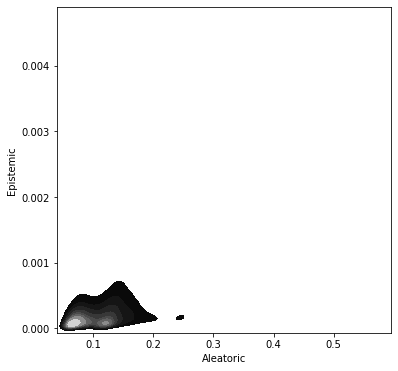

In [39]:
from utils.metrics import plot_UQ_density
# prepare data
# uncertainty from original, GC, ECOD of one expriments.
for root,dirs,files in os.walk (dicavgnpy):  #(dicplotsnpy):   #  
    for each in files:
        #wholepath=dicplotsnpy+each
        wholepath=dicavgnpy+each
        if wholepath.endswith('.csv') and 'checkpoint' not in each:        
            #if !each.contains('+') and each.split('-')[1]=='unsw':
            #if '+' not in each and  'unsw' in each: 
            #if each=='cic-MCD-input-best-1+best+uncer+mean.csv':  # 
            if each=='cic-MCD-vae-best-1+best+uncer+mean.csv':
                print(each)
                pd_reader=pd.read_csv(wholepath,header=0 ,index_col=0)
                #for ind in range(1,len(attack_types)):
                #keyname=attack_types[1]+'_orig'+'_total'
                alea=pd_reader[attack_types[1]+'_'+'_alea'].dropna() *4 #.to_numpy()+0.2)
                
                epis=pd_reader[attack_types[1]+'_'+'_epis'].dropna()  *4 #.to_numpy()+0.2)    
                #epis=np.sqrt(epis)
                plot_UQ_density(alea,epis, 60)  
    break

In [16]:
print(dicavgnpy)

../../venv/MyBayesian/averageingfiles-cic/


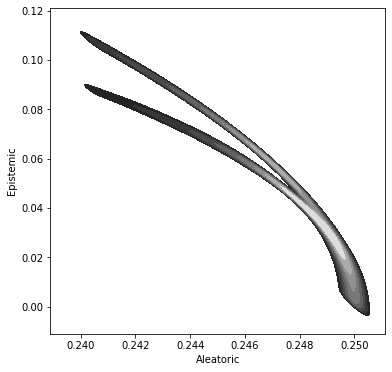

In [52]:
threshold = np.percentile(alea, 80)
epis=np.absolute(epis)
alea_index = (alea > threshold)#
if len(alea_index[alea_index])>0:
    if np.min(epis[alea_index])==np.max(epis[alea_index]) or np.min(alea[alea_index])==np.max(alea[alea_index]) or np.min(epis[alea_index]+alea[alea_index]) == np.max(epis[alea_index]+alea[alea_index]):
        print(f'There is only one same value in epis[alea_index].')
    else:
        pyplot.figure(figsize=(6,6))
        try:
            #data = np.vstack([list_alea[alea_index], list_epis[alea_index]]).T   data, 
            ax = sns.kdeplot(x=alea[alea_index],y=epis[alea_index], shade = True, cmap = "gray", cbar=False,common_norm=False)
            ax.patch.set_facecolor('white')
            ax.collections[0].set_alpha(0)
            ax.set_xlabel('Aleatoric', fontsize = 10)
            ax.set_ylabel('Epistemic', fontsize = 10)
            #ax.set_xlim(np.min(alea[alea_index])-0.05, np.max(alea[alea_index])+0.05)  
            #ax.set_ylim(np.min(epis[alea_index])-0.05, np.max(epis[alea_index])+0.05)  
            #pyplot.savefig('./fig/epis_vs_alea.pdf')
        except Exception as e:
            print(e)
            pyplot.hist(alea[alea_index])
            pyplot.hist(epis[alea_index])

        pyplot.show()
else:
    print(f'size of alearotic equals 0 when threshold={thres}')

In [ ]:
plotviolin3(orig_t, orig_a, orig_e)
plotviolin3(GC_t,GC_a,GC_e)
plotviolin3(ECOD_t,ECOD_a,ECOD_e)

plotbox3(orig_t,orig_a,orig_e)
plotbox3(GC_t,GC_a,GC_e)
plotbox3(ECOD_t,ECOD_a,ECOD_e)

### density plot multiple

BDLcic2017-44-dropout-last-seed1-mae-mae+alluncer.csv
zoom out : 6.0
G1 hist of FTP-Patator
aleatoric mean:  0.0820430744692309
epistemic mean:  0.003237146402520655


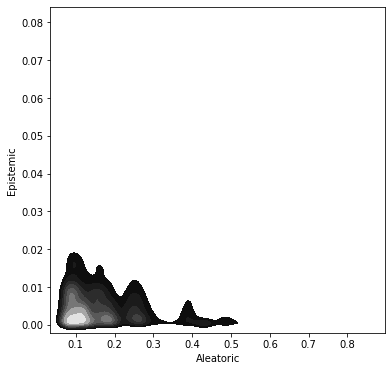

zoom out : 2.0
Triang hist of FTP-Patator
aleatoric mean:  0.06976217522949876
epistemic mean:  0.030135761487960794


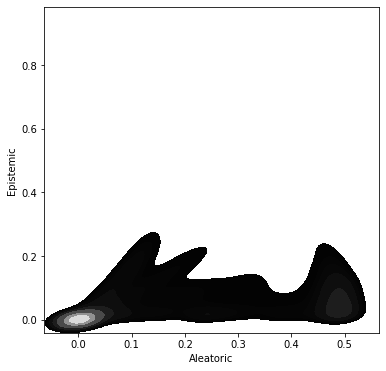

zoom out : 2.0
G2 hist of FTP-Patator
aleatoric mean:  0.09660302326991155
epistemic mean:  0.019889856481302176


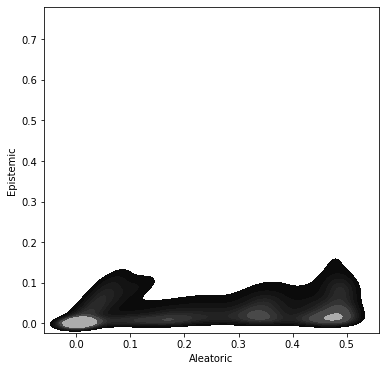

In [4]:
#from utils.metrics import * # not work
from utils.metrics import plot_UQ_density
''' 
prepare data
# uncertainty from GC, ECOD... all distributions of one expriments.
only plot the first attack type's distribution's dentist of a exist .csv uncertainty file.
none '.npy' for CIC-2017-IDS, e.g.'FTP-Patator_G1_alea'
 '.npy' for UNSW, e.g. 'Shellcode.npy_G1_alea'
'''
t_alea=[]
t_epis=[]
for root,dirs,files in os.walk(dicplotsnpy): # (dicavgnpy):
    for each in files:
        # wholepath=dicavgnpy+each
        wholepath=dicplotsnpy+each
        if wholepath.endswith('.csv') and 'checkpoint' not in each:        
            #if !each.contains('+') and each.split('-')[1]=='unsw':
            #if '+' not in each and  'unsw' in each: 
            
            if each=='BDLcic2017-44-dropout-last-seed1-mae-mae+alluncer.csv':# in plots  
                print(each)
                pd_reader=pd.read_csv(wholepath,header=0 ,index_col=0)
                # #keyname=attack_types[1]+'_orig'+'_total'
                # alea=pd_reader[attack_types[1]+'_orig'+'_alea'].dropna() +0.02)
                # epis=pd_reader[attack_types[1]+'_orig'+'_epis'].dropna()   #.to_numpy()+0.2)                
                # plot_UQ_density(alea,epis, 80)  

                 #### G1 DENTIST
                
                alea=[]
                epis=[]
                alea=pd_reader[attack_types[1]+'_G1'+'_alea'].dropna()  # +0.02                
                epis=np.sqrt(pd_reader[attack_types[1]+'_G1'+'_epis'].dropna())  # +0.02 
                z_a=1/np.max(alea)
                z_e=1/np.max(epis)
                alea=alea*np.floor(np.min([z_a,z_e]))
                epis=epis*np.floor(np.min([z_a,z_e]))
                print('zoom out : '+str(np.floor(np.min([z_a,z_e]))))
                
                t_alea=alea
                t_epis=epis
                try:
                    print("G1 hist of "+attack_types[1])
                    plot_UQ_density(alea,epis, 60)                
                except:
                    print("has a hist of test_recon "+attack_types[1])
                '''
                ### Gamma DENTIST
                alea=[]
                epis=[]
                alea=pd_reader[attack_types[1]+'.npy_Gamma'+'_alea'].dropna() +0.02
                epis=pd_reader[attack_types[1]+'.npy_Gamma'+'_epis'].dropna()  +0.02
                try:
                    print("Gamma hist of "+attack_types[1])
                    plot_UQ_density(alea,epis, 99)                
                except:
                    print("has a hist of test_recon "+attack_types[1])
                    
                 #### Poisson DENTIST
                alea=[]
                epis=[]
                alea=pd_reader[attack_types[1]+'.npy_Poisson'+'_alea'].dropna()  #.to_numpy()+0.2)
                epis=pd_reader[attack_types[1]+'.npy_Poisson'+'_epis'].dropna()   #.to_numpy()+0.2) 
                try:
                    print("Poisson hist of "+attack_types[1])
                    plot_UQ_density(alea,epis, 99)                 
                except:
                    print("has a hist of test_recon "+attack_types[1])

                 #### Uniform DENTIST
                alea=[]
                epis=[]
                alea=pd_reader[attack_types[1]+'.npy_Uniform'+'_alea'].dropna()  #.to_numpy()+0.2)
                epis=pd_reader[attack_types[1]+'.npy_Uniform'+'_epis'].dropna()   #.to_numpy()+0.2) 
                try:
                    print("Uniform hist of "+attack_types[1])
                    plot_UQ_density(alea,epis, 99)               
                except:
                    print("has a hist of test_recon "+attack_types[1])
                '''
                 #### Triang DENTIST
                alea=[]
                epis=[]
                alea=pd_reader[attack_types[1]+'_Triang'+'_alea'].dropna()  #.to_numpy()+0.2)
                epis=np.sqrt(pd_reader[attack_types[1]+'_Triang'+'_epis'].dropna()  ) #.to_numpy()+0.2) 
                z_a=1/np.max(alea)
                z_e=1/np.max(epis)
                alea=alea*np.floor(np.min([z_a,z_e]))
                epis=epis*np.floor(np.min([z_a,z_e]))
                print('zoom out : '+str(np.floor(np.min([z_a,z_e]))))
                try:
                    print("Triang hist of "+attack_types[1])
                    plot_UQ_density(alea,epis, 60)               
                except:
                    print("has a hist of test_recon "+attack_types[1])
                '''    
        #### students' T DENTIST
                alea=[]
                epis=[]
                alea=pd_reader[attack_types[1]+'.npy_T'+'_alea'].dropna()  #.to_numpy()+0.2)
                epis=pd_reader[attack_types[1]+'.npy_T'+'_epis'].dropna()   #.to_numpy()+0.2) 
                try:
                    print("T hist of "+attack_types[1])
                    plot_UQ_density(alea,epis, 80)                 
                except:
                    print("has a hist of test_recon "+attack_types[1])
                '''
                #### GC DENTIST
                alea=[]
                epis=[]
                alea=pd_reader[attack_types[1]+'_G2'+'_alea'].dropna()  #.to_numpy()+0.2)
                epis=np.sqrt( pd_reader[attack_types[1]+'_G2'+'_epis'].dropna() )  #.to_numpy()+0.2) 
                z_a=1/np.max(alea)
                z_e=1/np.max(epis)
                alea=alea*np.floor(np.min([z_a,z_e]))
                epis=epis*np.floor(np.min([z_a,z_e]))
                print('zoom out : '+str(np.floor(np.min([z_a,z_e]))))
                try:
                    print("G2 hist of "+attack_types[1])
                    plot_UQ_density(alea,epis, 60) #90)                
                except:
                    print("has a hist of test_recon "+attack_types[1])
                '''
                ###########ECOD dentist    
                alea=[]
                epis=[]
                alea=pd_reader[attack_types[1]+'.npy_ECOD'+'_alea'].dropna()  #.to_numpy()+0.2)
                epis=pd_reader[attack_types[1]+'.npy_ECOD'+'_epis'].dropna()   #.to_numpy()+0.2) 
                try:
                    print("ECOD hist of "+attack_types[1])
                    plot_UQ_density(alea,epis, 80) #90)                
                except:
                    print("has a hist of test_recon "+attack_types[1])
                '''


    break

### unsw

a
zoom out : 4.0
aleatoric mean:  0.0836803257653028
epistemic mean:  0.12190180274648105


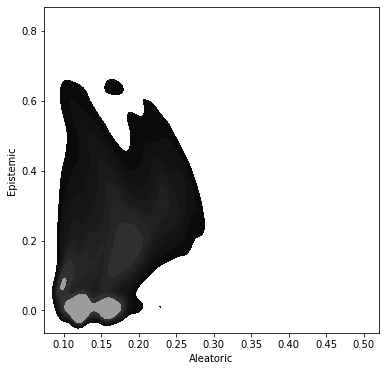

In [17]:
# prepare data
# uncertainty from original, GC, ECOD of one expriments.
from utils.metrics import plot_UQ_density
# GC_t=[]
# GC_a=[]
# GC_e=[]
# orig_t, orig_a, orig_e=[],[],[]
# ECOD_t, ECOD_a, ECOD_e=[],[],[]
for root,dirs,files in os.walk(dicavgnpy):#
    for each in files:
        #wholepath=dicavgnpy+each
        wholepath=dicavgnpy+each
        if wholepath.endswith('.csv') and 'checkpoint' not in each:        
            #if !each.contains('+') and each.split('-')[1]=='unsw':
            #if '+' not in each and  'unsw' in each: 
            #if each=='unsw-MCD-latent-best-1+uncer+mean.csv':   #'alluncertainty-unsw-drop-last.csv':
            if each=='cic-MCD-input-best-1+best+uncer+mean.csv':
                print('a')
                pd_reader=pd.read_csv(wholepath,header=0 ,index_col=0)
                #for ind in range(1,len(attack_types)):
                #keyname=attack_types[1]+'.npy_orig'+'_total'
                #orig_t.append(pd_reader[keyname].dropna())
                # orig_a.append(pd_reader[attack_types[1]+'.npy_'+'_alea'].dropna()+0.02)
                # orig_e.append(pd_reader[attack_types[1]+'.npy_'+'_epis'].dropna()+0.02)                
                # plot_UQ_density(orig_a,orig_e, 80)  
                # alea=pd_reader[attack_types[1]+'.npy_'+'_alea'].dropna()
                # epis= pd_reader[attack_types[1]+'.npy_'+'_epis'].dropna() # np.sqrt(  )
                
                alea=pd_reader[attack_types[1]+'_'+'_alea'].dropna()
                epis=np.sqrt(  pd_reader[attack_types[1]+'_'+'_epis'].dropna()  )
                #alea=float(alea)
                z_a=1/np.max(alea)
                z_e=1/np.max(epis)
                alea=alea*4 #np.floor(np.min([z_a,z_e]))
                epis=epis*4 #np.floor(np.min([z_a,z_e]))
                print('zoom out : '+str(np.floor(np.min([z_a,z_e]))))
                      
                plot_UQ_density(alea,epis, 60)  
#                     GC_t.append(pd_reader[attack_types[ind]+'.npy_GC'+'_total'].dropna())
#                     GC_a.append(pd_reader[attack_types[ind]+'.npy_GC'+'_alea'].dropna())
#                     GC_e.append(pd_reader[attack_types[ind]+'.npy_GC'+'_epis'].dropna())
#                     ECOD_t.append(pd_reader[attack_types[ind]+'.npy_ECOD'+'_total'].dropna())
#                     ECOD_a.append(pd_reader[attack_types[ind]+'.npy_ECOD'+'_alea'].dropna())
#                     ECOD_e.append(pd_reader[attack_types[ind]+'.npy_ECOD'+'_epis'].dropna())
                    
                    
#print(aa.keys())

In [7]:
print(attack_types[1])

FTP-Patator


# campare 3 alea types

In [40]:
def get3uncer(csvpath, csvname,datasetname='unsw'):
    # prepare data; csvname inclduding postfix,like .npy
    # dist1,dist2,dist3 means 3 UQ distribution on anomaly score. like orig,GC,ECOD.  or like G!,G2,Triang
    dist1name='G1'
    dist2name='G2'
    dist3name='Triang'
    dist1_t=[]
    dist1_a=[]
    dist1_e=[]
    dist2_t, dist2_a, dist2_e=[],[],[]
    dist3_t, dist3_a, dist3_e=[],[],[]
    for root,dirs,files in os.walk(csvpath):
        for each in files:
            #if (csvpath+each).endswith('.csv') and 'checkpoint' not in each:     
            if each==csvname:
                pd_reader=pd.read_csv(csvpath+each,header=0 ,index_col=0, engine="python")
                for ind in range(1,len(attack_types)):
                    if datasetname=='unsw':
                        #keyname=attack_types[ind]+'.npy_'+dist2name+'_total'
                        #orig_t.append(np.absolute(pd_reader[keyname].dropna()))
                        #orig_a.append(np.absolute( pd_reader[attack_types[ind]+'.npy_orig'+'_alea'].dropna().to_numpy()))
                        #orig_e.append(np.absolute(  pd_reader[attack_types[ind]+'.npy_orig'+'_epis'].dropna().to_numpy()  ))
                        
                        dist1_a.append(  pd_reader[attack_types[ind]+'.npy_'+dist1name+'_alea'].dropna().to_numpy() )
                        dist1_e.append( pd_reader[attack_types[ind]+'.npy_'+dist1name+'_epis'].dropna().to_numpy() )                        
                        dist1_t.append( dist1_e[-1]+dist1_a[-1] )
                        #dist2_t.append(pd_reader[keyname].dropna()+0.2)
                        dist2_a.append(pd_reader[attack_types[ind]+'.npy_'+dist2name+'_alea'].dropna().to_numpy()+0.2)
                        dist2_e.append(  pd_reader[attack_types[ind]+'.npy_'+dist2name+'_epis'].dropna().to_numpy() +0.2 )
                        dist2_t.append(dist2_e[-1]+dist2_a[-1])
                        #dist3_t.append( pd_reader[attack_types[ind]+'.npy_'+dist3name+'_total'].dropna().to_numpy())
                        dist3_a.append(  pd_reader[attack_types[ind]+'.npy_'+dist3name+'_alea'].dropna().to_numpy() )
                        dist3_e.append( pd_reader[attack_types[ind]+'.npy_'+dist3name+'_epis'].dropna().to_numpy()  )
                        dist3_t.append(dist3_a[-1]+dist3_e[-1])
                    elif datasetname=='cic2017':                        
                        #keyname=attack_types[ind]+'_'+dist2name+'_total')
                        #dist1_t.append(  pd_reader[attack_types[ind]+'_'+dist1name+'_total'].dropna().to_numpy() )
                        dist1_a.append(  pd_reader[attack_types[ind]+'_'+dist1name+'_alea'].dropna().to_numpy() )
                        dist1_e.append( pd_reader[attack_types[ind]+'_'+dist1name+'_epis'].dropna().to_numpy() )
                        #dist2_t.append(pd_reader[keyname].dropna())
                        dist2_a.append( pd_reader[attack_types[ind]+'_'+dist2name+'_alea'].dropna().to_numpy())
                        dist2_e.append(  pd_reader[attack_types[ind]+'_'+dist2name+'_epis'].dropna().to_numpy()  )
                        #dist3_t.append( pd_reader[attack_types[ind]+'_'+dist3name+'_total'].dropna().to_numpy())
                        dist3_a.append(  pd_reader[attack_types[ind]+'_'+dist3name+'_alea'].dropna().to_numpy() )
                        dist3_e.append( pd_reader[attack_types[ind]+'_'+dist3name+'_epis'].dropna().to_numpy()  )
                        
    return dist2_t,dist2_a,dist2_e,dist1_t,dist1_a,dist1_e,dist3_t, dist3_a, dist3_e
                    

In [45]:
# UNSW: dropout
'''
# 1
MCD


VI:
'''
inidata=get3uncer(dicavgnpy,'unsw-VI-input-1+uncer+mean.csv')  
last=get3uncer(dicavgnpy, 'unsw-VI-last-1+uncer+mean.csv')  
latent=get3uncer(dicavgnpy,'unsw-VI-latent-1+uncer+mean.csv')
vae=get3uncer(dicavgnpy,'unsw-VI-vae-1+uncer+mean.csv')
#plotbox4inOne(inidata[0],inidata[1],inidata[2],last[0],last[1],last[2],latent[0],latent[1],latent[2],vae[0],vae[1],vae[2])



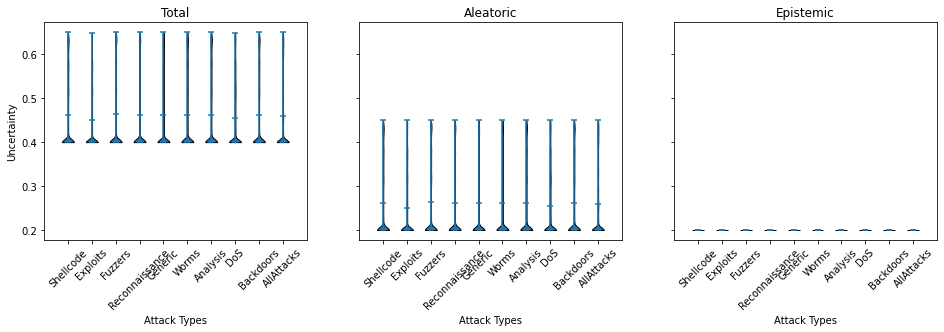

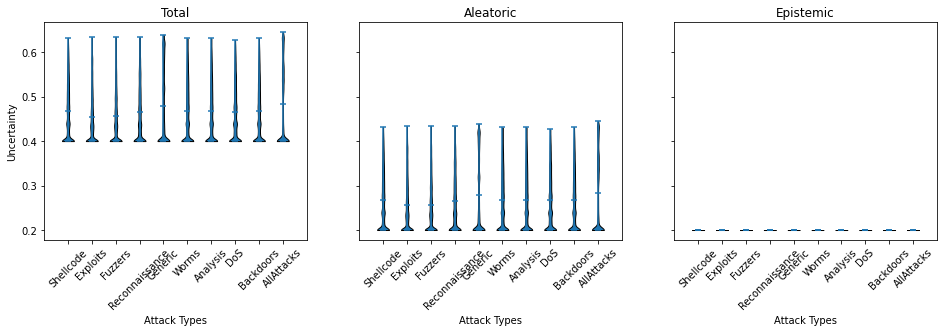

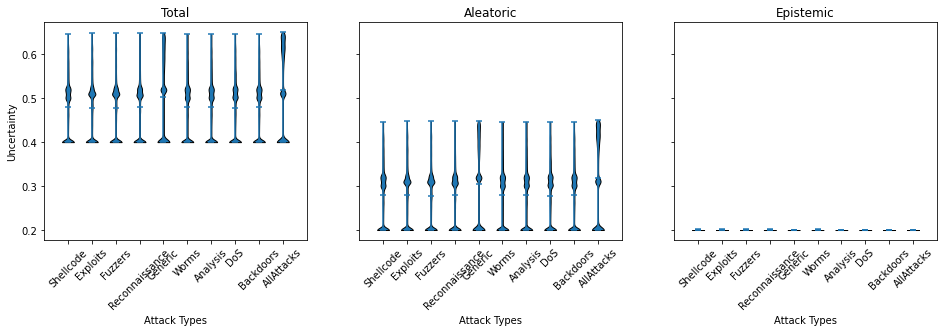

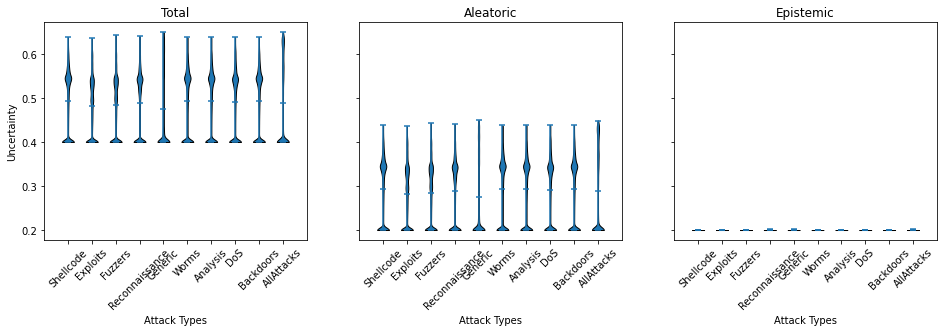

'\nplotviolin3(inidata[6],inidata[7],inidata[8])\nplotviolin3(last[6],last[7],last[8])\nplotviolin3(latent[6],latent[7],latent[8])\nplotviolin3(vae1[6],vae1[7],vae1[8])\n'

In [46]:

plotviolin3(inidata[0],inidata[1],inidata[2])
plotviolin3(last[0],last[1],last[2])
plotviolin3(latent[0],latent[1],latent[2])
plotviolin3(vae[0],vae[1],vae[2])

'''
plotviolin3(inidata[6],inidata[7],inidata[8])
plotviolin3(last[6],last[7],last[8])
plotviolin3(latent[6],latent[7],latent[8])
plotviolin3(vae1[6],vae1[7],vae1[8])
'''
    

In [ ]:
# CIC2017: dropout
'''
# 3
inidata=get3uncer(dicplotsnpy,'BAEcic2017-drop-input-bce+alluncer.csv',datasetname='cic2017')  
last=get3uncer(dicplotsnpy, 'BAEcic2017-drop-last-bce+alluncer.csv',datasetname='cic2017')  
latent=get3uncer(dicplotsnpy,'BAEcic2017-drop-latent-mae+alluncer.csv',datasetname='cic2017')
vae=get3uncer(dicplotsnpy,'BAEcic2017-drop-vae-bce+alluncer.csv',datasetname='cic2017')
'''


In [ ]:
# CIC2017: vi
'''
# 3
inidata=get3uncer(dicplotsnpy,'BAEcic2017-vi-input-mae+alluncer.csv',datasetname='cic2017') 
last=get3uncer(dicplotsnpy, 'BAEcic2017-vi-last-bce+alluncer.csv',datasetname='cic2017')  
latent=get3uncer(dicplotsnpy,'BAEcic2017-vi-latent-mae+alluncer.csv',datasetname='cic2017')
vae=get3uncer(dicplotsnpy,'BAEcic2017-vi-vae-bce+alluncer.csv',datasetname='cic2017')


In [ ]:
#plotviolin3inOne(last[3],last[4],last[5],latent[3],latent[4],latent[5],vae[3],vae[4],vae[5])
#plotviolin3inOne(last[6],last[7],last[8],latent[6],latent[7],latent[8],vae[6],vae[7],vae[8])

plotviolin3(inidata[0],inidata[1],inidata[2])
plotviolin3(last[0],last[1],last[2])
plotviolin3(latent[0],latent[1],latent[2])
plotviolin3(vae[0],vae[1],vae[2])

In [5]:
def get3uncer(csvpath, csvname,datasetname='unsw'):
    # prepare data; csvname inclduding postfix,like .npy
    GC_t=[]
    GC_a=[]
    GC_e=[]
    orig_t, orig_a, orig_e=[],[],[]
    ECOD_t, ECOD_a, ECOD_e=[],[],[]
    Gamma_t,Gamma_a,Gamma_e=[],[],[]
    for root,dirs,files in os.walk(csvpath):
        for each in files:
            #if (csvpath+each).endswith('.csv') and 'checkpoint' not in each:     
            if each==csvname:
                pd_reader=pd.read_csv(csvpath+each,header=0 ,index_col=0, engine="python")
                for ind in range(1,2):  # len(attack_types)):
                    if datasetname=='unsw':
                        keyname=attack_types[ind]+'.npy_orig'+'_total'
                        
                        #Gamma_t.append(  pd_reader[attack_types[ind]+'.npy_Gamma'+'_total'].dropna().to_numpy() )
                        #Gamma_a.append(  pd_reader[attack_types[ind]+'.npy_Gamma'+'_alea'].dropna().to_numpy() )
                        #Gamma_e.append( pd_reader[attack_types[ind]+'.npy_Gamma'+'_epis'].dropna().to_numpy() )
                        
                        orig_t.append(pd_reader[keyname].dropna())
                        orig_a.append( pd_reader[attack_types[ind]+'.npy_orig'+'_alea'].dropna().to_numpy())
                        orig_e.append(  pd_reader[attack_types[ind]+'.npy_orig'+'_epis'].dropna().to_numpy()  )
                        GC_t.append(  pd_reader[attack_types[ind]+'.npy_GC'+'_total'].dropna().to_numpy() )
                        GC_a.append(  pd_reader[attack_types[ind]+'.npy_GC'+'_alea'].dropna().to_numpy() )
                        GC_e.append( pd_reader[attack_types[ind]+'.npy_GC'+'_epis'].dropna().to_numpy() )
                        ECOD_t.append( pd_reader[attack_types[ind]+'.npy_ECOD'+'_total'].dropna().to_numpy())
                        ECOD_a.append(  pd_reader[attack_types[ind]+'.npy_ECOD'+'_alea'].dropna().to_numpy() )
                        ECOD_e.append( pd_reader[attack_types[ind]+'.npy_ECOD'+'_epis'].dropna().to_numpy()  )
                        
                    elif datasetname=='cic2017':                        
                        keyname=attack_types[ind]+'_orig'+'_total'
                        orig_t.append(pd_reader[keyname].dropna())
                        orig_a.append( pd_reader[attack_types[ind]+'_orig'+'_alea'].dropna().to_numpy())
                        orig_e.append(  pd_reader[attack_types[ind]+'_orig'+'_epis'].dropna().to_numpy()  )
                        GC_t.append(  pd_reader[attack_types[ind]+'_GC'+'_total'].dropna().to_numpy() )
                        GC_a.append(  pd_reader[attack_types[ind]+'_GC'+'_alea'].dropna().to_numpy() )
                        GC_e.append( pd_reader[attack_types[ind]+'_GC'+'_epis'].dropna().to_numpy() )
                        ECOD_t.append( pd_reader[attack_types[ind]+'_ECOD'+'_total'].dropna().to_numpy())
                        ECOD_a.append(  pd_reader[attack_types[ind]+'_ECOD'+'_alea'].dropna().to_numpy() )
                        ECOD_e.append( pd_reader[attack_types[ind]+'_ECOD'+'_epis'].dropna().to_numpy()  )
                        
    return orig_t,orig_a,orig_e,GC_t,GC_a,GC_e,ECOD_t, ECOD_a, ECOD_e
    #return Gamma_t, Gamma_a, Gamma_e
                    

In [ ]:

#from utils.metrics import *
# have not save uncertainty of Gamma
uncerdata=get3uncer(dicplotsnpy,'BAEunsw2-vi-vae-mvn-bce+alluncer-noscale.csv',datasetname='unsw') 
plot_UQ_density(uncerdata[1][0],uncerdata[2][0], 90)                


# plot metric of each type

## UNSW - vi-vae

In [ ]:
#savename=
#pd_metrics=pd.read_csv(dicavgnpy+'unsw-VI-vae-best-1+best+metrics+mean.csv' ) 
#pd_metrics=pd.read_csv(dicavgnpy+'unsw-VI-vae-2+metrics+mean.csv' ) 
#pd_metrics=pd.read_csv(dicplotsnpy+'BDLunsw-44-drop-vae-dTril-norm-mae-mae+allmetrics.csv')
#print(pd_reader.head())
pd_G2,pd_Triang,pd_G1=pd_metrics,pd_metrics,pd_metrics

modelname='UNSW-VI-vae'
for each in range(1,len( attack_types)):
    fig, (ax1, ax2, ax3) = pyplot.subplots(1,3,figsize=(10,2.5),sharey=True) 
    #fig.suptitle(attack_types[each] ,x=-0.05,y=0.5) 
    #for i in range(0,len(pd_reader)):
    
#############################################    plot G1    
    i=1
    while i<len(pd_G1):
        #flag=False        
        if '+' in pd_G1.iloc[i,0] and pd_G1.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each]:
            if 'G1'==pd_G1.iloc[i,0].split('+')[0]:   
            #if np.nan!=pd_G1.iloc[i,0].split('+')[0]: 
                #legendd=pd_G1.iloc[i,0].split('+')[0]
                legendd='Gaussian'
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_G1.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_G1.iloc[i+15,1:].astype(np.float16)

                plot_title=pd_G1.iloc[i+2,0]            
                y_values=pd_G1.iloc[i+3,1:].astype(np.float16)
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                        '''
                # ACCU
                y_values2=pd_G1.iloc[i+9,1:].astype(np.float16) 
                ax1.plot(xx, y_values2) # , 'tab:green')              
                ax1.fill_between(xx,y_values2-np.absolute(y_uncer)/2,y_values2+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                ax1.set(ylabel='Percent')     
                # AUC
                ax2.plot(xx,y_values,label=legendd)                
                ax2.fill_between(xx,y_values-np.absolute(y_uncer)/2,y_values+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                                            
                # FPR
                ax3.plot(xx, pd_G1.iloc[i+7,1:].astype(np.float16) ) #, 'tab:orange')          
                                
                i=i+18*3 
                flag=True
            # else:
            #     i=i+1
        if not flag:
            i=i+1   
    ########################### plot G2
    i=1
    while i<len(pd_G2):
        flag=False       
        if '+' in pd_G2.iloc[i,0] and pd_G2.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each]:
            #print(pd_GC.iloc[i,0].split('+')[0]=='GaussianCustom')
            #print(pd_GC.iloc[i,0].split('+')[0]=='Gamma')
            if pd_G2.iloc[i,0].split('+')[0]=='G2' :     # or pd_G2.iloc[i,0].split('+')[0]=='G2'   
                legendd= 'CustomGaussian'  # pd_G2.iloc[i,0].split('+')[0]
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_G2.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_G2.iloc[i+15,1:].astype(np.float16)

                plot_title=  pd_G2.iloc[i+2,0]            
                y_values=pd_G2.iloc[i+3,1:].astype(np.float16)
                '''
                # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                '''
                # ACCU
                y_values2=pd_G2.iloc[i+9,1:].astype(np.float16) 
                ax1.plot(xx, y_values2) # , 'tab:green')              
                ax1.fill_between(xx,y_values2-np.absolute(y_uncer)/2,y_values2+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                ax1.set(ylabel='Percent')     
                # AUC
                ax2.plot(xx,y_values,label=legendd)                
                ax2.fill_between(xx,y_values-np.absolute(y_uncer)/2,y_values+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                                            
                # FPR
                ax3.plot(xx, pd_G2.iloc[i+7,1:].astype(np.float16) ) #, 'tab:orange')          
                
                # Macro F1
                ##ax4.plot(xx, pd_reader.iloc[i+11,1:].astype(np.float16) ) # , 'tab:red') 
                #ax4.plot(xx, pd_reader.iloc[i+5,1:].astype(np.float16) ) # , 'tab:red')   # accu2 follow AUC            
                
                if each==1:
                    ax2.set_title(plot_title)
                    ax1.set_title(pd_G1.iloc[i+8,0]) 
                    ax3.set_title(pd_G1.iloc[i+6,0])
                    #ax4.set_title(pd_reader.iloc[i+4,0])   # [i+10,0]) # macro F1 
                if each==len(attack_types)-1:
                    ax1.set(xlabel='Rejection')
                    ax2.set(xlabel='Rejection')
                    ax3.set(xlabel='Rejection')
                    #ax4.set(xlabel='Rejection')
                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1   
################################################ plot Triang
    i=1
    while i<len(pd_Triang):
        flag=False        
        if '+' in pd_Triang.iloc[i,0] and pd_Triang.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each]:
            if 'Triang'==pd_Triang.iloc[i,0].split('+')[0]:   
                legendd='Triang'
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_Triang.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                
#                 ############ search for uncertainty
#                 j=1
#                 while j<len(pd_Triang):
#                     if '+' in pd_Triang.iloc[j,0] and pd_Triang.iloc[j,0].split('+')[1].split('.')[0]==attack_types[each]:
#                         if 'G2'==pd_Triang.iloc[j,0].split('+')[0]:   
#                             y_uncer=pd_Triang.iloc[j+15,1:].astype(np.float16)
#                             break
#                     j=j+1
                    
                y_uncer=pd_Triang.iloc[i+15,1:].astype(np.float16)
                
                #plot_title=pd_ECOD.iloc[i+2,0]            
                y_values=pd_Triang.iloc[i+3,1:].astype(np.float16)
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                        '''
                # ACCU
                y_values2=pd_Triang.iloc[i+9,1:].astype(np.float16)
                ax1.plot(xx, y_values2 ) # , 'tab:green')              
                ax1.fill_between(xx,y_values2-np.absolute(y_uncer),y_values2+np.absolute(y_uncer),alpha=0.3,facecolor='grey')
                ax1.set(ylabel='Percent')     
                # AUC
                ax2.plot(xx,y_values,label=legendd)                
                #ax2.fill_between(xx,y_values-np.absolute(y_uncer),y_values+np.absolute(y_uncer),alpha=0.3,facecolor='grey')
                                            
                # FPR
                ax3.plot(xx, pd_Triang.iloc[i+7,1:].astype(np.float16) ) #, 'tab:orange')          
                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1 
###################################################
    
    handles, labels = ax2.get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1.15,0.4))
           
    for ax in fig.get_axes():
        ax.label_outer()
        ax.set_xlim(0,50)
        ax.set_ylim(0,1)
    
    #nowtime=datetime.datetime.now()
    #nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)    
    pyplot.savefig(dicavgnpy+'plots/'+modelname+"-allmetrics.png")
    
    pyplot.show()
   
                      
         

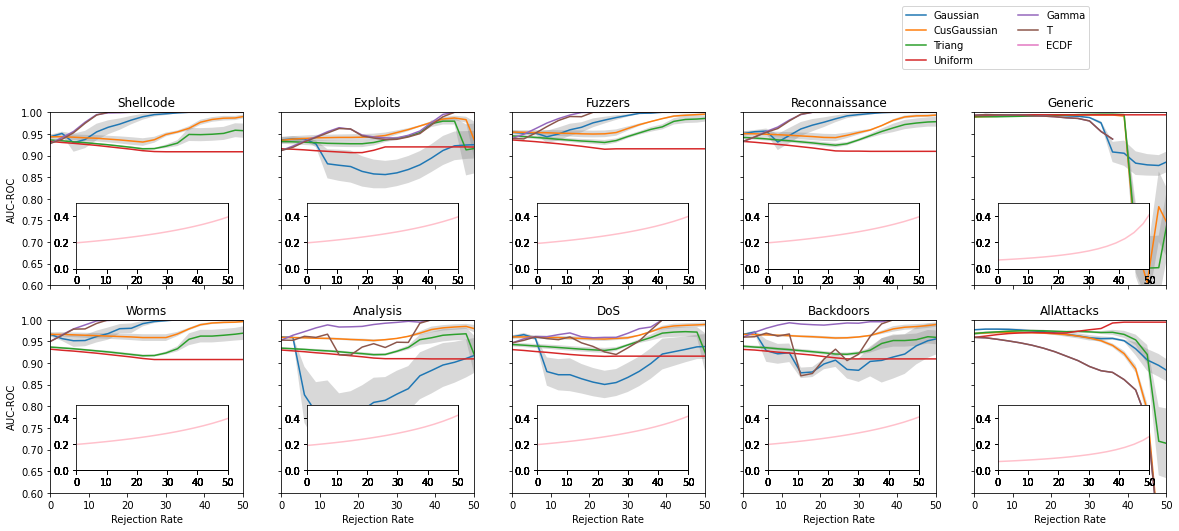

In [94]:
# plot comparision in all different dists of each type

savename_mean='unsw-VI-vae-1+metrics+mean.csv' 
# savename_mean='unsw-MCD-vae-best-1+metrics+mean.csv' 
pd_G1=pd.read_csv(dicavgnpy+savename_mean) 
savename_std=savename_mean.split('mean')[0]+'std.csv'
pd_G1_std=pd.read_csv(dicavgnpy+savename_std)


fig, axes= pyplot.subplots(2, 5,figsize=(20,7),sharex=True,sharey=True) 
#fig.suptitle('Comparisons of ' ) 
#diccsv='csvsUNSW/'
for indtype in range(1,len( attack_types)): 
    axes[(indtype-1)//5,(indtype-1)%5].set_title(attack_types[indtype] )  #    
    
        
    #############################################    plot all dist   
    i=1
    while i<len(pd_G1):
        # flag=False        
        if '+' in pd_G1.iloc[i,0] and pd_G1.iloc[i,0].split('+')[1].split('.')[0]==attack_types[indtype]:            
            for eachdist in distribution_types:
                if eachdist=='ECOD':
                    break
                if eachdist==pd_G1.iloc[i,0].split('+')[0]:   
                    legendd=eachdist
                    if legendd=='G2':
                        legendd='CusGaussian'
                    elif legendd=='G1':
                        legendd='Gaussian'
                        
                    #fig_title=pd_reader.iloc[i,0]
                    try:
                        xx=pd_G1.iloc[i+2,1:].astype(int)
                    except:
                        print(i)
                    y_uncer=pd_G1_std.iloc[i+3,1:].astype(np.float16)   /3

                    #plot_title=pd_G1.iloc[i+2,0]            
                    y_values=pd_G1.iloc[i+3,1:].astype(np.float16)  # AUC
                    # ACCU
                    #y_values=pd_G1.iloc[i+9,1:].astype(np.float16)
                    # fpr
                    #y_values=pd_G1.iloc[i+7,1:].astype(np.float16)
                    
                    
                    xxx=xx
                    yyy=y_values
                    yyy_uncer=y_uncer
                    # for remove zero values                        
                    for ind in range(1,len(yyy)):
                        if yyy[ind-1]==0:
                            yyy=yyy[:ind-1] 
                            yyy_uncer=yyy_uncer[:ind-1]
                            xxx=xxx[:ind-1]
                            break

                       # for remove angles
                    for ind in range(1,len(yyy)):
                        if np.abs((yyy[ind-1]-yyy[ind]))>0.3:
                            yyy=yyy[:ind-1] 
                            yyy_uncer=yyy_uncer[:ind-1]
                            xxx=xxx[:ind-1]
                            break
                    
                    
                    axes[(indtype-1)//5,(indtype-1)%5].plot(xxx,yyy,label=legendd)                
                    axes[(indtype-1)//5,(indtype-1)%5].fill_between(xxx,yyy-yyy_uncer,yyy+yyy_uncer,alpha=0.3,facecolor='grey')
                   
                    axesECDF=fig.add_axes([ (indtype-1)%5 *0.16+0.143,((indtype-1)//5)*5 *0.08+0.17,   0.105,0.13])
                    axesECDF.plot(xxx,yyy,'pink')
                    axesECDF.fill_between(xxx,yyy-yyy_uncer,yyy+yyy_uncer,alpha=0.3,facecolor='grey')
                    axesECDF.set_xlim(0,50)
                    axesECDF.set_ylim(0,0.5)
                    
                    if indtype==1 or indtype==6:
                        axes[(indtype-1)//5,(indtype-1)%5].set(ylabel='AUC-ROC')  # 'Percent')
                    if indtype>5:
                        axes[(indtype-1)//5,(indtype-1)%5].set(xlabel='Rejection Rate')
                        
                    axes[(indtype-1)//5,(indtype-1)%5].label_outer()
                    axes[(indtype-1)//5,(indtype-1)%5].set_xlim(0,50)
                    axes[(indtype-1)//5,(indtype-1)%5].set_ylim(0.6,1)
                    
                    i=i+18*3 -1
        #             flag=True
        # if not flag:
        #     i=i+1  
        i=i+1
            

                            
handles, labels = axes[0,2].get_legend_handles_labels()
# fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1,0.5))
fig.legend(handles, labels, loc="upper right" , ncol=2,bbox_to_anchor=(0.85,1.1))

# for ax in fig.get_axes():
#     ax.label_outer()
#     ax.set_xlim(0,50)
#     ax.set_ylim(0,1)

# nowtime=datetime.datetime.now()
# nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)
pyplot.savefig(dicavgnpy+'plots/'+"+unsw-allprobs.pdf")
pyplot.show()

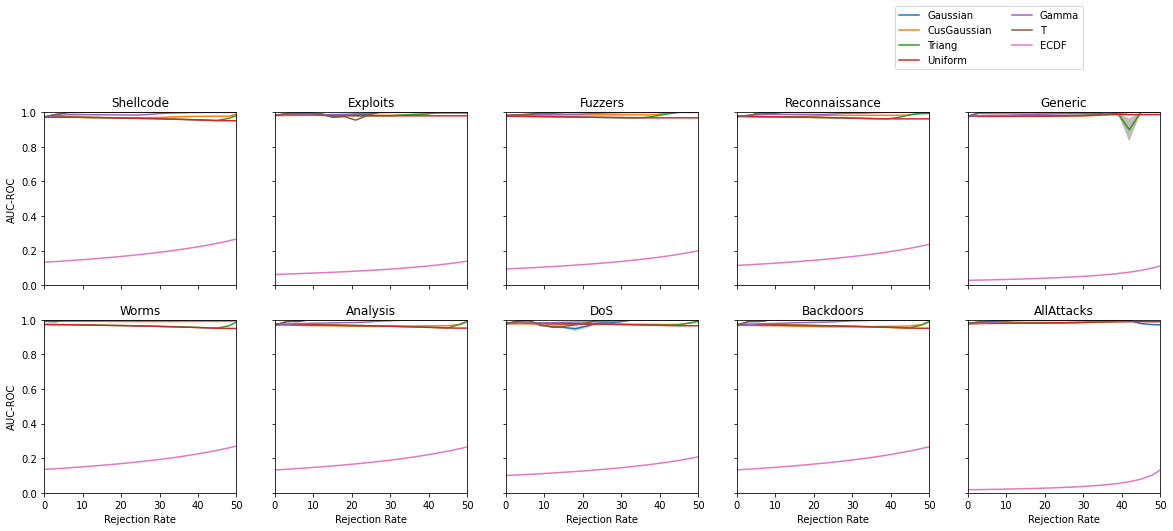

In [91]:
# plot comparision in all different dists of each type

# savename_mean='unsw-VI-vae-1+metrics+mean.csv' 
savename_mean='unsw-MCD-vae-best-1+metrics+mean.csv' 
pd_G1=pd.read_csv(dicavgnpy+savename_mean) 
savename_std=savename_mean.split('mean')[0]+'std.csv'
pd_G1_std=pd.read_csv(dicavgnpy+savename_std)


fig, axes= pyplot.subplots(2, 5,figsize=(20,7),sharex=True,sharey=True) 
#fig.suptitle('Comparisons of ' ) 
#diccsv='csvsUNSW/'
for indtype in range(1,len( attack_types)): 
    axes[(indtype-1)//5,(indtype-1)%5].set_title(attack_types[indtype] )  #    
    
        
    #############################################    plot all dist   
    i=1
    while i<len(pd_G1):
        # flag=False        
        if '+' in pd_G1.iloc[i,0] and pd_G1.iloc[i,0].split('+')[1].split('.')[0]==attack_types[indtype]:            
            for eachdist in distribution_types:
                if eachdist=='ECOD':
                    break
                if eachdist==pd_G1.iloc[i,0].split('+')[0]:   
                    legendd=eachdist
                    if legendd=='G2':
                        legendd='CusGaussian'
                    elif legendd=='G1':
                        legendd='Gaussian'
                        
                    #fig_title=pd_reader.iloc[i,0]
                    try:
                        xx=pd_G1.iloc[i+2,1:].astype(int)
                    except:
                        print(i)
                    y_uncer=pd_G1_std.iloc[i+3,1:].astype(np.float16)   /3

                    #plot_title=pd_G1.iloc[i+2,0]            
                    y_values=pd_G1.iloc[i+3,1:].astype(np.float16)  # AUC
                    # ACCU
                    #y_values=pd_G1.iloc[i+9,1:].astype(np.float16)
                    # fpr
                    #y_values=pd_G1.iloc[i+7,1:].astype(np.float16)
                    
                    
                    xxx=xx
                    yyy=y_values
                    yyy_uncer=y_uncer
                    # for remove zero values                        
                    for ind in range(1,len(yyy)):
                        if yyy[ind-1]==0:
                            yyy=yyy[:ind-1] 
                            yyy_uncer=yyy_uncer[:ind-1]
                            xxx=xxx[:ind-1]
                            break

                       # for remove angles
                    for ind in range(1,len(yyy)):
                        if np.abs((yyy[ind-1]-yyy[ind]))>0.3:
                            yyy=yyy[:ind-1] 
                            yyy_uncer=yyy_uncer[:ind-1]
                            xxx=xxx[:ind-1]
                            break
                    
                    
                    axes[(indtype-1)//5,(indtype-1)%5].plot(xxx,yyy,label=legendd)                
                    axes[(indtype-1)//5,(indtype-1)%5].fill_between(xxx,yyy-yyy_uncer,yyy+yyy_uncer,alpha=0.3,facecolor='grey')                   
                    
                    if indtype==1 or indtype==6:
                        axes[(indtype-1)//5,(indtype-1)%5].set(ylabel='AUC-ROC')  # 'Percent')
                    if indtype>5:
                        axes[(indtype-1)//5,(indtype-1)%5].set(xlabel='Rejection Rate')
                        
                    i=i+18*3 -1
        #             flag=True
        # if not flag:
        #     i=i+1  
        i=i+1
            

                            
handles, labels = axes[0,2].get_legend_handles_labels()
# fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1,0.5))
fig.legend(handles, labels, loc="upper right" , ncol=2,bbox_to_anchor=(0.85,1.1))

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlim(0,50)
    ax.set_ylim(0,1)

# nowtime=datetime.datetime.now()
# nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)
pyplot.savefig(dicavgnpy+'plots/'+"+unsw-allprobs.pdf")
pyplot.show()

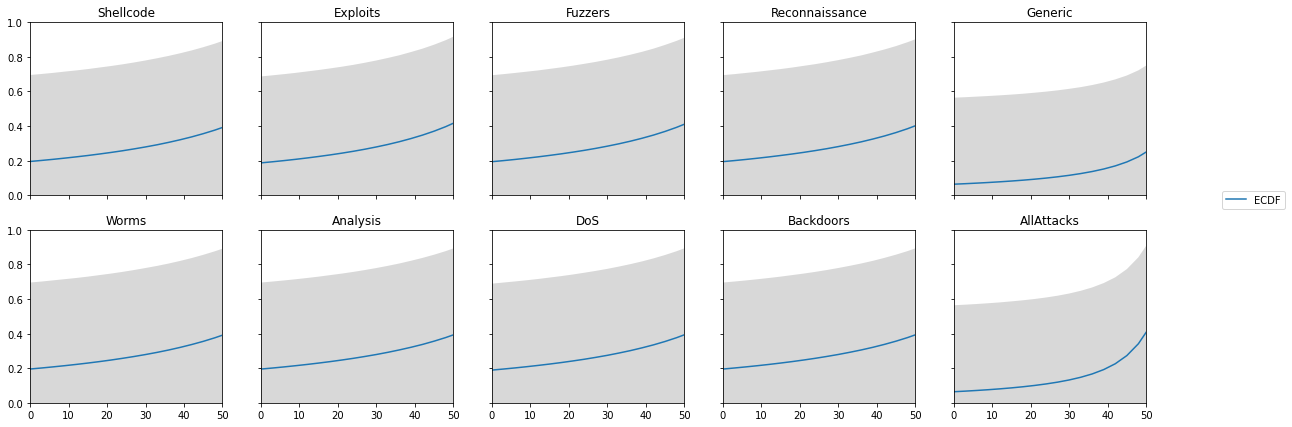

In [31]:
# plot comparision in different dist of each type
# savename_mean='BDLunsw-44-vi-vae-lamb-diag-seed3-diag-mae-mae+allmetricsSum.csv' 
# #savename_mean='unsw-MCD-vae-best-1+metrics+mean.csv' 
# pd_G1=pd.read_csv(dicplotsnpy+savename_mean) 
pd_G2,pd_Triang=pd_G1,pd_G1

fig, axes= pyplot.subplots(2, 5,figsize=(20,7),sharex=True,sharey=True) 
#fig.suptitle('Comparisons of ' ) 
#diccsv='csvsUNSW/'
for indtype in range(1,len( attack_types)): 
    axes[(indtype-1)//5,(indtype-1)%5].set_title(attack_types[indtype] )  #    
    
    #############################################    plot G1    
    i=1
    while i<len(pd_G1):
        flag=False        
        if '+' in pd_G1.iloc[i,0] and pd_G1.iloc[i,0].split('+')[1].split('.')[0]==attack_types[indtype]:
            #print(pd_G1.iloc[i,0].split('+')[0])
            if 'ECDF'==pd_G1.iloc[i,0].split('+')[0]:   
                legendd='ECDF'
            # if 'G1'==pd_G1.iloc[i,0].split('+')[0]:   
            #     legendd='Gaussian'
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_G1.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_G1.iloc[i+15,1:].astype(np.float16)

                #plot_title=pd_G1.iloc[i+2,0]            
                y_values=pd_G1.iloc[i+3,1:].astype(np.float16)  # AUC
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                        '''
                # ACCU
                #y_values=pd_G1.iloc[i+9,1:].astype(np.float16)
                # fpr
                #y_values=pd_G1.iloc[i+7,1:].astype(np.float16)
                axes[(indtype-1)//5,(indtype-1)%5].plot(xx,y_values,label=legendd)
                axes[(indtype-1)//5,(indtype-1)%5].fill_between(xx,y_values-np.absolute(y_uncer)/2,y_values+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                
                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1  
'''
    ################################################################
    i=1
    while i<len(pd_G2):
        flag=False       
        if '+' in pd_G2.iloc[i,0] and pd_G2.iloc[i,0].split('+')[1].split('.')[0]==attack_types[indtype]:
            #print(pd_GC.iloc[i,0].split('+')[0]=='GaussianCustom')
            #print(pd_GC.iloc[i,0].split('+')[0]=='Gamma')
            if pd_G2.iloc[i,0].split('+')[0]=='G2'  :     #  or pd_GC.iloc[i,0].split('+')[0]=='Gamma'
                legendd= 'CustomGaussian'  # pd_G2.iloc[i,0].split('+')[0]
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_G2.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_G2.iloc[i+15,1:].astype(np.float16)

                #plot_title=pd_GC.iloc[i+2,0]            
                y_values=pd_G2.iloc[i+3,1:].astype(np.float16)
                
                #    # for remove angles
                # for ind in range(1,len(y_values)):
                #     if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                #         yyy=y_values[:,ind-1]                        
                #         xxx=xx[:,ind-1]
                
                # ACCU
                #y_values=pd_G2.iloc[i+9,1:].astype(np.float16)
                # fpr
                #y_values=pd_GC.iloc[i+7,1:].astype(np.float16)
                
                axes[(indtype-1)//5,(indtype-1)%5].plot(xx,y_values,label=legendd)
                axes[(indtype-1)//5,(indtype-1)%5].fill_between(xx,y_values-np.absolute(y_uncer)/2,y_values+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                
                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1   

            
################################################ plot Triang
    i=1
    while i<len(pd_Triang):
        flag=False        
        if '+' in pd_Triang.iloc[i,0] and pd_Triang.iloc[i,0].split('+')[1].split('.')[0]==attack_types[indtype]:
            if 'Triang'==pd_Triang.iloc[i,0].split('+')[0]:   
                legendd='Triang'
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_Triang.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                
                ############ search for uncertainty
                # j=1
                # while j<len(pd_ECOD_uncer):
                #     if '+' in pd_ECOD_uncer.iloc[j,0] and pd_ECOD_uncer.iloc[j,0].split('+')[1].split('.')[0]==attack_types[each]:
                #         if 'ECODLinear'==pd_ECOD_uncer.iloc[j,0].split('+')[0]:   
                #             y_uncer=pd_ECOD_uncer.iloc[j+15,1:].astype(np.float16)
                #             break
                #     j=j+1
                # #y_uncer[30:]=0  
                
                y_uncer=pd_Triang.iloc[i+15,1:].astype(np.float16)
                ##############################################################
                
                #plot_title=pd_ECOD.iloc[i+2,0]            
                y_values=pd_Triang.iloc[i+3,1:].astype(np.float16)   # AUC
                
                #    # for remove angles
                # for ind in range(1,len(y_values)):
                #     if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                #         yyy=y_values[:,ind-1]                        
                #         xxx=xx[:,ind-1]
                
                # ACCU
                #y_values=pd_Triang.iloc[i+9,1:].astype(np.float16) 
                # fpr
                #y_values=pd_Triang.iloc[i+7,1:].astype(np.float16)
                
                axes[(indtype-1)//5,(indtype-1)%5].plot(xx,y_values,label=legendd)
                #axes[(indtype-1)//5,(indtype-1)%5].fill_between(xx,y_values-np.absolute(y_uncer),y_values+np.absolute(y_uncer),alpha=0.3,facecolor='grey')
                if indtype==1 or indtype==6:
                    axes[(indtype-1)//5,(indtype-1)%5].set(ylabel='Percent')
                if indtype>5:
                    axes[(indtype-1)//5,(indtype-1)%5].set(xlabel='Rejection Rate')
                    
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1 
'''    
handles, labels = axes[0,2].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1,0.5))

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlim(0,50)
    ax.set_ylim(0,1)

# nowtime=datetime.datetime.now()
# nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)
pyplot.savefig(dicavgnpy+'plots/'+"+unsw-allprobs.png")
pyplot.show()

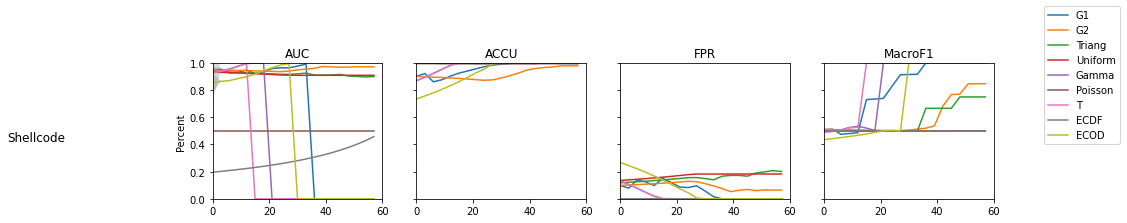

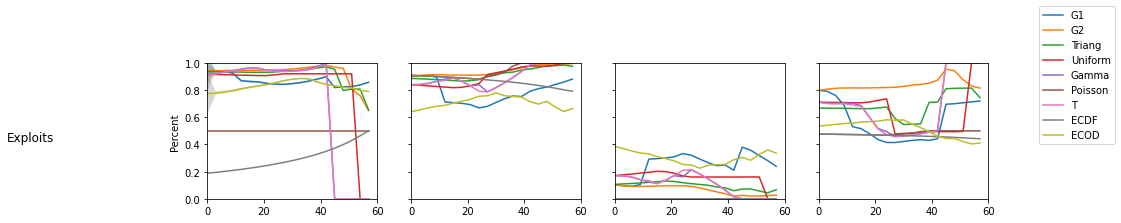

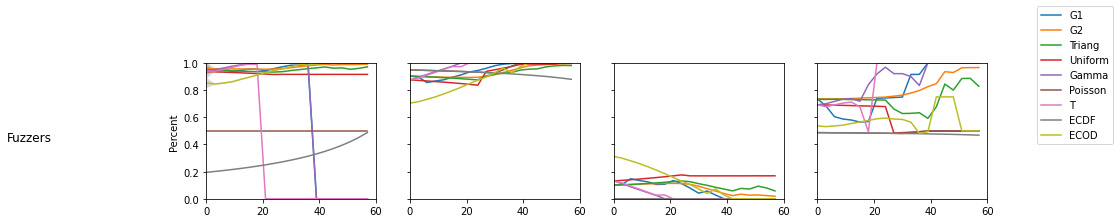

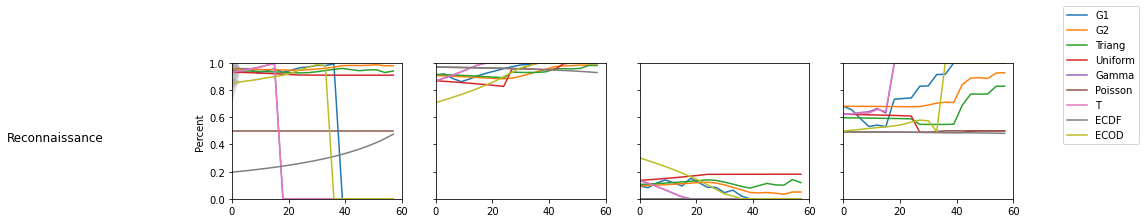

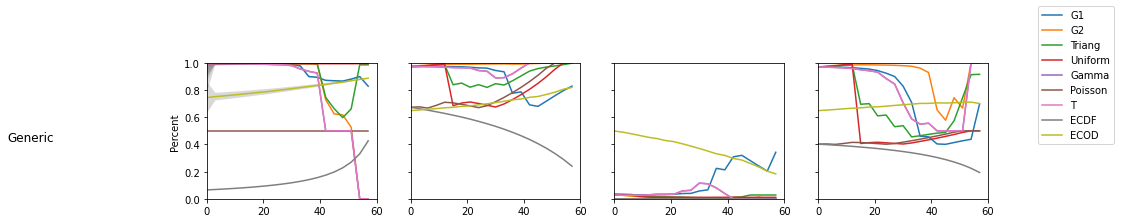

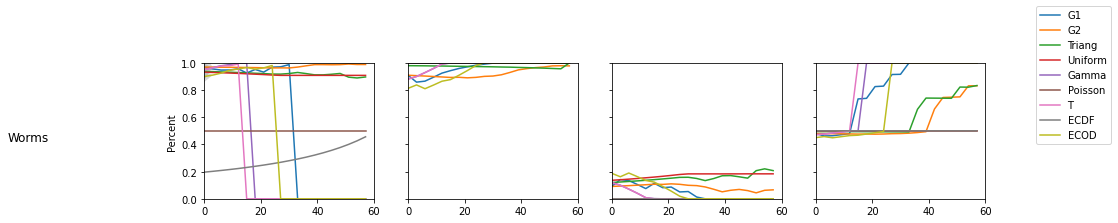

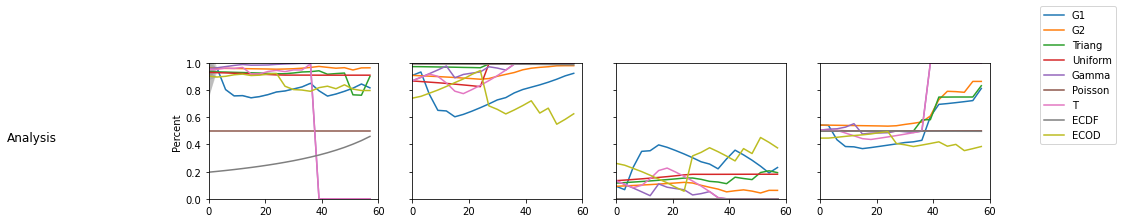

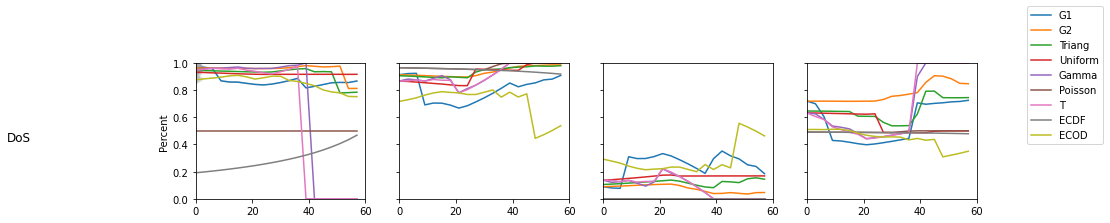

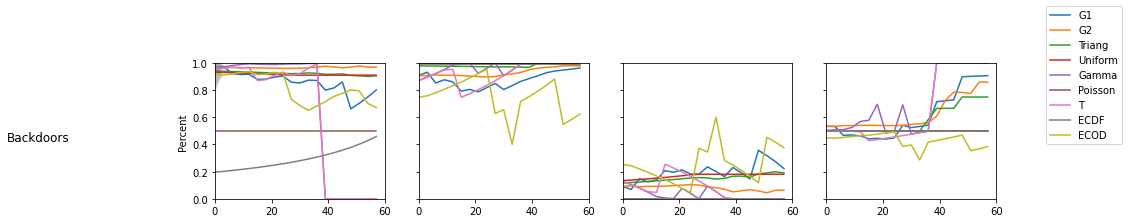

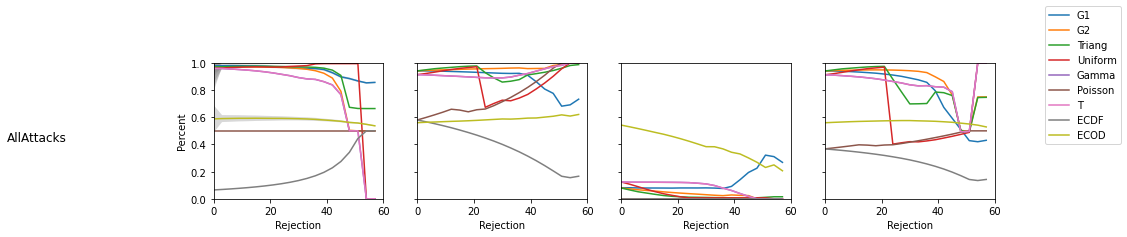

NameError: name 'model_dict_total' is not defined

In [34]:
# under 3+1 , calculate total of each
savename='test'
pd_reader=pd.read_csv(dicavgnpy+'unsw-VI-vae-2+metrics+mean.csv' ) 
#d_reader=pd.read_csv('../../venv/MyBayesian/plots-2/BAE+allmetrics-unsw-vi-vae-(1).csv' ) 
                     
#print(pd_reader.head())

# plot comparision in different phase of each type
total_auc=0 # average of the largest AUC of each types
modelname='BAE MCdropout'
tw_auc,tw_accu=0,0
model_dict={}
model_dict["metricname"]=pd_reader.iloc[17,1:19]
for each in range(1,len( attack_types)):
    fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(1,4,figsize=(14,2.5),sharey=True) 
    fig.suptitle(attack_types[each] ,x=-0.05,y=0.5) # {typename} {modelname}')
    best_auc=0
    w_auc=0  #average
    w_accu=0  # average
    #for i in range(0,len(pd_reader)):
    i=1
    while i<len(pd_reader):
        flag=False        
        if '+' in pd_reader.iloc[i,0] :
            if pd_reader.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each]:
                legendd=pd_reader.iloc[i,0].split('+')[0]
                if legendd in model_dict.keys():
                    model_dict[legendd]=model_dict[legendd]+pd_reader.iloc[i+17,1:19].astype(np.float16)                    
                else: 
                    model_dict[legendd]=pd_reader.iloc[i+17,1:19].astype(np.float16) 
                    
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_reader.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_reader.iloc[i+15,1:].astype(np.float16)

                plot_title=pd_reader.iloc[i+2,0]            
                y_values=pd_reader.iloc[i+3,1:].astype(np.float16)
                ''' 
                if best_auc<  np.max(y_values):
                    best_auc=np.max(y_values)
                if w_auc<float(pd_reader.iloc[i+17,2]):
                    w_auc=float( pd_reader.iloc[i+17,2])
                    # print(f'the better weight_auc {w_auc}is belongs: {attack_types[each]}{legendd}')
                if w_accu<float(pd_reader.iloc[i+17,3]):
                    w_accu=float(pd_reader.iloc[i+17,3])
                    #print(f'the better weight_accu {w_accu}is belongs: {attack_types[each]}{legendd}')
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                        '''
                # AUC
                ax1.plot(xx,y_values,label=legendd)                
                ax1.fill_between(xx,y_values-np.absolute(y_uncer),y_values+np.absolute(y_uncer),alpha=0.3,facecolor='grey')
                ax1.set(ylabel='Percent')              
                # ACCU
                ax2.plot(xx, pd_reader.iloc[i+9,1:].astype(np.float16) ) # , 'tab:green')                
                # FPR
                ax3.plot(xx, pd_reader.iloc[i+7,1:].astype(np.float16) ) #, 'tab:orange')          
                
                # Macro F1
                ax4.plot(xx, pd_reader.iloc[i+11,1:].astype(np.float16) ) # , 'tab:red')              
                #ax4.plot(xx, pd_reader.iloc[i+5,1:].astype(np.float16) ) # , 'tab:red')   # accu2 follow AUC            
                
                if each==1:
                    ax1.set_title(plot_title)
                    ax2.set_title(pd_reader.iloc[i+8,0]) 
                    ax3.set_title(pd_reader.iloc[i+6,0])
                    ax4.set_title(pd_reader.iloc [i+10,0]) # macro F1 [i+4,0])   #
                if each==len(attack_types)-1:
                    ax1.set(xlabel='Rejection')
                    ax2.set(xlabel='Rejection')
                    ax3.set(xlabel='Rejection')
                    ax4.set(xlabel='Rejection')
                '''
                # F1
                ax6.plot(xx,pd_reader.iloc[i+13,1:].astype(np.float16) ) # , 'tab:purple')
                ax6.set_title(pd_reader.iloc[i+12,0])
                #ax6.set(xlabel='Rejection')
                 #GSS
                ax2.plot(xx,pd_reader.iloc[i+5,1:].astype(np.float16),label=legendd)  #
                ax2.set_title(pd_reader.iloc[i+4,0])
                #ax2.fill_between(xx,gsslist-unlist,gsslist+unlist,alpha=0.3,facecolor='grey')
                
                if legendd=='GaussianCustom':
                    i=i+18*3 
                    flag=True
                elif legendd=='ECODLinear':
                    i=i+18
                    flag=True
                '''                      
                i=i+18*3
                flag=True
        if not flag:
            i=i+1                   
   
    
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1.03,0.4))
           
    for ax in fig.get_axes():
        ax.label_outer()
        ax.set_xlim(0,60)
        ax.set_ylim(0,1)
    '''
    total_auc=(total_auc+best_auc  ) /2
    tw_auc=(tw_auc+w_auc)/2
    tw_accu=(tw_accu+w_accu)/2
    
    nowtime=datetime.datetime.now()
    nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)    
    pyplot.savefig('plots/'+modelname+'+'+nowtime+'+'+"allmetrics.png")
    '''
    pyplot.show()
   
for aproblegend in model_dict_total.keys():
    if aproblegend != 'metricname':
        model_dict[aproblegend]=model_dict[aproblegend]/(len(attack_types)-1)
                      
#model_dict['Gaussian1']=model_dict['Gaussian1']/(len(attack_types)-1)
#model_dict['GaussianCustom']=model_dict['GaussianCustom']/(len(attack_types)-1)
#model_dict['ECODLinear']=model_dict['ECODLinear']/(len(attack_types)-1)
         
#print(f'the AUC of this model is {total_auc}')
save_path = "plots/"+'allmetrics+'+savename+".csv"
#final_AUC={'total_AUC':total_auc, 'weight_AUC:':tw_auc,'weight_Accu:':tw_accu}
#save_data = pd.DataFrame.from_dict([final_AUC])
#save_data.to_csv(save_path, mode='a', header=True, index_label=modelname,index=True)

save_data=pd.DataFrame(model_dict)
save_data.to_csv(save_path, mode='a', header=True, index_label=modelname,index=True)

### plot model

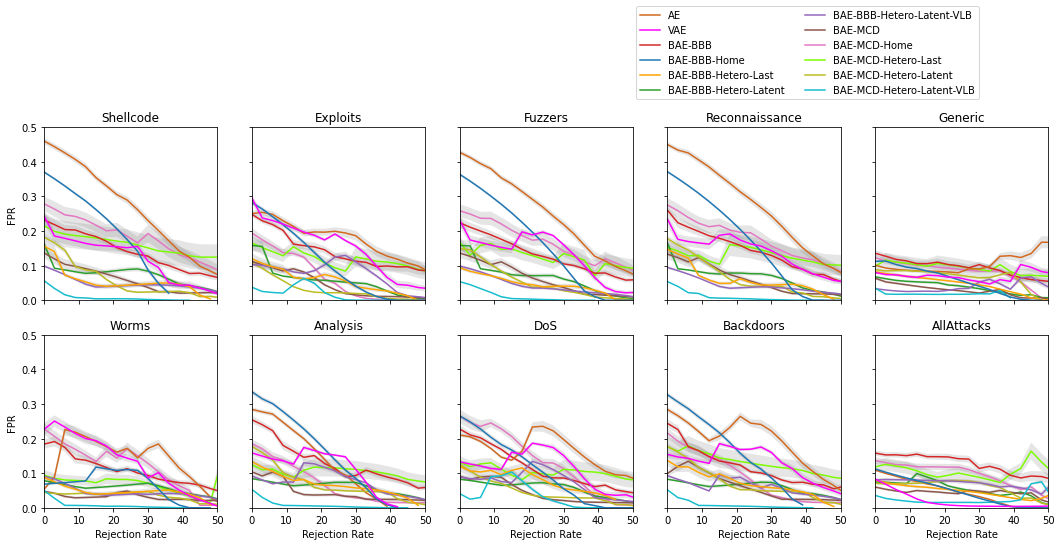

In [7]:
# plot comparision in different model of each type of AUC, Accuracy
###### 5 places need to be changed

formnames=['BAE-BBB','BAE-BBB-Home','BAE-BBB-Hetero-Last','BAE-BBB-Hetero-Latent','BAE-BBB-Hetero-Latent-VLB' ,'BAE-MCD','BAE-MCD-Home','BAE-MCD-Hetero-Last',
          'BAE-MCD-Hetero-Latent','BAE-MCD-Hetero-Latent-VLB','AE','VAE']
fig, axes= pyplot.subplots(2, 5,figsize=(18,7),sharex=True,sharey=True) 
#fig.suptitle('Comparisons of Models' ) 
##############################################(1)
# diccsv='../../venv/MyBayesian/averageingfiles/'  # auc
# diccsv='../../venv/MyBayesian/averageingfiles/accuracy/'  # 
diccsv='../../venv/MyBayesian/averageingfiles/fpr/'  # 
#diccsv='csvsUNSW/'
for indtype in range(1,len( attack_types)): 
    axes[(indtype-1)//5,(indtype-1)%5].set_title(attack_types[indtype] )  #
    
    for root,dirs,files in os.walk(diccsv):
        for each in files:
            #if each.endswith('.csv') and each.split('-')[-1]!='checkpoint.csv' and 'BDLunsw-4-VAE-seed1-mae-mae+allmetrics.csv' in each   :   #  
            if each.endswith('.csv') and each.split('-')[-1]!='checkpoint.csv' and '-best-1+best+metrics+mean.csv' in each : #  and ('AE' in each or 'AE' in each) :   # 
                
                # thislabel='??'
                # if 'vi' in each or 'VI' in each:
                #     thislabel=str(each) # 'BVAE-BBB'   #
                # elif 'drop' in each or 'Dropout' or 'MCD' in each:
                #     thislabel=str(each) #'BVAE-MCD'  #
                #thislabel=each.split('-best')[0].split('unsw-')[1]
                tplabel=''
                tplabel=each.split('-best')[0].split('unsw-')[1]
                #print(tplabel)
                if tplabel=='VI-none':
                    thislabel=formnames[0] #'BAE-BBB'
                    cc=color[0]
                elif tplabel=='VI-input':
                    thislabel=formnames[1]  # 'BAE-BBB-Home'
                    cc=color[1]
                elif tplabel=='VI-last':
                    thislabel= formnames[2]  # 'BAE-BBB-Hetero-Last'  #'BAE-BBB-HetLast' # 
                    cc=color[2]
                elif tplabel=='VI-latent':
                    thislabel= formnames[3] # 'BAE-BBB-Hetero-Latent'  #'BAE-BBB-HetLatent'  # 
                    cc=color[3]
                elif tplabel=='VI-vae':
                    thislabel= formnames[4] # 'BAE-BBB-Hetero-Latent-VI'  #'BAE-BBB-HetLatentVI'  # 
                    cc=color[4]
                elif tplabel=='MCD-none':
                    thislabel=formnames[5] # 'BAE-MCD'
                    cc=color[5]
                elif tplabel=='MCD-input':
                    thislabel= formnames[6] # 'BAE-MCD-Home'
                    cc=color[6]
                elif tplabel=='MCD-last':
                    thislabel= formnames[7] # 'BAE-MCD-Hetero-Last'
                    cc=color[7]
                elif tplabel=='MCD-latent':
                    thislabel= formnames[8] # 'BAE-MCD-Hetero-Latent'
                    cc=color[8]
                elif tplabel=='MCD-vae':
                    thislabel= formnames[9] # 'BAE-MCD-Hetero-Latent-VI'
                    cc=color[9]
                elif tplabel=='AE':
                    thislabel=formnames[10]
                    cc=color[10]
                elif tplabel=='VAE':
                    thislabel=formnames[11]
                    cc=color[11]
                else:
                    thislabel=tplabel
                    cc=color[12]
                    
                    
                pd_reader=pd.read_csv(diccsv+each)
                eachstd=each.split('mean')[0]+'std.csv'
                pd_reader_std=pd.read_csv(diccsv+ eachstd)
                
                init=0
                # #if thislabel=='BAE-VI':
                # if each=='BAE+allmetrics-unsw-vi-vae-(1)-forECOD.csv':  # for ECOD
                #     init=1441
                #probname='G2' # 'G1'  # 'Triang'  #   
                # if each=='BAEunsw-3-drop-vae-bce+allmetrics-forG1.csv':
                #     probname='Gaussian1'
                for i in range(init,len(pd_reader)): # show the first group results in csv
                  
                    if pd_reader.iloc[i,0]==attack_types[indtype] :  

                        xx=pd_reader.iloc[i+2,1:].astype(int)
                        
                        ##plot_title=pd_reader.iloc[i+2,0]    
                        
                        ##############################3 (2)
                        # y_values=pd_reader.iloc[i+3,1:].astype(np.float16)  # AUC
                        y_values=pd_reader.iloc[i+7,1:].astype(np.float16)  # fpr

                        #y_values=pd_reader.iloc[i+5,1:].astype(np.float16)  # GSS

                        # y_values=pd_reader.iloc[i+9,1:].astype(np.float16)  # Accu
                        # y_values=pd_reader.iloc[i+5,1:].astype(np.float16)  # Accu2
                        
                        #y_values=pd_reader.iloc[i+11,1:].astype(np.float16)  # Macro F1
                        ##y_values=pd_reader.iloc[i+13,1:].astype(np.float16)  # F1
                        
                        ######################(3)
                        # # std
                        if 'VAE' in each:
                            y_uncer=pd_reader_std.iloc[i+7,1:].astype(np.float16) /8.0
                        else:
                            y_uncer=pd_reader_std.iloc[i+7,1:].astype(np.float16) /8
                        
                        xxx=xx
                        yyy=y_values
                        yyy_uncer=y_uncer
                        # for remove zero values                        
                        for ind in range(1,len(yyy)):
                            if yyy[ind-1]==0:
                                yyy=yyy[:ind-1] 
                                yyy_uncer=yyy_uncer[:ind-1]
                                xxx=xxx[:ind-1]
                                break
                                
                           # for remove angles
                        for ind in range(1,len(yyy)):
                            if np.abs((yyy[ind-1]-yyy[ind]))>0.3:
                                yyy=yyy[:ind-1] 
                                yyy_uncer=yyy_uncer[:ind-1]
                                xxx=xxx[:ind-1]
                                break
                                
                        axes[(indtype-1)//5,(indtype-1)%5].plot(xxx,yyy,label=thislabel,c=cc)
                        axes[(indtype-1)//5,(indtype-1)%5].fill_between(xxx,yyy-yyy_uncer,yyy+yyy_uncer,alpha=0.2,facecolor='grey')
                        #ax1.fill_between(xx,y_values-y_uncer,y_values+y_uncer,alpha=0.3,facecolor='grey')
                        #ax1.set(ylabel='Percent')
                        if indtype==1 or indtype==6:
                            ##############################(4)
                            axes[(indtype-1)//5,(indtype-1)%5].set(ylabel='FPR')  # 'Percent')
                            # axes[(indtype-1)//5,(indtype-1)%5].set(ylabel='AUC-ROC')  # 'Percent')
                            # axes[(indtype-1)//5,(indtype-1)%5].set(ylabel='Accuracy')  # 'Percent')
                        if indtype>5:
                            axes[(indtype-1)//5,(indtype-1)%5].set(xlabel='Rejection Rate')

                        break

                        #i=i+18  
handles, labels = axes[0,2].get_legend_handles_labels()
# fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1,0.5))
order=[3,11,2,10,8,4,7,5,0,1,6,9,]

fig.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc="upper right" , ncol=2, bbox_to_anchor=(0.85,1.13))
# fig.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc="lower right" , bbox_to_anchor=(1,0.5))

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlim(0,50)
    ###########################(5)
    ax.set_ylim(0.6,1)  ### auc
    ax.set_ylim(0.5,1)  ### accuracy
    ax.set_ylim(0,0.5)  ### fpr

# nowtime=datetime.datetime.now()
# nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)
nowtime='333'
pyplot.savefig(dicavgnpy+"allmodels.pdf")
pyplot.show()

IndexError: list index out of range

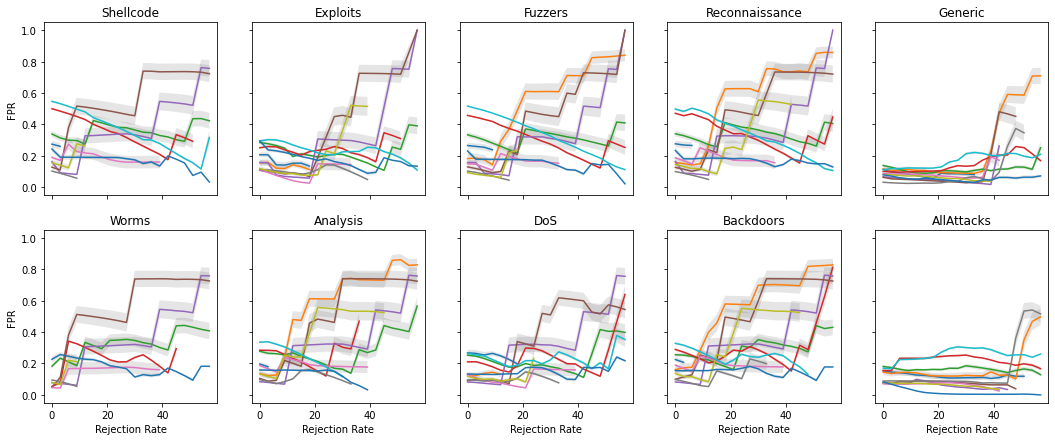

In [9]:
# plot comparision in different model of each type of FPR

fig, axes= pyplot.subplots(2, 5,figsize=(18,7),sharex=True,sharey=True) 
#fig.suptitle('Comparisons of Models' ) 
diccsv='../../venv/MyBayesian/averageingfiles/'  # 
#diccsv='csvsUNSW/'
for indtype in range(1,len( attack_types)): 
    axes[(indtype-1)//5,(indtype-1)%5].set_title(attack_types[indtype] )  #
    
    for root,dirs,files in os.walk(diccsv):
        for each in files:
            #if each.endswith('.csv') and each.split('-')[-1]!='checkpoint.csv' and 'BDLunsw-4-VAE-seed1-mae-mae+allmetrics.csv' in each   :   #  
            if each.endswith('.csv') and each.split('-')[-1]!='checkpoint.csv' and '-best-1+best+metrics+mean.csv' in each : #  and ('AE' in each or 'AE' in each) :   # 
                
                # thislabel='??'
                # if 'vi' in each or 'VI' in each:
                #     thislabel=str(each) # 'BVAE-BBB'   #
                # elif 'drop' in each or 'Dropout' or 'MCD' in each:
                #     thislabel=str(each) #'BVAE-MCD'  #
                thislabel=each.split('-best')[0].split('unsw-')[1]
                
                pd_reader=pd.read_csv(diccsv+each)
                eachstd=each.split('mean')[0]+'std.csv'
                pd_reader_std=pd.read_csv(diccsv+ eachstd)
                
                init=0
                # #if thislabel=='BAE-VI':
                # if each=='BAE+allmetrics-unsw-vi-vae-(1)-forECOD.csv':  # for ECOD
                #     init=1441
                #probname='G2' # 'G1'  # 'Triang'  #   
                # if each=='BAEunsw-3-drop-vae-bce+allmetrics-forG1.csv':
                #     probname='Gaussian1'
                for i in range(init,len(pd_reader)): # show the first group results in csv
                  
                    if pd_reader.iloc[i,0]==attack_types[indtype] :  

                        xx=pd_reader.iloc[i+2,1:].astype(int)
                        
                        ##plot_title=pd_reader.iloc[i+2,0]            
                        
                        y_values=pd_reader.iloc[i+7,1:].astype(np.float16)  # FPR
                        
                        # y_uncer=pd_reader.iloc[i+7,1:].astype(np.float16)/28
                        # std
                        if 'VAE' in each:
                            y_uncer=pd_reader_std.iloc[i+7,1:].astype(np.float16) /8.0
                        else:
                            y_uncer=pd_reader_std.iloc[i+7,1:].astype(np.float16) /8
                        
                        xxx=xx
                        yyy=y_values
                        yyy_uncer=y_uncer
                        # for remove zero values                        
                        for ind in range(1,len(yyy)):
                            if yyy[ind-1]==0:
                                yyy=yyy[:ind-1] 
                                yyy_uncer=yyy_uncer[:ind-1]
                                xxx=xxx[:ind-1]
                                break
                                
                           # for remove angles
                        for ind in range(1,len(yyy)):
                            if np.abs((yyy[ind-1]-yyy[ind]))>0.3:
                                yyy=yyy[:ind-1] 
                                yyy_uncer=yyy_uncer[:ind-1]
                                xxx=xxx[:ind-1]
                                break
                                
                        axes[(indtype-1)//5,(indtype-1)%5].plot(xxx,yyy,label=thislabel)
                        axes[(indtype-1)//5,(indtype-1)%5].fill_between(xxx,yyy-yyy_uncer,yyy+yyy_uncer,alpha=0.2,facecolor='grey')
                        #ax1.fill_between(xx,y_values-y_uncer,y_values+y_uncer,alpha=0.3,facecolor='grey')
                        #ax1.set(ylabel='Percent')
                        if indtype==1 or indtype==6:
                            axes[(indtype-1)//5,(indtype-1)%5].set(ylabel='FPR')  # 'Percent')
                        if indtype>5:
                            axes[(indtype-1)//5,(indtype-1)%5].set(xlabel='Rejection Rate')

                        break

                        #i=i+18  
handles, labels = axes[0,2].get_legend_handles_labels()
#fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1,0.5))
order=[3,11,2,10,8,4,7,5,0,1,6,9,]
fig.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc="lower right" , bbox_to_anchor=(1,0.5))

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlim(0,50)
    ax.set_ylim(0,1)  ###

# nowtime=datetime.datetime.now()
# nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)
nowtime='444FPR'
pyplot.savefig('csvsUNSW/'+nowtime+'+'+"allmodels.png")
pyplot.show()

## CIC2017-vi-vae

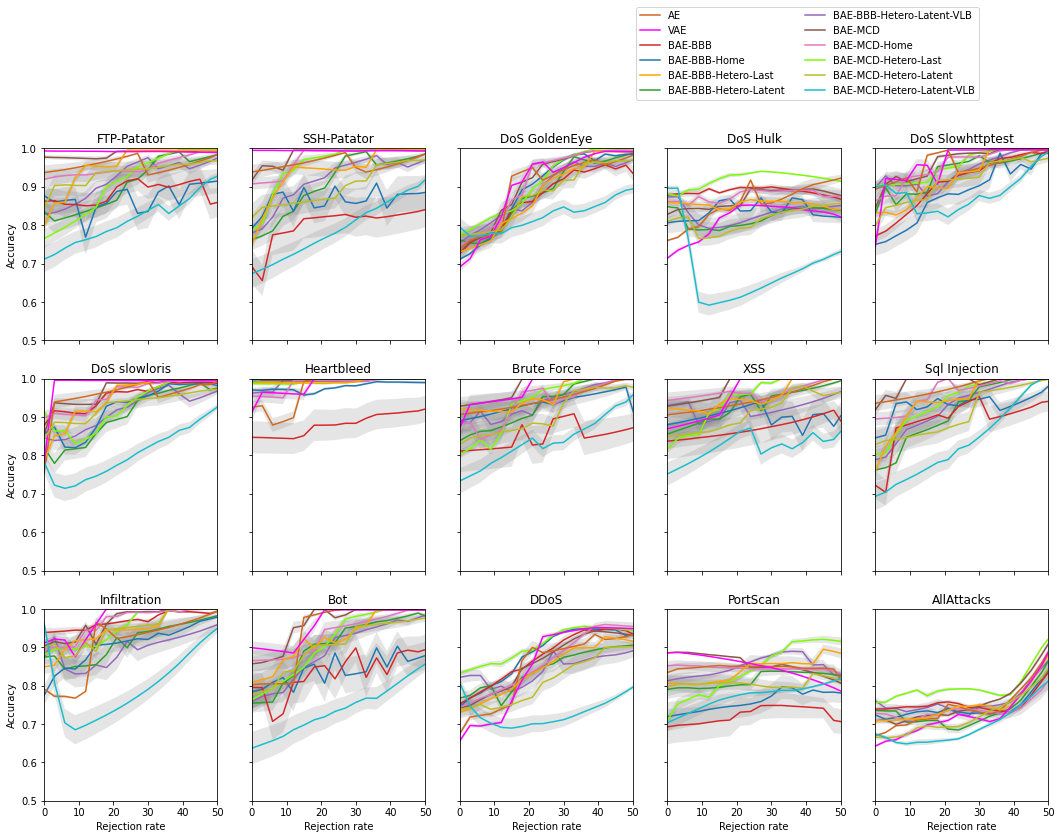

In [18]:
# 4 places need to change for each experiment
# plot comparision in different model of each type
formnames=['BAE-BBB','BAE-BBB-Home','BAE-BBB-Hetero-Last','BAE-BBB-Hetero-Latent','BAE-BBB-Hetero-Latent-VLB' ,'BAE-MCD','BAE-MCD-Home','BAE-MCD-Hetero-Last',
          'BAE-MCD-Hetero-Latent','BAE-MCD-Hetero-Latent-VLB','AE','VAE']


fig, axes= pyplot.subplots(3, 5,figsize=(18,12),sharex=True,sharey=True) 
#fig.suptitle('Comparisons of Models' ) 
#diccsv='csvs/'
#################################### (1)
# diccsv=dicavgnpy   #  auc
diccsv=dicavgnpy_accu
# diccsv=dicavgnpy_fpr
for indtype in range(1,len( attack_types)): 
    axes[(indtype-1)//5,(indtype-1)%5].set_title(attack_types2[indtype] )
    
    for root,dirs,files in os.walk(diccsv):
         for each in files:
            #if each.endswith('.csv') and each.split('-')[-1]!='checkpoint.csv' and 'BDLunsw-4-VAE-seed1-mae-mae+allmetrics.csv' in each   :   #  
            if each.endswith('.csv') and each.split('-')[-1]!='checkpoint.csv' and '-best-1+best+metrics+mean.csv' in each  and 'cic-' in each : # ('AE' in each or 'AE' in each) :   # 
                
                # thislabel='??'
                # if 'vi' in each or 'VI' in each:
                #     thislabel=str(each) # 'BVAE-BBB'   #
                # elif 'drop' in each or 'Dropout' or 'MCD' in each:
                #     thislabel=str(each) #'BVAE-MCD'  #
                tplabel=''
                tplabel=each.split('-best')[0].split('cic-')[1]
                #print(tplabel)
                if tplabel=='VI-none':
                    thislabel=formnames[0] #'BAE-BBB'
                    cc=color[0]
                elif tplabel=='VI-input':
                    thislabel=formnames[1]  # 'BAE-BBB-Home'
                    cc=color[1]
                elif tplabel=='VI-last':
                    thislabel= formnames[2]  # 'BAE-BBB-Hetero-Last'  #'BAE-BBB-HetLast' # 
                    cc=color[2]
                elif tplabel=='VI-latent':
                    thislabel= formnames[3] # 'BAE-BBB-Hetero-Latent'  #'BAE-BBB-HetLatent'  # 
                    cc=color[3]
                elif tplabel=='VI-vae':
                    thislabel= formnames[4] # 'BAE-BBB-Hetero-Latent-VI'  #'BAE-BBB-HetLatentVI'  # 
                    cc=color[4]
                elif tplabel=='MCD-none':
                    thislabel=formnames[5] # 'BAE-MCD'
                    cc=color[5]
                elif tplabel=='MCD-input':
                    thislabel= formnames[6] # 'BAE-MCD-Home'
                    cc=color[6]
                elif tplabel=='MCD-last':
                    thislabel= formnames[7] # 'BAE-MCD-Hetero-Last'
                    cc=color[7]
                elif tplabel=='MCD-latent':
                    thislabel= formnames[8] # 'BAE-MCD-Hetero-Latent'
                    cc=color[8]
                elif tplabel=='MCD-vae':
                    thislabel= formnames[9] # 'BAE-MCD-Hetero-Latent-VI'
                    cc=color[9]
                elif tplabel=='AE':
                    thislabel=formnames[10]
                    cc=color[10]
                elif tplabel=='VAE':
                    thislabel=formnames[11]
                    cc=color[11]
                else:
                    thislabel=tplabel
                    cc=color[12]
                    
                pd_reader=pd.read_csv(diccsv+each)
                eachstd=each.split('mean')[0]+'std.csv'
                pd_reader_std=pd.read_csv(diccsv+ eachstd)
                
                init=0
                
#                 probname='Gaussian1'#  'ECODLinear'  # 'GaussianCustom' # 
                
#                 if each=='BAEcic2017-3-vi-vae-norm-Tril-bce+allmetrics-forGC-no.csv':  
#                     probname='GaussianCustom'
#                 if each=='BAEcic2017-3-vi-vae-mvnTril-bce+allmetrics555-forAUC.csv':
#                     probname='Gaussian1'
                 
                for i in range(init,len(pd_reader)): # show the first group results in csv
                    if pd_reader.iloc[i,0]==attack_types[indtype] : #  and pd_reader.iloc[i,0].split('+')[0]==probname :  #  'GaussianCustom' : #'ECODLinear': # 

                        xx=pd_reader.iloc[i+2,1:].astype(int)
                        #plot_title=pd_reader.iloc[i+2,0]         
                        ################################### (2)
                        # y_values=pd_reader.iloc[i+3,1:].astype(np.float16)  # AUC
                        # y_values=pd_reader.iloc[i+7,1:].astype(np.float16)  # fpr

                        y_values=pd_reader.iloc[i+9,1:].astype(np.float16)  # Accu

                        #y_values=np.where(y_values==0,1,y_values)

                        #################################### (3) same index as in y_values
                        y_uncer=pd_reader_std.iloc[i+9,1:].astype(np.float16)/6.0


                        xxx=xx
                        yyy=y_values
                        yyy_uncer=y_uncer
                        # for remove zero values                        
                        for ind in range(1,len(yyy)):
                            if yyy[ind-1]==0:
                                yyy=yyy[:ind-1] 
                                yyy_uncer=yyy_uncer[:ind-1]
                                xxx=xxx[:ind-1]
                                break

                           # for remove angles
                        for ind in range(1,len(yyy)):
                            if np.abs((yyy[ind-1]-yyy[ind]))>0.3:
                                yyy=yyy[:ind-1] 
                                yyy_uncer=yyy_uncer[:ind-1]
                                xxx=xxx[:ind-1]
                                break

                        axes[(indtype-1)//5,(indtype-1)%5].plot(xxx,yyy,label=thislabel, c= cc)
                        axes[(indtype-1)//5,(indtype-1)%5].fill_between(xxx,yyy-yyy_uncer,yyy+yyy_uncer,alpha=0.2,facecolor='grey')
                        #ax1.fill_between(xx,y_values-y_uncer,y_values+y_uncer,alpha=0.3,facecolor='grey')
                        #ax1.set(ylabel='Percent')
                        if (indtype-1)%5==0:
                            ##################### (4)
                            # axes[(indtype-1)//5,(indtype-1)%5].set(ylabel='AUC-ROC')
                            axes[(indtype-1)//5,(indtype-1)%5].set(ylabel='Accuracy')
                            # axes[(indtype-1)//5,(indtype-1)%5].set(ylabel='FPR')
                        if indtype>10:
                            axes[(indtype-1)//5,(indtype-1)%5].set(xlabel='Rejection rate')

                        break
                        #i=i+18  
handles, labels = axes[0,2].get_legend_handles_labels()
# fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1,0.5))
order=[7,9,3,2,8,1,0,5,6,4,10,11]
fig.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc="upper right" , ncol=2, bbox_to_anchor=(0.85,1.05))
# fig.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc="lower right" ,  bbox_to_anchor=(1,0.5))  

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlim(0,50)
    ########################(5)
    # ax.set_ylim(0.35,1)   # for auc
    ax.set_ylim(0.5,1)   # for accuracy
    
    # ax.set_ylim(0,0.8)  # for fpr

#nowtime=datetime.datetime.now()
#nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)
pyplot.savefig(dicavgnpy+'allmodels.pdf')
pyplot.show()

In [ ]:
# plot comparision in different model of each type
fig, axes= pyplot.subplots(3, 5,figsize=(18,10),sharex=True,sharey=True) 
#fig.suptitle('Comparisons of Models' ) 
diccsv='csvs/'
for indtype in range(1,len( attack_types)): 
    axes[(indtype-1)//5,(indtype-1)%5].set_title(attack_types2[indtype] )
    
    for root,dirs,files in os.walk(diccsv):
        for each in files:
            if each.endswith('.csv') and each.split('-')[-1]!='checkpoint.csv' : 
                thislabel='??'
                if 'vi' in each:   # .split('+')[0]:
                    thislabel='BVAE-VI'
                elif 'drop' in each:   # .split('+')[0]:
                    thislabel='BVAE-MCD'
                
                #thislabel=each.split('+')[1]
                pd_reader=pd.read_csv(diccsv+each)
                init=0
                
                probname='Gaussian1'#  'ECODLinear'  # 'GaussianCustom' # 
                
                if each=='BAEcic2017-3-vi-vae-norm-Tril-bce+allmetrics-forGC-no.csv':  
                    probname='GaussianCustom'
                if each=='BAEcic2017-3-vi-vae-mvnTril-bce+allmetrics555-forAUC.csv':
                    probname='Gaussian1'
                 
                for i in range(init,len(pd_reader)): # show the first group results in csv
                    if '+' in pd_reader.iloc[i,0]:
                        if pd_reader.iloc[i,0].split('+')[1]==attack_types[indtype] and pd_reader.iloc[i,0].split('+')[0]==probname :  #  'GaussianCustom' : #'ECODLinear': # 
                           
                            xx=pd_reader.iloc[i+2,1:].astype(int)
                            y_uncer=pd_reader.iloc[i+15,1:].astype(np.float16)
                            #plot_title=pd_reader.iloc[i+2,0]            
                            y_values=pd_reader.iloc[i+3,1:].astype(np.float16)  # AUC

                            #y_values=pd_reader.iloc[i+9,1:].astype(np.float16)  # Accu
                            
                            #y_values=np.where(y_values==0,1,y_values)
                            
                            axes[(indtype-1)//5,(indtype-1)%5].plot(xx,y_values,label=thislabel)
                            #ax1.fill_between(xx,y_values-y_uncer,y_values+y_uncer,alpha=0.3,facecolor='grey')
                            #ax1.set(ylabel='Percent')
                            if (indtype-1)%5==0:
                                axes[(indtype-1)//5,(indtype-1)%5].set(ylabel='Percent')
                            if indtype>10:
                                axes[(indtype-1)//5,(indtype-1)%5].set(xlabel='Rejection rate')
                        
                            break
                            #i=i+18  
handles, labels = axes[0,2].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1,0.5))

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlim(0,50)
    ax.set_ylim(0,1)

#nowtime=datetime.datetime.now()
#nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)
pyplot.savefig('csvs/comparison-cic2017+'+"allmodels.png")
pyplot.show()

In [ ]:
#savename='cic2017-vi-last-bce'
pd_ECOD=pd.read_csv('../../venv/MyBayesian/plots-4/BAEcic2017-3-drop-vae-Tril-bce+allmetrics444.csv' ) 
#pd_ECOD_uncer=pd.read_csv('../../venv/MyBayesian/plots-3/BAEunsw-vi-vae-mvn-bce+allmetrics.csv')
#pd_GC=pd_ECOD 
pd_GC=pd.read_csv('../../venv/MyBayesian/plots-4/BAEcic2017-3-drop-vae-Tril-bce+allmetrics666.csv' ) 
pd_Gamma=pd.read_csv('../../venv/MyBayesian/plots-4/BAEcic2017-3-drop-vae-Tril-bce+allmetrics555.csv' ) 
#pd_G1=pd.read_csv('../../venv/MyBayesian/plots-4/BAEcic2017-3-drop-vae-Tril-bce+allmetrics666.csv' ) 
pd_G1=pd.read_csv('../../venv/MyBayesian/plots/BAEcic2017-5-drop-vae-norm-Tril-KLregu-mae+allmetrics.csv' ) 

#print(pd_reader.head())


modelname='cic2017-drop-vae'
for each in range(1,len( attack_types)):
    fig, (ax1, ax2, ax3) = pyplot.subplots(1,3,figsize=(10,2.5),sharey=True) 
    #fig.suptitle(attack_types[each] ,x=-0.05,y=0.5) 
    #for i in range(0,len(pd_reader)):
    ####### plot GC
    i=1
    while i<len(pd_GC):
        flag=False       
        if '+' in pd_GC.iloc[i,0] and pd_GC.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each]:
            #print(pd_GC.iloc[i,0].split('+')[0]=='GaussianCustom')
            #print(pd_GC.iloc[i,0].split('+')[0]=='Gamma')
            if pd_GC.iloc[i,0].split('+')[0]=='GaussianCustom' or pd_GC.iloc[i,0].split('+')[0]=='ECODLinear':    
                legendd=pd_GC.iloc[i,0].split('+')[0]
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_GC.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_GC.iloc[i+15,1:].astype(np.float16)

                plot_title=pd_GC.iloc[i+2,0]            
                y_values=pd_GC.iloc[i+3,1:].astype(np.float16)
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                        '''
                # ACCU
                y_values2=pd_GC.iloc[i+9,1:].astype(np.float16) 
                ax1.plot(xx, y_values2) # , 'tab:green')              
                ax1.fill_between(xx,y_values2-np.absolute(y_uncer)/2,y_values2+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                ax1.set(ylabel='Percent')     
                # AUC
                ax2.plot(xx,y_values,label=legendd)                
                ax2.fill_between(xx,y_values-np.absolute(y_uncer)/2,y_values+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                                            
                # FPR
                ax3.plot(xx, pd_GC.iloc[i+7,1:].astype(np.float16) ) #, 'tab:orange')          
                
                # Macro F1
                ##ax4.plot(xx, pd_reader.iloc[i+11,1:].astype(np.float16) ) # , 'tab:red') 
                #ax4.plot(xx, pd_reader.iloc[i+5,1:].astype(np.float16) ) # , 'tab:red')   # accu2 follow AUC            
                
                if each==1:
                    ax2.set_title(plot_title)
                    ax1.set_title(pd_GC.iloc[i+8,0]) 
                    ax3.set_title(pd_GC.iloc[i+6,0])
                    #ax4.set_title(pd_reader.iloc[i+4,0])   # [i+10,0]) # macro F1 
                if each==len(attack_types)-1:
                    ax1.set(xlabel='Rejection')
                    ax2.set(xlabel='Rejection')
                    ax3.set(xlabel='Rejection')
                    #ax4.set(xlabel='Rejection')
                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1   
#############################################    plot G1    
    i=1
    while i<len(pd_G1):
        flag=False        
        if '+' in pd_G1.iloc[i,0] and pd_G1.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each]:
            if 'Gaussian1'==pd_G1.iloc[i,0].split('+')[0]:   
                legendd='Gaussian'
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_G1.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_G1.iloc[i+15,1:].astype(np.float16)

                plot_title=pd_G1.iloc[i+2,0]            
                y_values=pd_G1.iloc[i+3,1:].astype(np.float16)
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                        '''
                # ACCU
                y_values2=pd_G1.iloc[i+9,1:].astype(np.float16) 
                ax1.plot(xx, y_values2) # , 'tab:green')              
                ax1.fill_between(xx,y_values2-np.absolute(y_uncer)/2,y_values2+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                ax1.set(ylabel='Percent')     
                # AUC
                ax2.plot(xx,y_values,label=legendd)                
                ax2.fill_between(xx,y_values-np.absolute(y_uncer)/2,y_values+np.absolute(y_uncer)/2,alpha=0.3,facecolor='grey')
                                            
                # FPR
                ax3.plot(xx, pd_G1.iloc[i+7,1:].astype(np.float16) ) #, 'tab:orange')          
                                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1   
################################################ plot ECOD
    i=1
    while i<len(pd_Gamma):
        flag=False        
        if '+' in pd_Gamma.iloc[i,0] and pd_Gamma.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each]:
            if 'Gamma'==pd_Gamma.iloc[i,0].split('+')[0]:   
                legendd='Gamma'
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_Gamma.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                
               
                y_uncer=pd_Gamma.iloc[i+15,1:].astype(np.float16)
                           
                y_values=pd_Gamma.iloc[i+3,1:].astype(np.float16)
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:,ind-1]                        
                        xxx=xx[:,ind-1]
                        '''
                # ACCU
                y_values2=pd_Gamma.iloc[i+9,1:].astype(np.float16)
                ax1.plot(xx, y_values2 ) # , 'tab:green')              
                #ax1.fill_between(xx,y_values2-np.absolute(y_uncer),y_values2+np.absolute(y_uncer),alpha=0.3,facecolor='grey')
                ax1.set(ylabel='Percent')     
                # AUC
                ax2.plot(xx,y_values,label=legendd)                
                #ax2.fill_between(xx,y_values-np.absolute(y_uncer),y_values+np.absolute(y_uncer),alpha=0.3,facecolor='grey')
                                            
                # FPR
                ax3.plot(xx, pd_Gamma.iloc[i+7,1:].astype(np.float16) ) #, 'tab:orange')          
                       
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1 
###################################################
    
    handles, labels = ax2.get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1.1,0.4))
           
    for ax in fig.get_axes():
        ax.label_outer()
        ax.set_xlim(0,50)
        ax.set_ylim(0,1)
    
    #nowtime=datetime.datetime.now()
    #nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)    
    #pyplot.savefig('plots/'+modelname+"-1031-allmetrics.png")
    
    pyplot.show()
   
                      
         

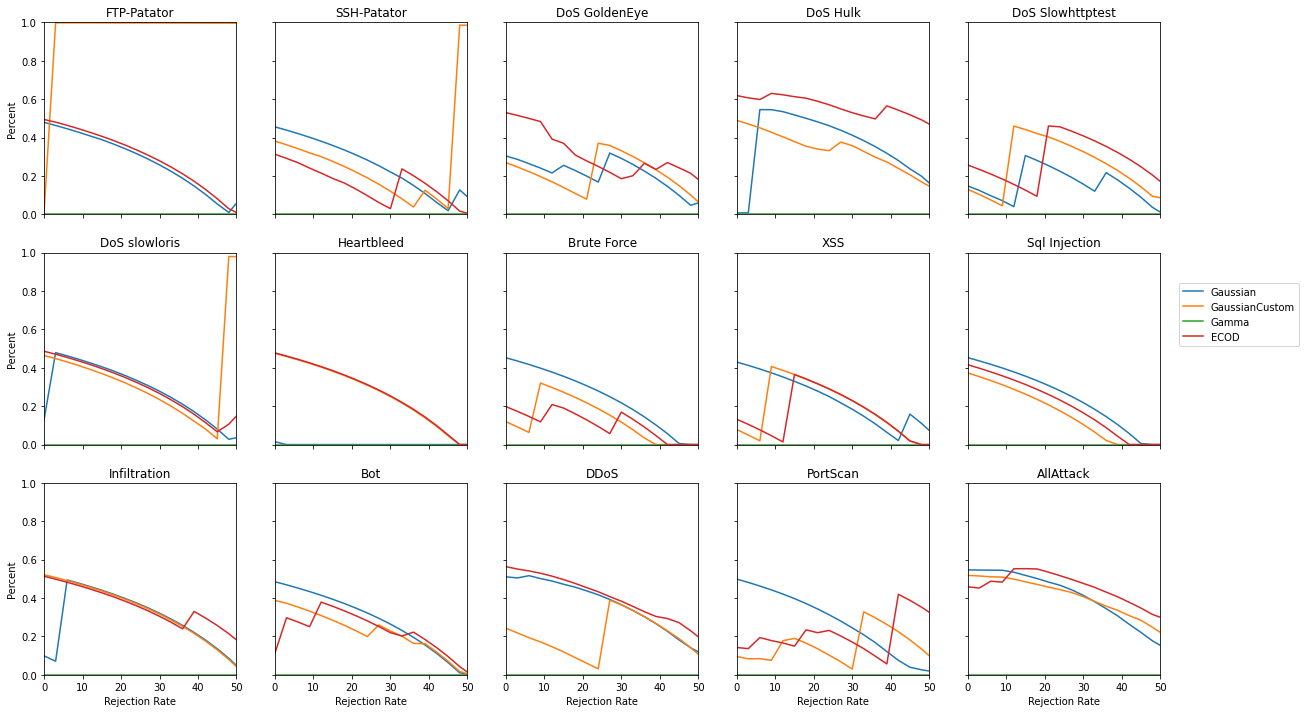

In [13]:
# plot comparision in different model of each type
fig, axes= pyplot.subplots(3, 5,figsize=(20,12),sharex=True,sharey=True) 
#fig.suptitle('Comparisons of ' ) 
for indtype in range(1,len( attack_types)): 
    axes[(indtype-1)//5,(indtype-1)%5].set_title(attack_types2[indtype] )  #
    #############################################    plot G1    
    i=1
    while i<len(pd_G1):
        flag=False        
        if '+' in pd_G1.iloc[i,0] and pd_G1.iloc[i,0].split('+')[1].split('.')[0]==attack_types[indtype]:
            if 'Gaussian1'==pd_G1.iloc[i,0].split('+')[0]:   
                legendd='Gaussian'
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_G1.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_G1.iloc[i+15,1:].astype(np.float16)

                #plot_title=pd_G1.iloc[i+2,0]            
                y_values=pd_G1.iloc[i+3,1:].astype(np.float16)  # AUC
                 # ACCU
                #y_values=pd_G1.iloc[i+9,1:].astype(np.float16)
                #y_values=pd_G1.iloc[i+7,1:].astype(np.float16) # fpr
                yyy=y_values
                xxx=xx
                part_uncer=y_uncer
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:(ind-1)]                        
                        xxx=xx[:(ind-1)]
                        part_uncer=y_uncer[:(ind-1)]
                        break
                        '''
                axes[(indtype-1)//5,(indtype-1)%5].plot(xxx,yyy,label=legendd)
                
                axes[(indtype-1)//5,(indtype-1)%5].fill_between(xxx,yyy-np.absolute(part_uncer)/2,yyy+np.absolute(part_uncer)/2,alpha=0.3,facecolor='grey')
                axes[(indtype-1)//5,0].set(ylabel='Percent')                         
               
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1  
    ################################################### GC
    i=1
    while i<len(pd_GC):
        flag=False       
        if '+' in pd_GC.iloc[i,0] and pd_GC.iloc[i,0].split('+')[1].split('.')[0]==attack_types[indtype]:
            if pd_GC.iloc[i,0].split('+')[0]=='GaussianCustom' :    
                legendd=pd_GC.iloc[i,0].split('+')[0]
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_GC.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_GC.iloc[i+15,1:].astype(np.float16)

                #plot_title=pd_GC.iloc[i+2,0]            
                y_values=pd_GC.iloc[i+3,1:].astype(np.float16)  #auc
                        
                # ACCU
                #y_values=pd_GC.iloc[i+9,1:].astype(np.float16)
                #y_values=pd_GC.iloc[i+7,1:].astype(np.float16)     #fpr
                yyy=y_values
                xxx=xx
                part_uncer=y_uncer
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:(ind-1)]                        
                        xxx=xx[:(ind-1)]
                        part_uncer=y_uncer[:(ind-1)]
                        break
                        '''
                axes[(indtype-1)//5,(indtype-1)%5].plot(xxx,yyy,label=legendd)
                axes[(indtype-1)//5,(indtype-1)%5].fill_between(xxx,yyy-np.absolute(part_uncer)/2,yyy+np.absolute(part_uncer)/2,alpha=0.3,facecolor='grey')
                
                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1   
 
 ################################################ plot Gamma
    i=1
    while i<len(pd_Gamma):
        flag=False        
        if '+' in pd_Gamma.iloc[i,0] and pd_Gamma.iloc[i,0].split('+')[1].split('.')[0]==attack_types[indtype]:
            if 'Gamma'==pd_Gamma.iloc[i,0].split('+')[0]:   
                legendd='Gamma'
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_Gamma.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                
                y_uncer=pd_Gamma.iloc[i+15,1:].astype(np.float16)
                #plot_title=pd_ECOD.iloc[i+2,0]            
                y_values=pd_Gamma.iloc[i+3,1:].astype(np.float16)   # AUC
                                          
                # ACCU
                #y_values=pd_Gamma.iloc[i+9,1:].astype(np.float16) 
                #y_values=pd_Gamma.iloc[i+7,1:].astype(np.float16)    # fpr
                yyy=y_values
                xxx=xx
                part_uncer=y_uncer
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:(ind-1)]                        
                        xxx=xx[:(ind-1)]
                        part_uncer=y_uncer[:(ind-1)]
                        break
                        '''
                axes[(indtype-1)//5,(indtype-1)%5].plot(xxx,yyy,label=legendd)
                axes[(indtype-1)//5,(indtype-1)%5].fill_between(xxx,yyy-np.absolute(part_uncer)/2,yyy+np.absolute(part_uncer)/2,alpha=0.3,facecolor='grey')
             
                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1 
        
    ################################################### GC
    i=1
    while i<len(pd_ECOD):
        flag=False       
        if '+' in pd_ECOD.iloc[i,0] and pd_ECOD.iloc[i,0].split('+')[1].split('.')[0]==attack_types[indtype]:
            if pd_ECOD.iloc[i,0].split('+')[0]=='ECODLinear' :    
                legendd='ECOD' # pd_GC.iloc[i,0].split('+')[0]
                #fig_title=pd_reader.iloc[i,0]
                try:
                    xx=pd_ECOD.iloc[i+2,1:].astype(int)
                except:
                    print(i)
                y_uncer=pd_ECOD.iloc[i+15,1:].astype(np.float16)

                #plot_title=pd_ECOD.iloc[i+2,0]            
                y_values=pd_ECOD.iloc[i+3,1:].astype(np.float16)   #auc
                                        
                # ACCU
                #y_values=pd_ECOD.iloc[i+9,1:].astype(np.float16)
                #y_values=pd_ECOD.iloc[i+7,1:].astype(np.float16)       # fpr
                yyy=y_values
                xxx=xx
                part_uncer=y_uncer
                '''
                   # for remove angles
                for ind in range(1,len(y_values)):
                    if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                        yyy=y_values[:(ind-1)]                        
                        xxx=xx[:(ind-1)]
                        part_uncer=y_uncer[:(ind-1)]
                        break
                        '''
                axes[(indtype-1)//5,(indtype-1)%5].plot(xxx,yyy,label=legendd)
                axes[(indtype-1)//5,(indtype-1)%5].fill_between(xxx,yyy-np.absolute(part_uncer)/2,yyy+np.absolute(part_uncer)/2,alpha=0.3,facecolor='grey')
                axes[(indtype-1)//5,0].set(ylabel='Percent') 
                if indtype>5:
                    axes[(indtype-1)//5,(indtype-1)%5].set(xlabel='Rejection Rate')
                
                i=i+18*3 
                flag=True
        if not flag:
            i=i+1   
            
handles, labels = axes[0,2].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1,0.5))

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlim(0,50)
    ax.set_ylim(0,1)

#nowtime=datetime.datetime.now()
#nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)
pyplot.savefig('plots/'+"cic-allprobs.png")
pyplot.show()

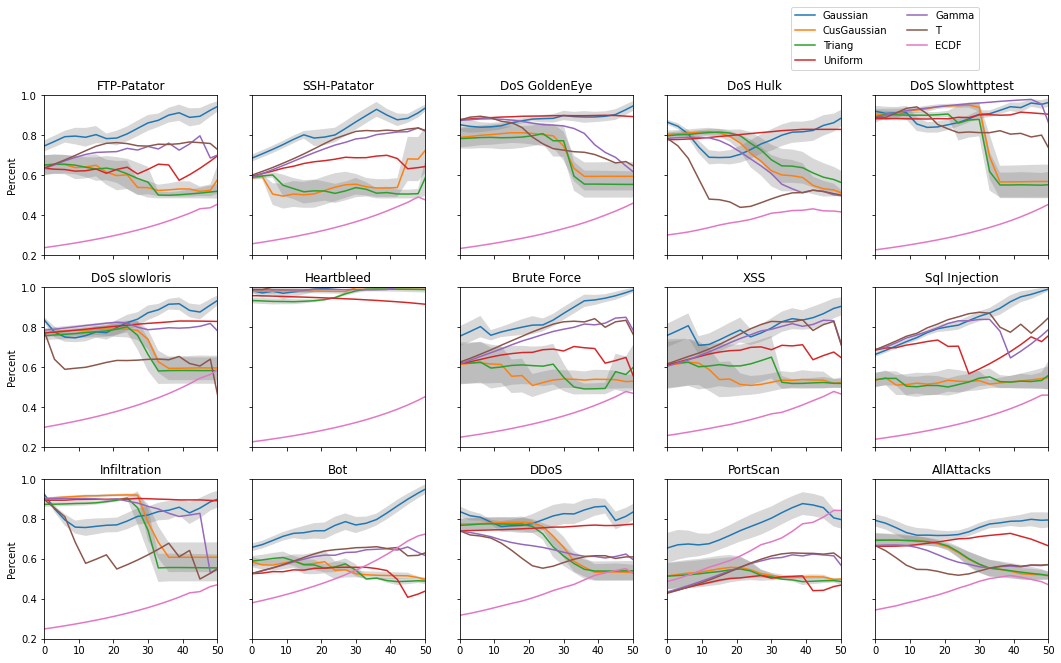

In [14]:
# plot comparision in different model of each type
# savename_mean='cic-MCD-vae-best-1+metrics+mean.csv' 
savename_mean='cic-VI-vae-best-1+metrics+mean.csv' 
pd_G1=pd.read_csv(dicavgnpy+savename_mean) 
savename_std=savename_mean.split('mean')[0]+'std.csv'
pd_G1_std=pd.read_csv(dicavgnpy+savename_std)

fig, axes= pyplot.subplots(3, 5,figsize=(18,10),sharex=True,sharey=True) 
#fig.suptitle('Comparisons of ' ) 
for indtype in range(1,len( attack_types)): 
    axes[(indtype-1)//5,(indtype-1)%5].set_title(attack_types2[indtype] )  #
    #############################################    plot all distribution                    
    i=1
    while i<len(pd_G1):
        # flag=False        
        if '+' in pd_G1.iloc[i,0] and pd_G1.iloc[i,0].split('+')[1]==attack_types[indtype]:
            for distindex in range(0, len( distribution_types)):
                eachdist=distribution_types[distindex]
                if eachdist=='ECOD' : # or eachdist=='Poisson':
                    
                    break
                if eachdist==pd_G1.iloc[i,0].split('+')[0]:   
                    legendd=eachdist
                    if legendd=='G2':
                        legendd='CusGaussian'
                    elif legendd=='G1':
                        legendd='Gaussian'
                    #fig_title=pd_reader.iloc[i,0]
                    try:
                        xx=pd_G1.iloc[i+2,1:].astype(int)
                    except:
                        print(i)
                    y_uncer=pd_G1_std.iloc[i+3,1:].astype(np.float16)

                    #plot_title=pd_G1.iloc[i+2,0]            
                    y_values=pd_G1.iloc[i+3,1:].astype(np.float16)  # AUC
                     # ACCU
                    #y_values=pd_G1.iloc[i+9,1:].astype(np.float16)
                    #y_values=pd_G1.iloc[i+7,1:].astype(np.float16) # fpr
                    yyy=y_values
                    xxx=xx
                    part_uncer=y_uncer
                    '''
                       # for remove angles
                    for ind in range(1,len(y_values)):
                        if np.abs((y_values[ind-1]-y_values[ind]))>0.6:
                            yyy=y_values[:(ind-1)]                        
                            xxx=xx[:(ind-1)]
                            part_uncer=y_uncer[:(ind-1)]
                            break
                            '''
                    axes[(indtype-1)//5,(indtype-1)%5].plot(xxx,yyy,label=legendd)#,c=color[distindex]

                    axes[(indtype-1)//5,(indtype-1)%5].fill_between(xxx,yyy-np.absolute(part_uncer)/2,yyy+np.absolute(part_uncer)/2,alpha=0.3,facecolor='grey')
                    axes[(indtype-1)//5,0].set(ylabel='Percent')     
                    break
               
            i=i+18*3 
        else:
        #         flag=True
        # if not flag:
        #     i=i+1  
            i=i+1
             
            
handles, labels = axes[0,2].get_legend_handles_labels()
# fig.legend(handles, labels, loc="lower right" , bbox_to_anchor=(1,0.5))
fig.legend(handles, labels, loc="upper right" , ncol=2,bbox_to_anchor=(0.85,1.01))

for ax in fig.get_axes():
    ax.label_outer()
    ax.set_xlim(0,50)
    ax.set_ylim(0.2,1)

#nowtime=datetime.datetime.now()
#nowtime=str(nowtime.year)+str(nowtime.month)+str(nowtime.day)+str(nowtime.hour)
pyplot.savefig('plots/'+"cic-allprobs.pdf")
pyplot.show()

In [4]:
def getGainOf3Alea(filenamelist,gainindex=8,metric='ECODLinear',gain=7):   #  ECODLinear   GaussianCustom  # Gamma # Gaussian1        
    allfilegain=[]
    for filename in filenamelist:
        filegain=[]
        gainstotal=[]
        gainsalea=[]
        gainsepis=[]
        gainindex=gain  # 6 ,7,8,9   # 6:gainavgaccu of avgaccu2    7:gainavgauc of avgauc    8:gainaccu of waccu    9:gainauc of wauc
        pd_reader=pd.read_csv(filename,header=0 ,index_col=1)
        for each in range(1,len( attack_types)):
            i=1
            while i<len(pd_reader):
                if '+' in pd_reader.iloc[i,0] :  
                    if pd_reader.iloc[i,0].split('+')[1].split('.')[0]==attack_types[each] and pd_reader.iloc[i,0].split('+')[0] ==metric :
                        gainstotal.append(float( pd_reader.iloc[17+i,gainindex] ))                  
                        gainsalea.append( float(pd_reader.iloc[17+i+18,gainindex] )) 
                        gainsepis.append(float(pd_reader.iloc[17+i+18+18,gainindex]) )
                        i=i+18*3
                        continue
                i+=1
        filegain.append(gainstotal)
        filegain.append(gainsalea)
        filegain.append(gainsepis)
        allfilegain.append(filegain)
        
    return allfilegain
        

# end